By
### Lum Apeh Temukum 
### Vineela Poreddy 
### Anees Nashath Shaik
### Sai Vijayan 

# **DATA ANALYSIS OF THE SUPPORT2 DATASET** 

## **INTRODUCTION**
In this notebook, we will explore the SUPPORT2 dataset from the UC Irvine Machine Learning Repository, which provides detailed information about the clinical, demographic, and socio-economic characteristics of seriously ill hospitalized patients. Through a structured analysis and visualization, we aim to investigate factors influencing survival outcomes, identify key predictors of mortality, and explore patterns in healthcare resource use. Additionally, this analysis will highlight disparities related to socio-economic status, offering valuable insights that could inform healthcare practices and policies.

We will proceed as follows;

## **Importing necessary Libraries**

In [6]:
# Import necessary libraries for data analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Dataset and Overviewing**

In [8]:
# Load the dataset and display the first or last rows to get a basic understanding of the data

data = pd.read_csv('support2-1.csv') # Load dataset

data.head() # Display first 5 rows

ID       age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1  62.84998      0    male         0     5    2029        Lung Cancer   
1   2  60.33899      1  female         1     4       4          Cirrhosis   
2   3  52.74698      1  female         0    17      47          Cirrhosis   
3   4  42.38498      1  female         0     3     133        Lung Cancer   
4   5  79.88495      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co  ...      crea    sod        ph  glucose  bun  \
0              Cancer       0  ...  1.199951  141.0  7.459961      NaN  NaN   
1  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0  7.250000      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...  2.000000  134.0  7.459961      NaN  NaN   
3              Cancer       2  ...  0.799927  139.0       NaN      NaN  NaN   
4            ARF/MOSF       1  ...  0.799927  143.0  7.509766      NaN  NaN   

   urine  adlp adls                sfdm2  adlsc  
0    NaN   7.0  7.0                  NaN    7.0  
1    NaN   NaN  1.0     <2 mo. follow-up    1.0  
2    NaN   1.0  0.0     <2 mo. follow-up    0.0  
3    NaN   0.0  0.0  no(M2 and SIP pres)    0.0  
4    NaN   NaN  2.0  no(M2 and SIP pres)    2.0  

[5 rows x 48 columns]

The dataset appears to be a **medical dataset** containing **detailed patient information**. Here's an overview of the features present in the first few rows: **ID, age, sex, death, hospdead, slos, d.time, dzgroup, dzclass, num.co, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc, sfdm2.**

## **Basic Initial Data Analysis**

In this section, we will conduct an Extensive Initial Data Analysis (IDA) to thoroughly understand the dataset's structure and quality by examining data types, identifying patterns, assessing missing values and outliers, and summarizing key features through descriptive statistics and visualizations.

### **1. Data Structure**

In [13]:
data.info() # Display the non-null counts, data types, and memory usage of the dataset

data.shape # Display the shape of the dataset

# data.dtypes # Display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

(9105, 48)

#### **Summary Statistics**
- **Dataset Size**: 9,105 rows × 48 columns.  
- **Data Types**:  
  - 31 columns are float64.  
  - 9 columns are int64.  
  - 8 columns are object.

### **2. Descriptive Statistics**

In this section, we will summarize the dataset by calculating measures such as averages, medians, variability, frequencies, and other key statistics for various data types. To ensure all columns are included in the analysis, we will use `df.describe(include='all')`, which provides a summary for both numerical and categorical data, unlike `df.describe()` which focuses solely on numerical data.  

In [17]:
# Generate summary statistics for all data, and transpose the table for better readability.
data_summary_stats = data.describe(include='all').transpose()

# Clean the summary stats by replacing missing values with '--' and refining data types.
pd.set_option('future.no_silent_downcasting', True)
data_summary_stats_cleaned = data_summary_stats.fillna('--').infer_objects(copy=False)

# Display the final cleaned summary statistics table.
data_summary_stats_cleaned

count unique                top  freq          mean            std  \
ID        9105.0     --                 --    --        4553.0    2628.531434   
age       9105.0     --                 --    --     62.650823       15.59371   
death     9105.0     --                 --    --      0.681054       0.466094   
sex       9105.0      2               male  5125            --             --   
hospdead  9105.0     --                 --    --      0.259198       0.438219   
slos      9105.0     --                 --    --     17.863042       22.00644   
d.time    9105.0     --                 --    --    478.449863     560.383272   
dzgroup   9105.0      8  ARF/MOSF w/Sepsis  3515            --             --   
dzclass   9105.0      4           ARF/MOSF  4227            --             --   
num.co    9105.0     --                 --    --      1.868644       1.344409   
edu       7471.0     --                 --    --     11.747691       3.447743   
income    6123.0      4         under $11k  2855            --             --   
scoma     9104.0     --                 --    --     12.058546      24.636694   
charges   8933.0     --                 --    --  59995.787811  102648.778198   
totcst    8217.0     --                 --    --  30825.867768   45780.820986   
totmcst   5630.0     --                 --    --  28828.877838   43604.261932   
avtisst   9023.0     --                 --    --     22.610928      13.233248   
race      9063.0      5              white  7191            --             --   
sps       9104.0     --                 --    --     25.525872       9.899377   
aps       9104.0     --                 --    --     37.597979      19.903852   
surv2m    9104.0     --                 --    --       0.63587       0.248175   
surv6m    9104.0     --                 --    --      0.520096       0.253343   
hday      9105.0     --                 --    --           4.4       9.126811   
diabetes  9105.0     --                 --    --      0.195277       0.396436   
dementia  9105.0     --                 --    --       0.03251       0.177359   
ca        9105.0      3                 no  5995            --             --   
prg2m     7456.0     --                 --    --      0.618769       0.298367   
prg6m     7472.0     --                 --    --      0.499679       0.304367   
dnr       9075.0      3             no dnr  5880            --             --   
dnrday    9075.0     --                 --    --      14.58259      19.944216   
meanbp    9104.0     --                 --    --     84.546408      27.687692   
wblc      8893.0     --                 --    --     12.347677       9.266329   
hrt       9104.0     --                 --    --     97.156711      31.559292   
resp      9104.0     --                 --    --     23.330294       9.573801   
temp      9104.0     --                 --    --     37.103341       1.251796   
pafi      6780.0     --                 --    --     239.52907     109.665593   
alb       5733.0     --                 --    --       2.95052       0.875944   
bili      6504.0     --                 --    --      2.554463       5.318448   
crea      9038.0     --                 --    --      1.770961       1.686041   
sod       9104.0     --                 --    --    137.568541       6.029326   
ph        6821.0     --                 --    --      7.415364       0.080563   
glucose   4605.0     --                 --    --    159.873398      88.391541   
bun       4753.0     --                 --    --     32.349463      26.792288   
urine     4243.0     --                 --    --   2191.546047    1455.245777   
adlp      3464.0     --                 --    --       1.15791       1.739672   
adls      6238.0     --                 --    --      1.637384       2.231358   
sfdm2     7705.0      5   <2 mo. follow-up  3123            --             --   
adlsc     9105.0     --                 --    --      1.888272       2.003763   

                min        25%         50

#### **Descriptive Statistics Summary**
**Numerical Features**
- Total Numerical Columns: 40

- Key Statistics:
     - Age: Mean: 62.65 years, Min: 18.04 years, Max: 101.85 years
     - Length of Stay (slos): Mean: 17.86 days, Min: 3 days, Max: 343 days
     - Creatinine (crea): Mean: 1.77, Min: 0.1, Max: 21.5
     - Sodium (sod): Mean: 137.57, Min: 110, Max: 181
     - Blood pH (ph): Mean: 7.41, Min: 6.83, Max: 7.77

**Categorical Features**
- Total Categorical Columns: 8

- Most Frequent Categories:
     - Sex: Male
     - Disease Group (dzgroup): ARF/MOSF w/Sepsis
     - Race: White
     - Income Level: Under $11k

- Unique Counts:
     - Sex: 2 categories (male, female)
     - Race: 5 categories
     - Disease Class (dzclass): 4 categories

### **3. Data Quality**

In this section, we will assess data quality by identifying missing values, detecting outliers, evaluating consistency, completeness, and verifying category validity.

#### **3.1 Identifying Missing Values**
Our goal is to identify columns with missing values and present them in a table alongside their corresponding percentages of missing data.

In [22]:
!pip install tabulate
!pip install termcolor
from tabulate import tabulate
from termcolor import colored

In [23]:
# Calculate and filter missing values
missing_values = data.isnull().sum()  # Count missing values
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values

# Create a DataFrame with percentage missing
missing_values_dataframe = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing (%)': (missing_values.values / len(data)) * 100
}).sort_values(by='Missing Values', ascending=False)  # Sort by missing values

# Display the table
print(tabulate(missing_values_dataframe, headers='keys', tablefmt='grid', showindex=False))


+----------+------------------+--------------------------+
| Column   |   Missing Values |   Percentage Missing (%) |
+==========+==================+==========================+
| adlp     |             5641 |                61.955    |
+----------+------------------+--------------------------+
| urine    |             4862 |                53.3992   |
+----------+------------------+--------------------------+
| glucose  |             4500 |                49.4234   |
+----------+------------------+--------------------------+
| bun      |             4352 |                47.7979   |
+----------+------------------+--------------------------+
| totmcst  |             3475 |                38.1658   |
+----------+------------------+--------------------------+
| alb      |             3372 |                37.0346   |
+----------+------------------+--------------------------+
| income   |             2982 |                32.7512   |
+----------+------------------+-------------------------

##### **3.1.1 Visualisation of Missing Percentages**

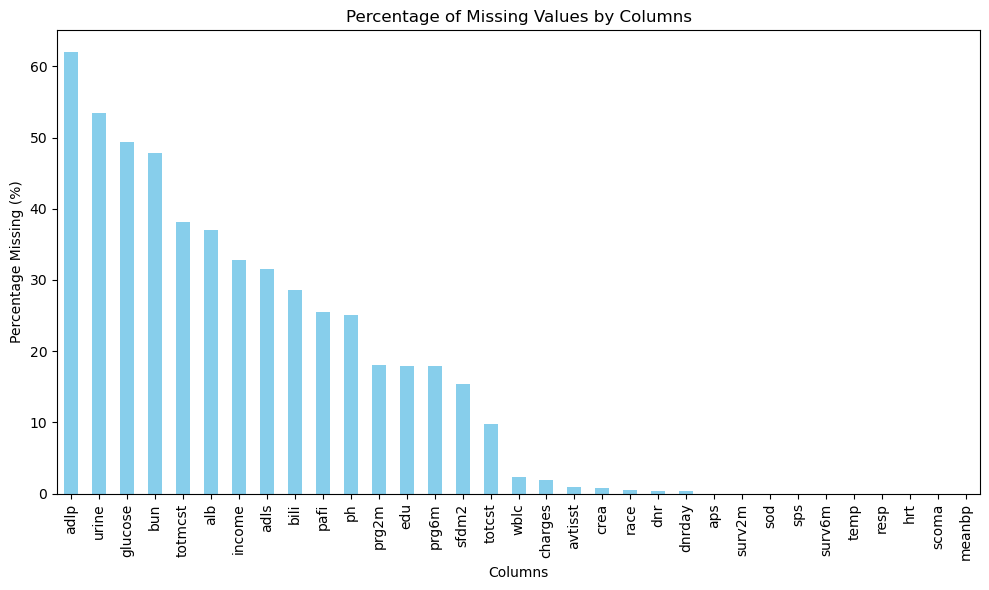

In [25]:
# A bar chart is ideal for this analysis as it clearly compares the percentage of missing values across dataset variables, highlighting data quality issues.

missing_values_dataframe['Column'] = missing_values_dataframe['Column'].astype(str)

# Plotting the percentage of missing values using column names
plt.figure(figsize=(10, 6))
missing_values_dataframe.set_index('Column')['Percentage Missing (%)'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


##### **3.1.2 Correlation of Missing Percentages**

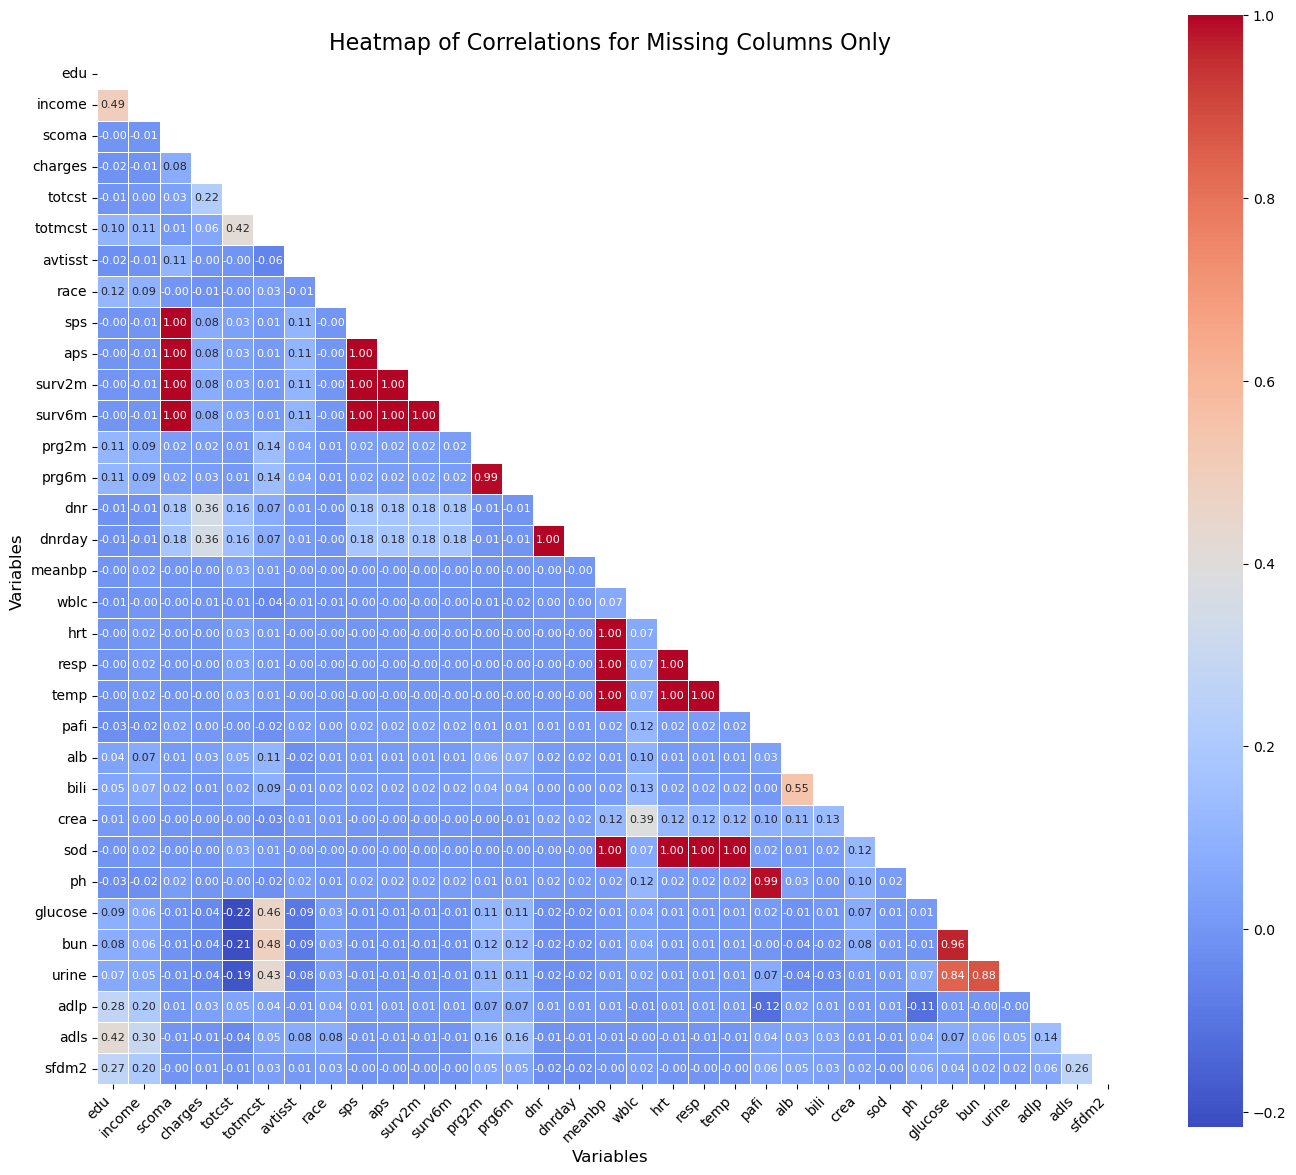

+--------------+--------------+---------------+----------------------------------+
| Variable 1   | Variable 2   |   Correlation | Description                      |
+==============+==============+===============+==================================+
| hrt          | temp         |      1        | Very Strong Positive Correlation |
+--------------+--------------+---------------+----------------------------------+
| resp         | sod          |      1        | Very Strong Positive Correlation |
+--------------+--------------+---------------+----------------------------------+
| resp         | temp         |      1        | Very Strong Positive Correlation |
+--------------+--------------+---------------+----------------------------------+
| hrt          | sod          |      1        | Very Strong Positive Correlation |
+--------------+--------------+---------------+----------------------------------+
| hrt          | resp         |      1        | Very Strong Positive Correlation |
+---

C:\Users\temgl\AppData\Local\Temp\ipykernel_21424\35594697.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_correlation_pairs["Description"] = correlation_descriptions


In [27]:
# Filter out columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Create a correlation matrix for columns with missing values only
missing_corr = data[missing_columns].isnull().corr()

# Masking the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(missing_corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 12)) 
sns.heatmap(
    missing_corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    square=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8} 
)

plt.title('Heatmap of Correlations for Missing Columns Only', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Extract pairs with correlation (≥ 0.8)
correlation_pairs = (
    missing_corr.where(missing_corr >= 0.8)
    .stack()
    .reset_index()
    .rename(columns={0: "Correlation"})
    .sort_values(by="Correlation", ascending=False)
)

# Remove duplicate pairs (e.g., A->B and B->A)
the_correlation_pairs = correlation_pairs[
    correlation_pairs["level_0"] < correlation_pairs["level_1"]
]

# Add descriptions based on correlation values
correlation_descriptions = []
for value in the_correlation_pairs["Correlation"]:
    if value >= 0.9:
        correlation_descriptions.append("Very Strong Positive Correlation")
    elif 0.8 <= value < 0.9:
        correlation_descriptions.append("Strong Positive Correlation")
        
the_correlation_pairs["Description"] = correlation_descriptions

# Convert to tabular format
headers = ["Variable 1", "Variable 2", "Correlation", "Description"]
the_correlation_table_data = the_correlation_pairs.values.tolist()

# Display the table
print(tabulate(the_correlation_table_data, headers=headers, tablefmt="grid"))


Certain variables exhibit strong correlations in their missingness patterns (e.g., `hrt` and `temp`, `prg2m` and `prg6m`), likely reflecting shared data collection methods or dependencies. Clusters such as `bun`, `glucose`, and `urine` imply common causes for their missing values, while variables with weaker correlations may require independent handling. These patterns suggest potential systemic issues in data collection or recording, emphasizing the need for further investigation into the root causes of missing data.

#### **3.2 Detecting Outliers**

##### **3.2.1 Categorizing the variables**
We must first categorize the variables into the different types (continuous numerical, binary, and categorical) before implementing different methods to detect each type.

In [31]:
# Categorize variables into different types
numerical_vars = data.select_dtypes(include=['number']).columns  # Continuous numerical variables
binary_vars = [col for col in numerical_vars if data[col].nunique() == 2]  # Binary variables
categorical_vars = [col for col in data.columns if data[col].dtype == 'object']  # Categorical variables
numerical_vars = [col for col in numerical_vars if col not in binary_vars]  # Exclude binary from numerical

# Display categorized variables using tabulate
categories_dict = {
    "Numerical Variables": numerical_vars,
    "Binary Variables": binary_vars,
    "Categorical Variables": categorical_vars,
}

# Find the maximum length of any category
max_len = max(len(v) for v in categories_dict.values())

# Ensure all categories are of the same length by padding shorter ones with None
categories_for_tabulation = {k: v + [None] * (max_len - len(v)) for k, v in categories_dict.items()}

# Create a DataFrame for aligned categories
categories_aligned_data = pd.DataFrame(categories_for_tabulation)

# Display the categories with tabulate
print(tabulate(categories_aligned_data, headers="keys", tablefmt="grid", showindex=False))


+-----------------------+--------------------+-------------------------+
| Numerical Variables   | Binary Variables   | Categorical Variables   |
+=======================+====================+=========================+
| ID                    | death              | sex                     |
+-----------------------+--------------------+-------------------------+
| age                   | hospdead           | dzgroup                 |
+-----------------------+--------------------+-------------------------+
| slos                  | diabetes           | dzclass                 |
+-----------------------+--------------------+-------------------------+
| d.time                | dementia           | income                  |
+-----------------------+--------------------+-------------------------+
| num.co                |                    | race                    |
+-----------------------+--------------------+-------------------------+
| edu                   |                    | ca  

##### **3.2.2 Detecting Outliers in Numerical Variables using the IQR Method**

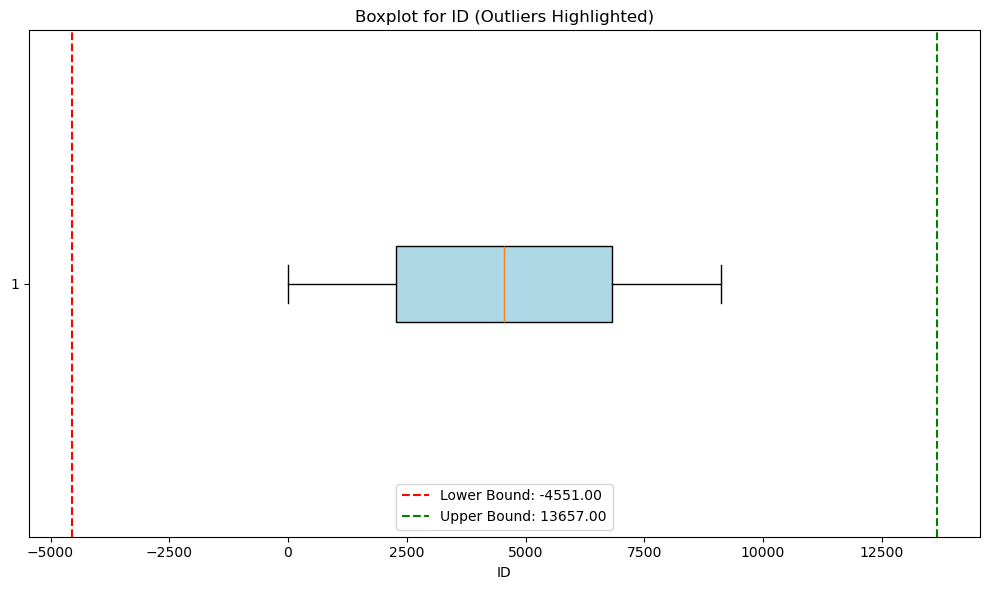

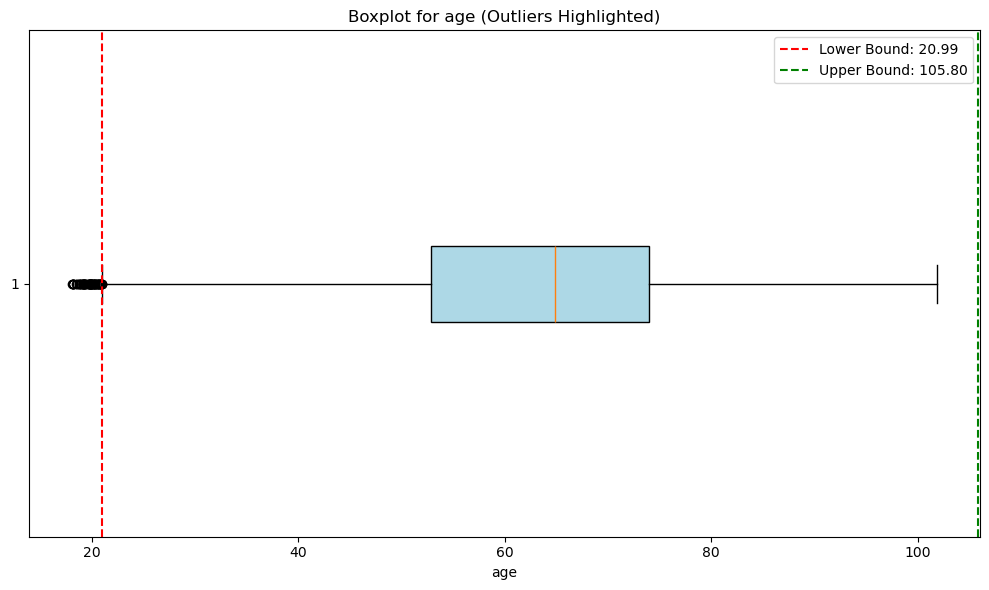

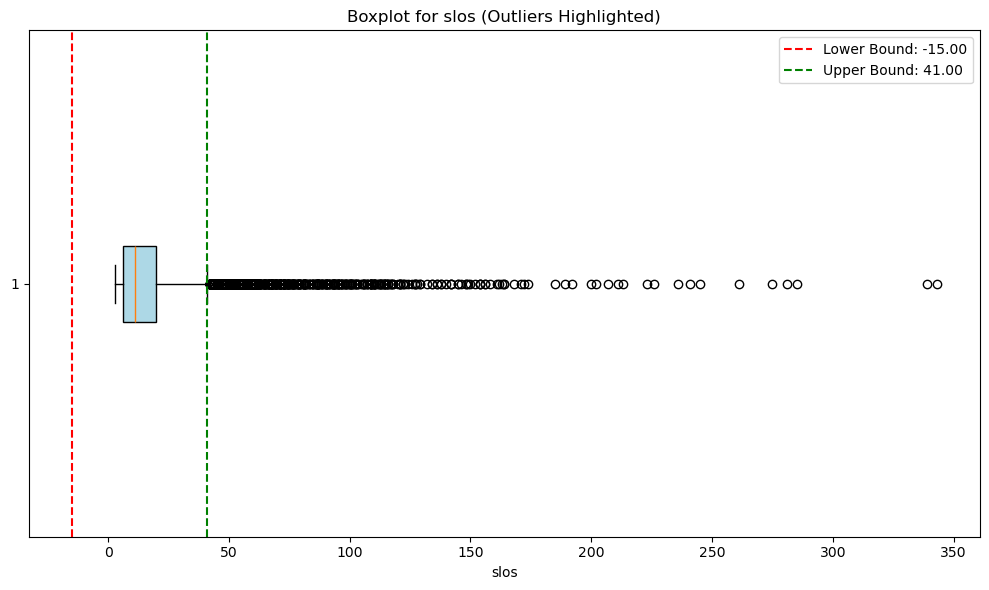

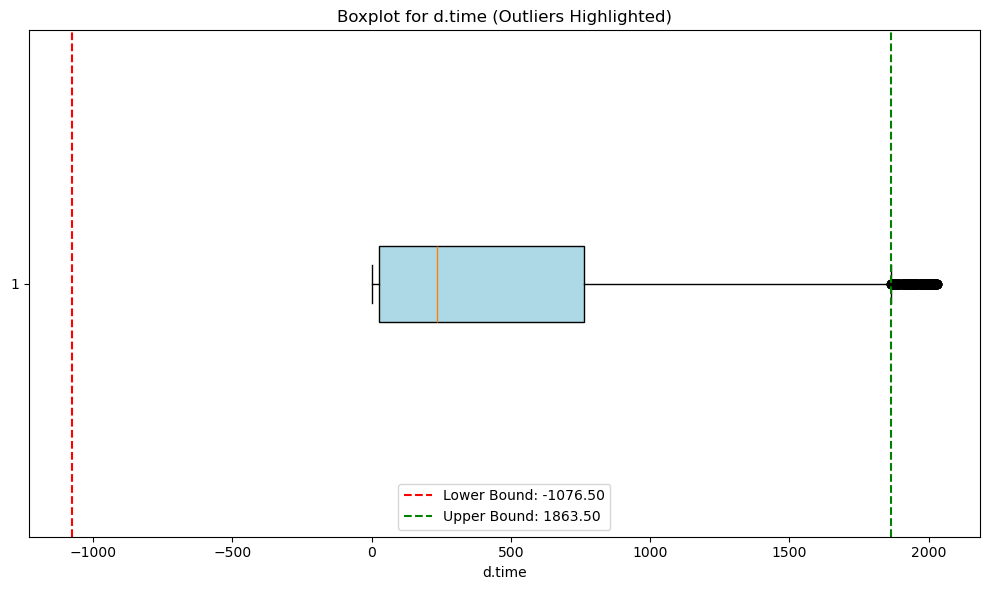

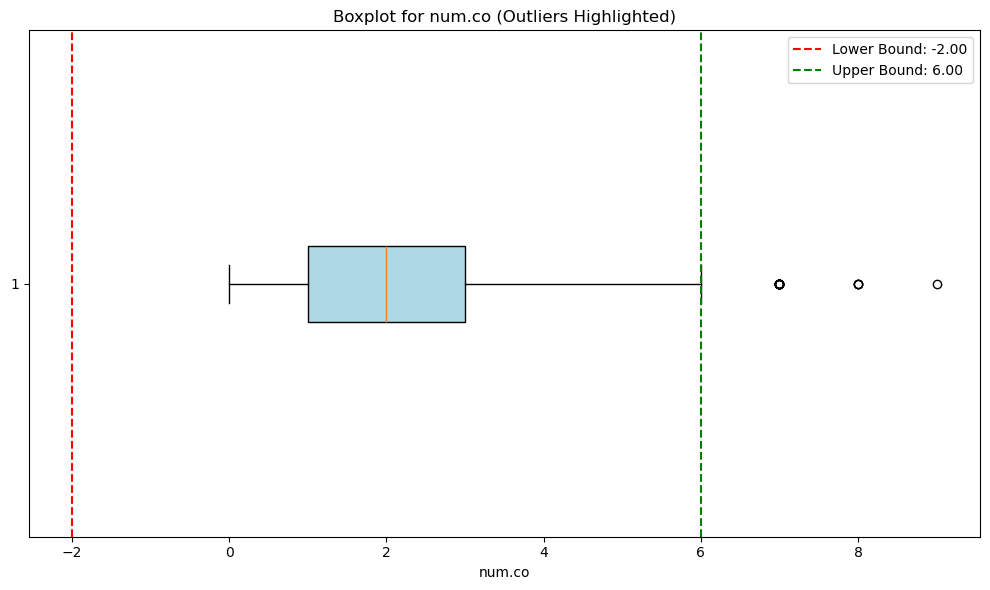

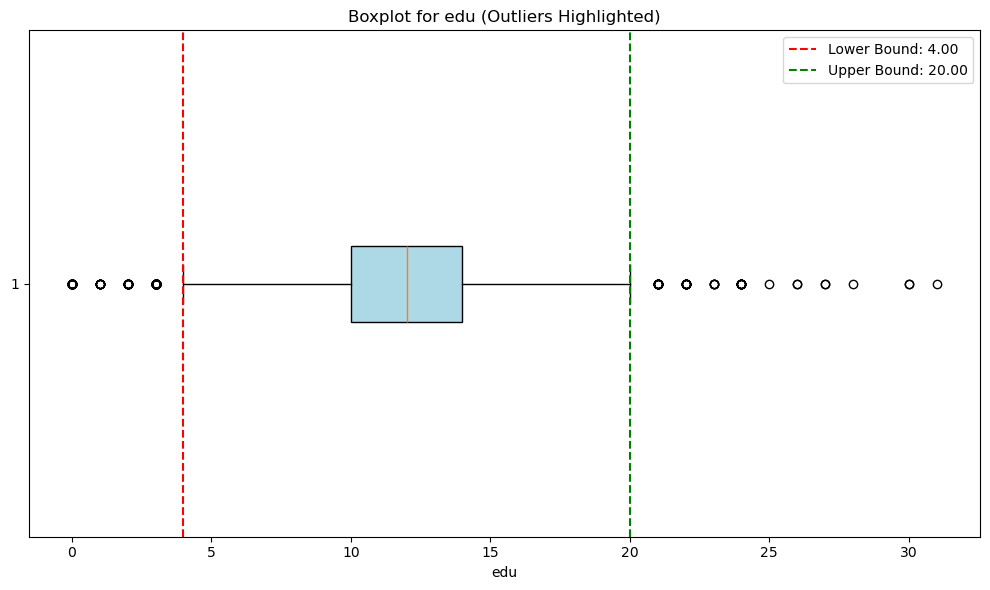

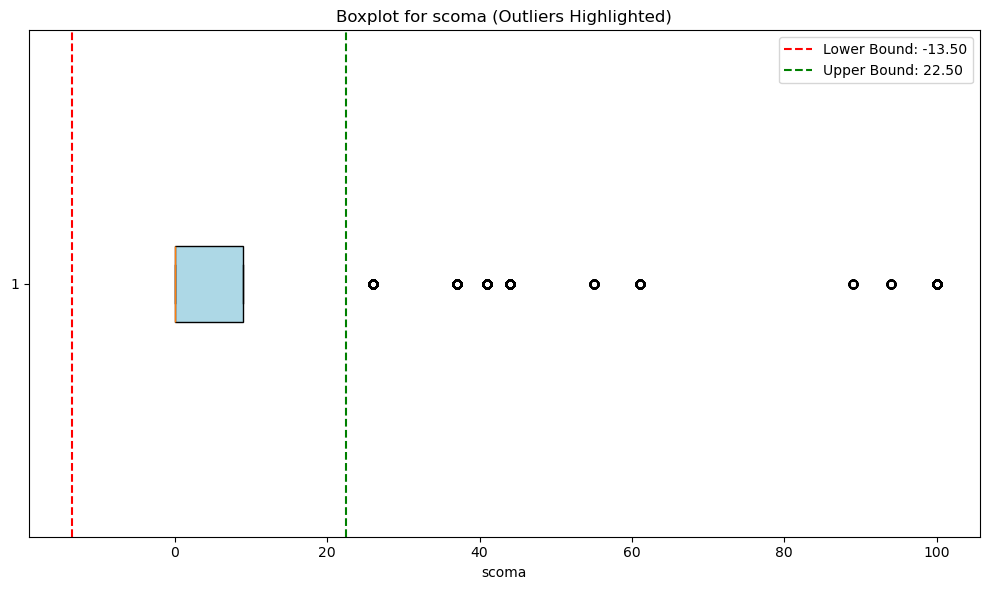

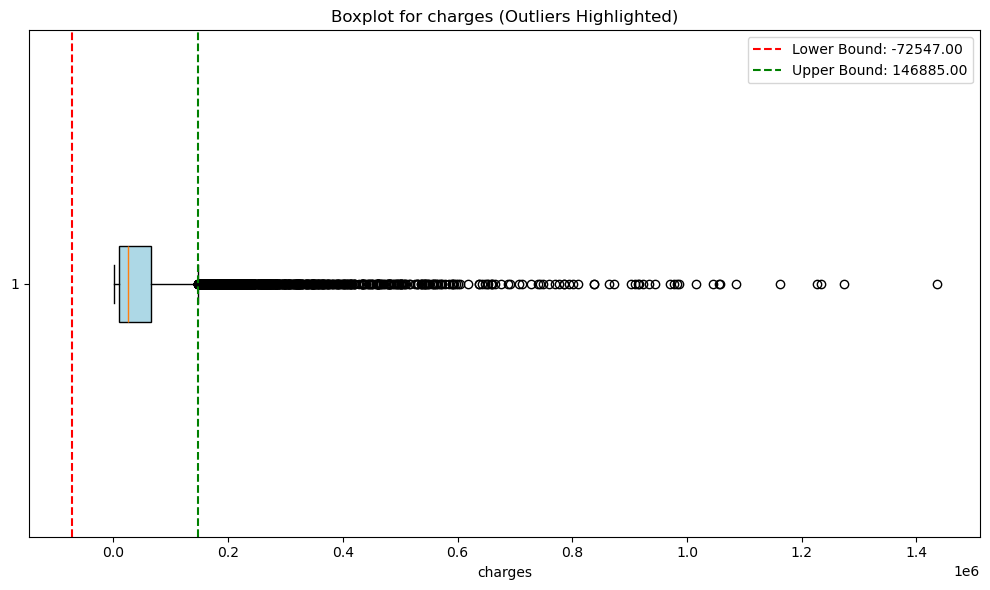

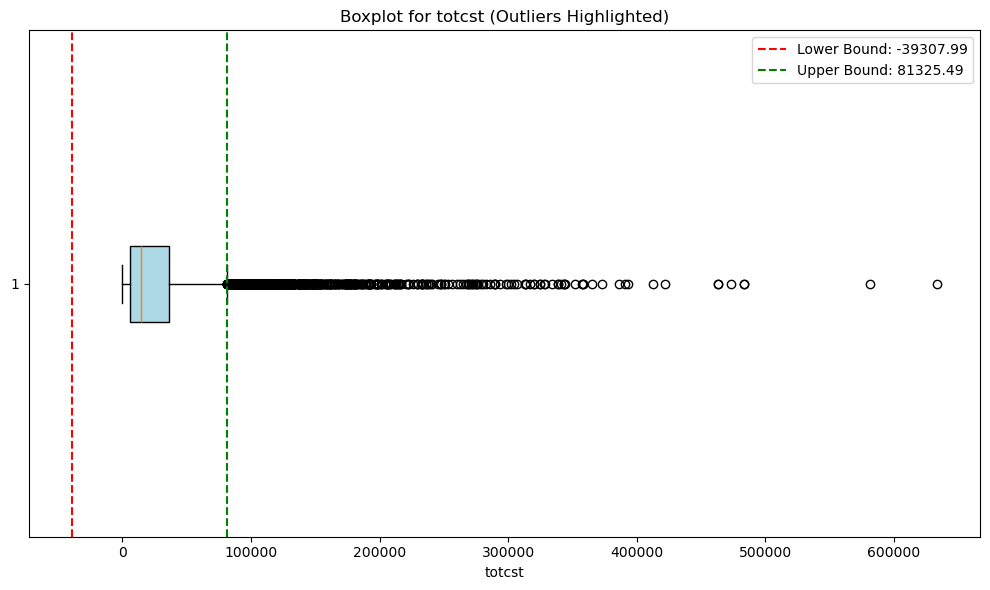

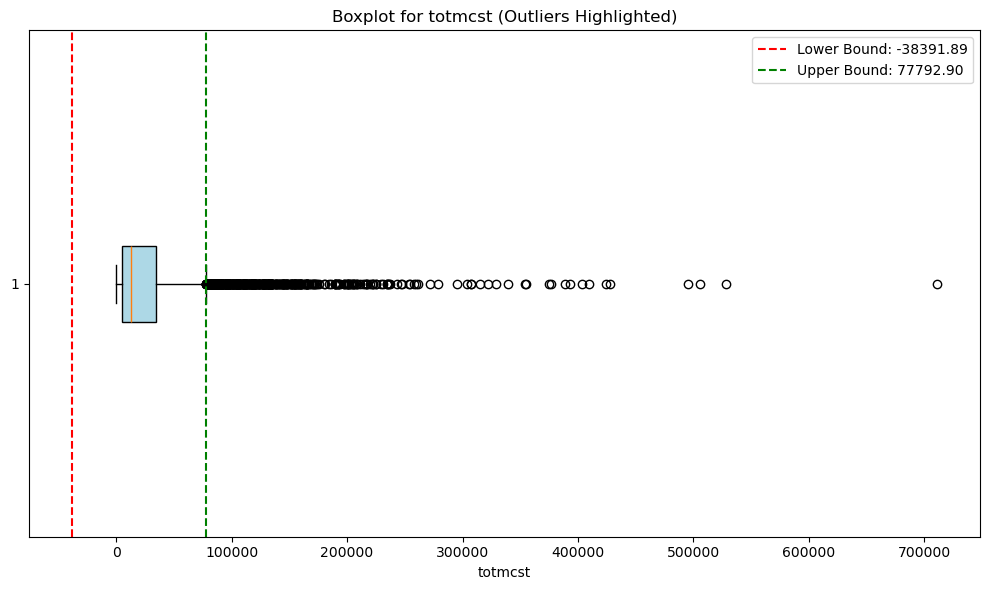

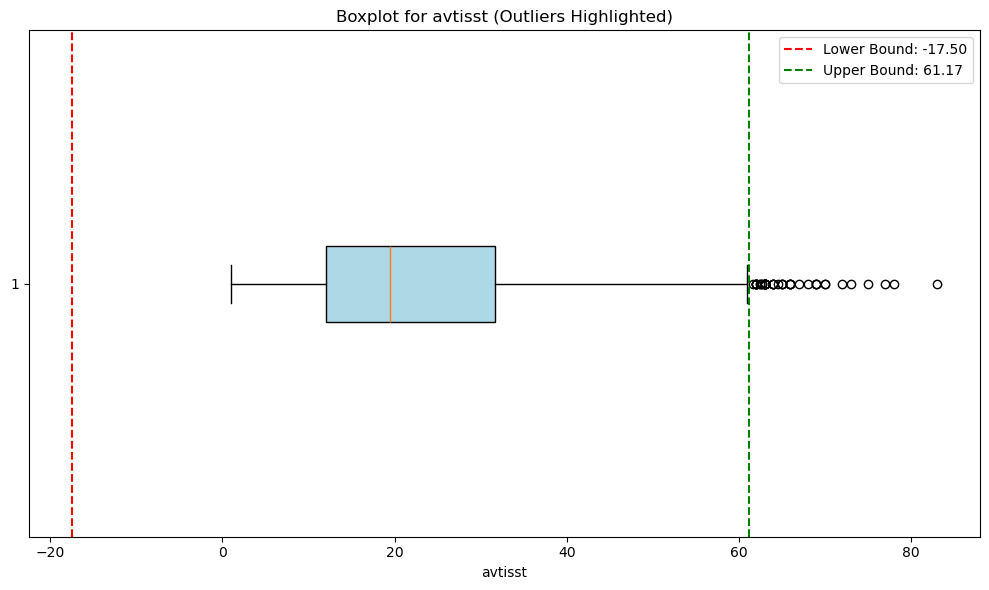

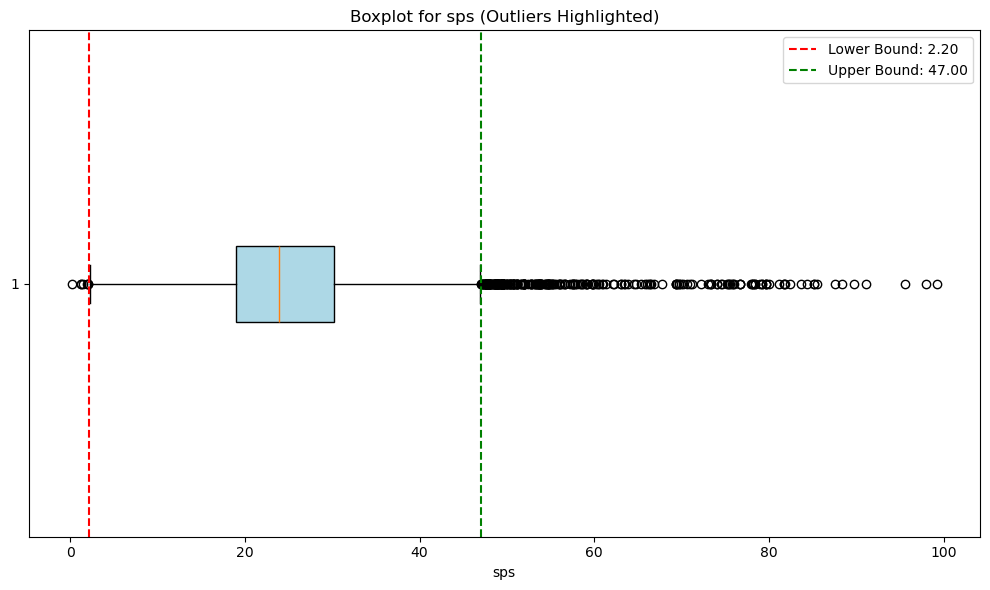

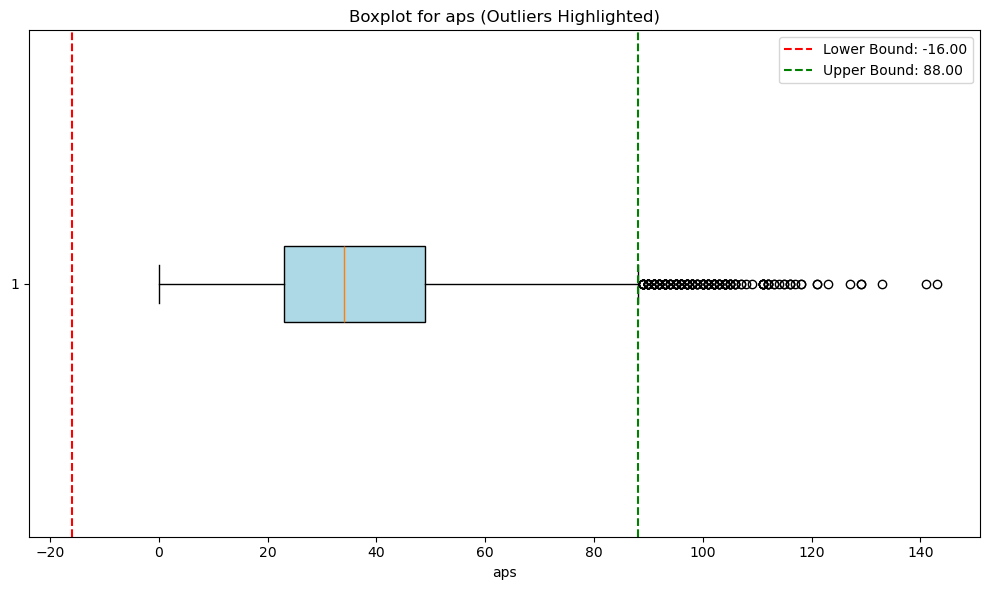

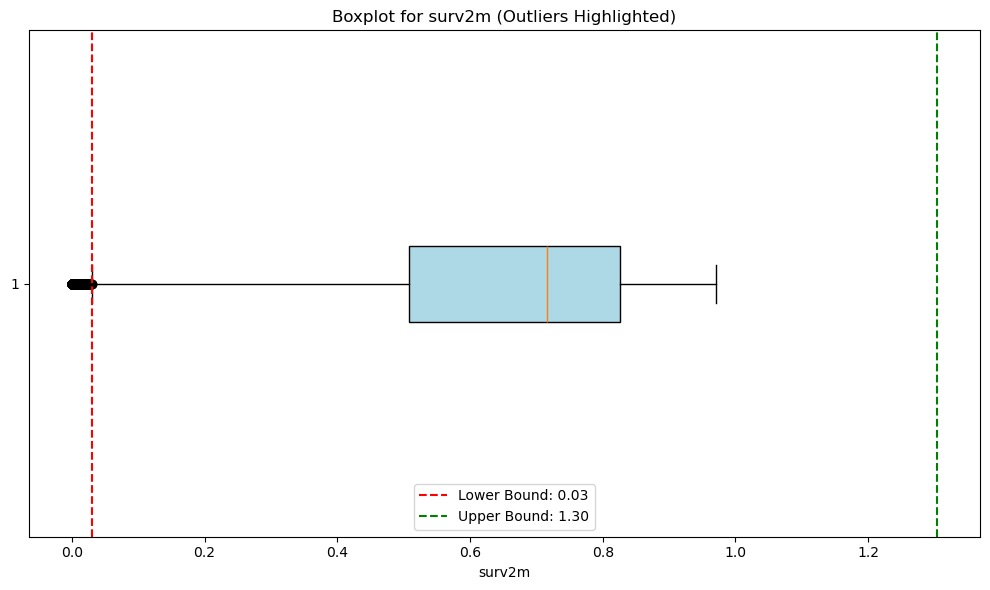

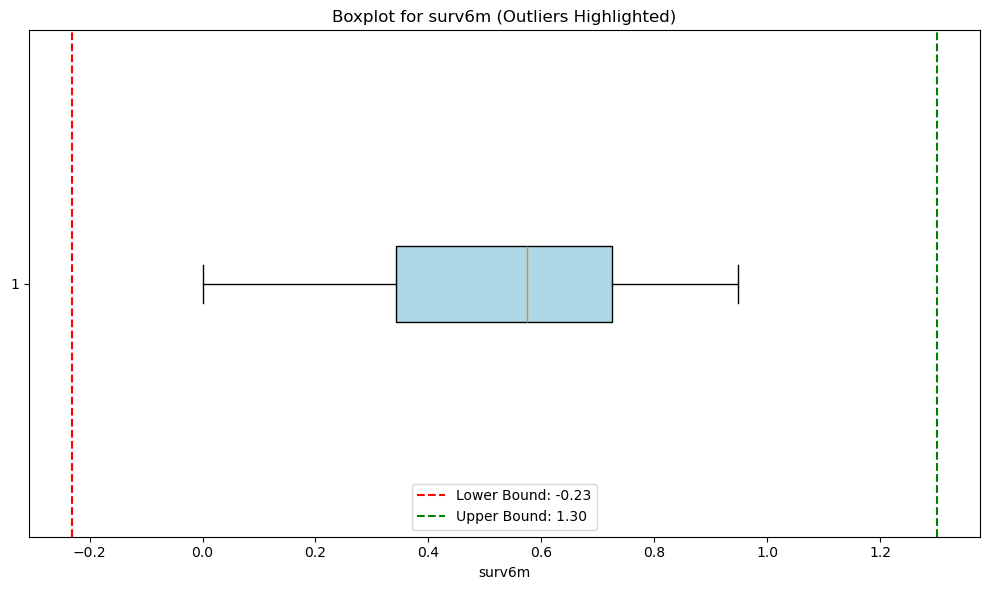

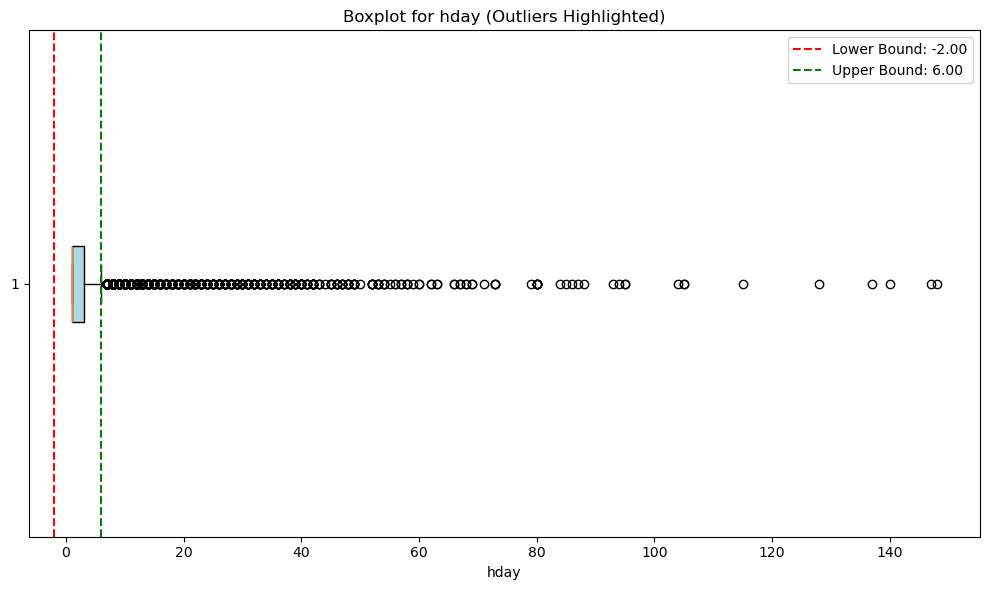

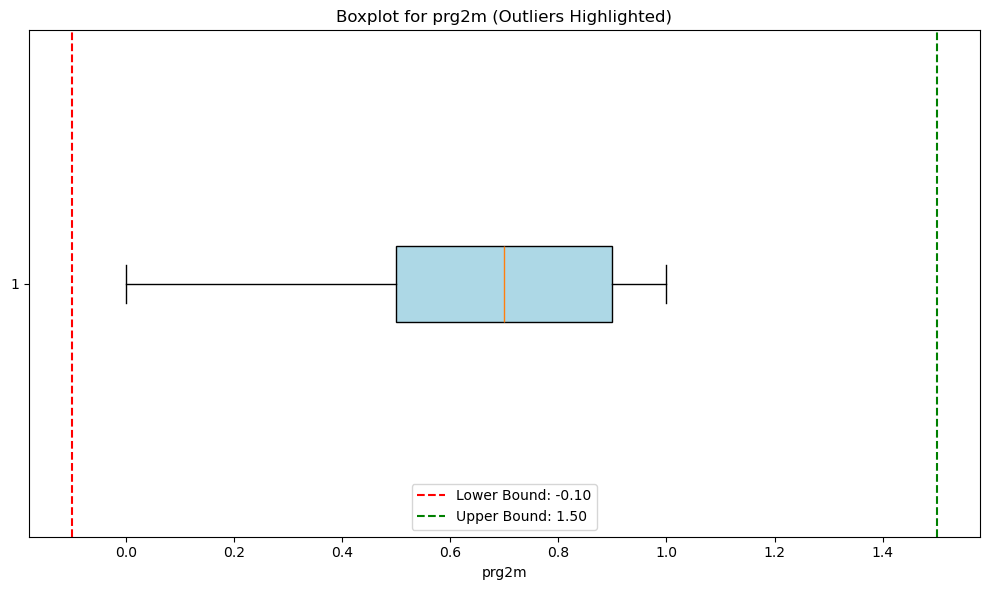

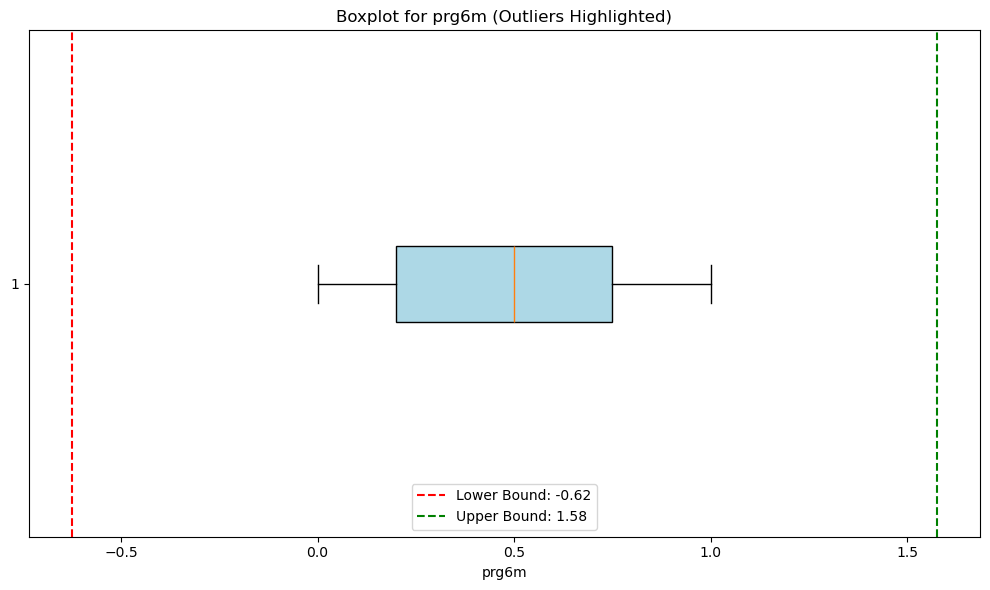

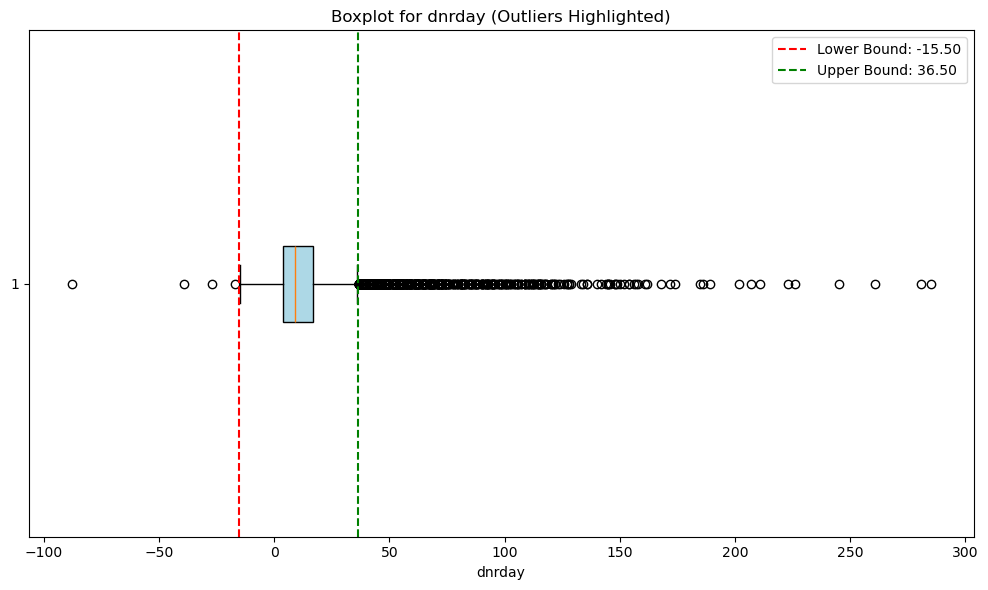

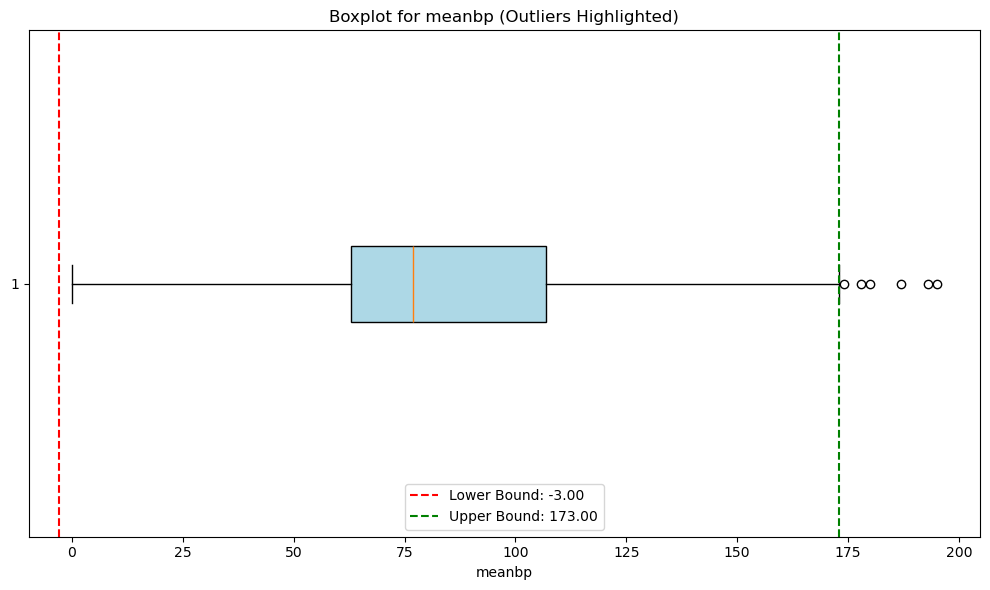

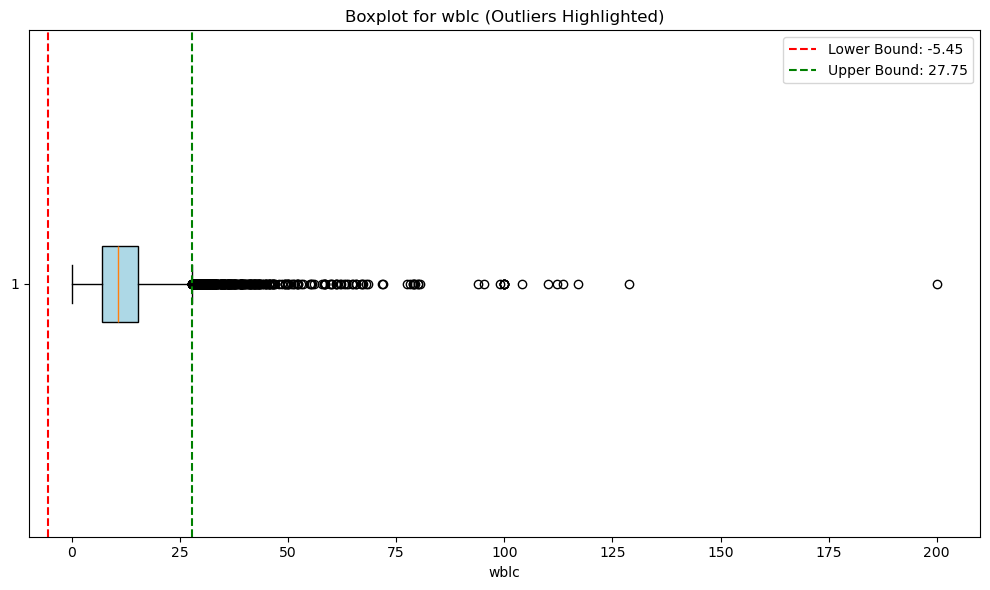

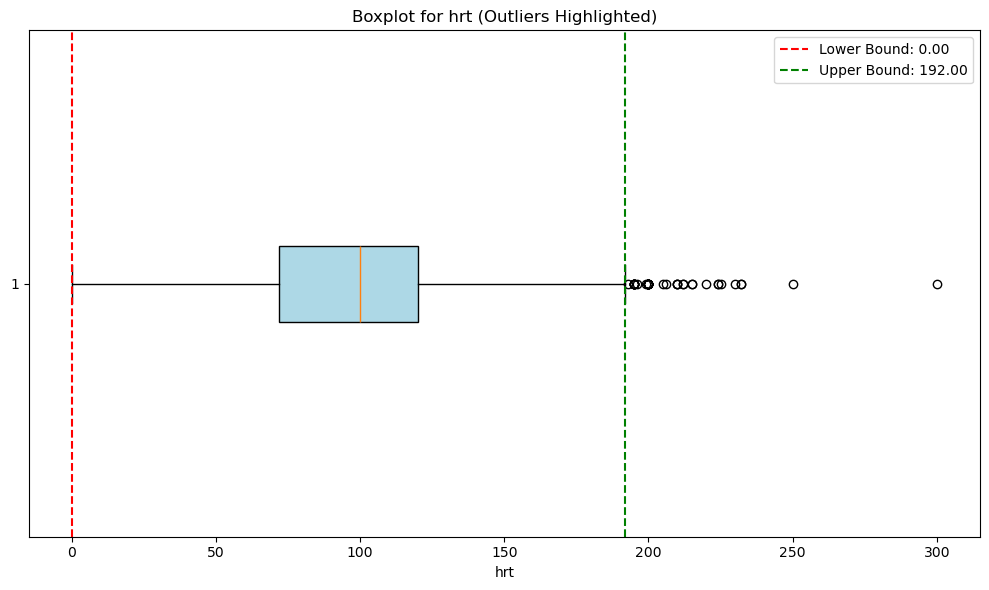

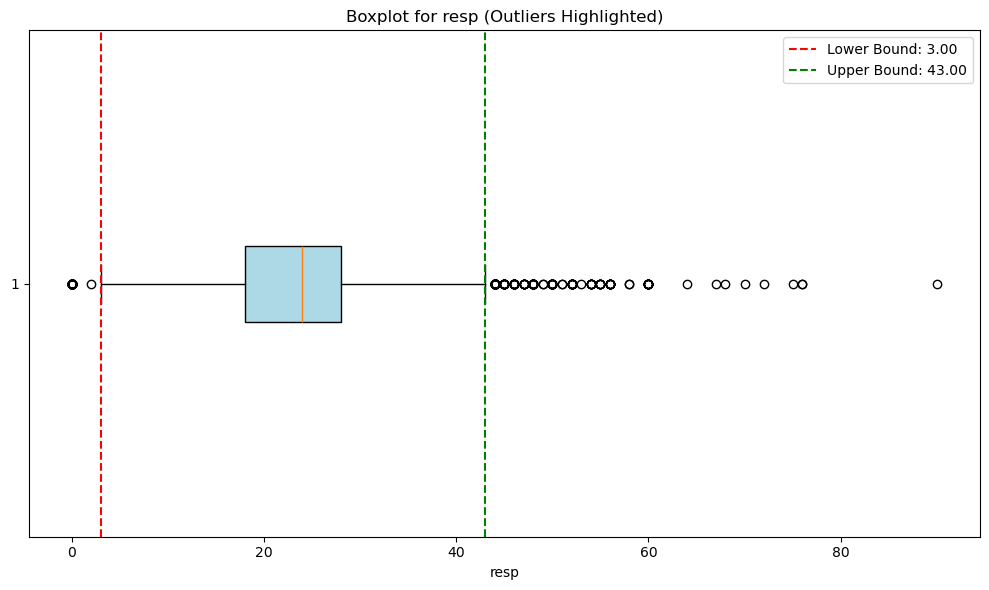

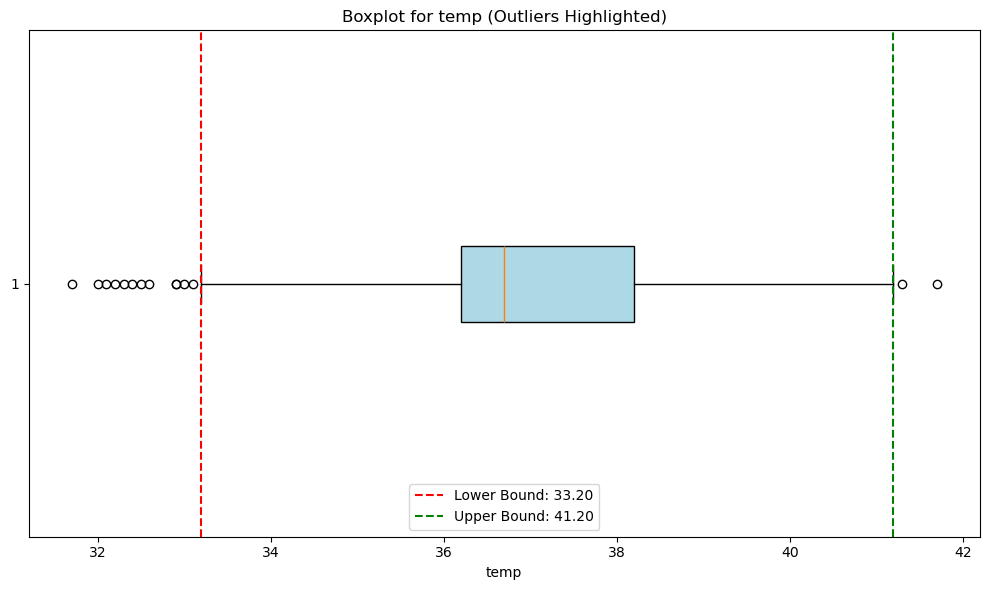

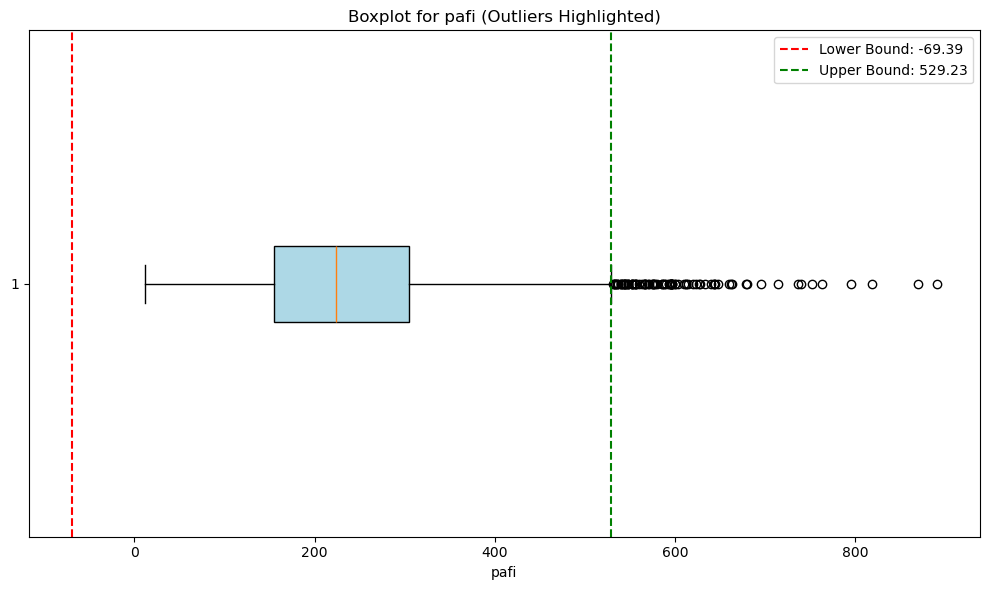

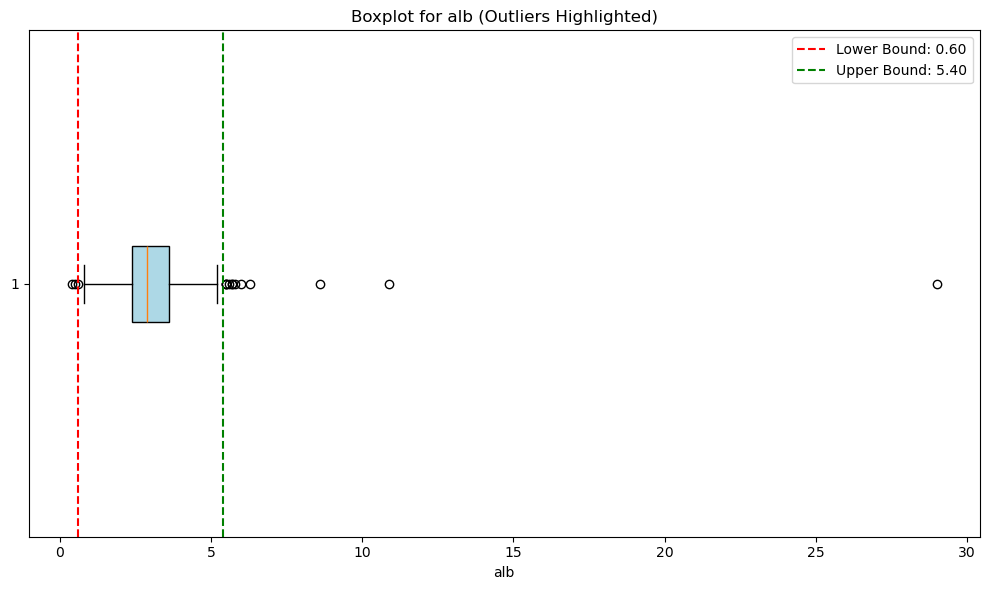

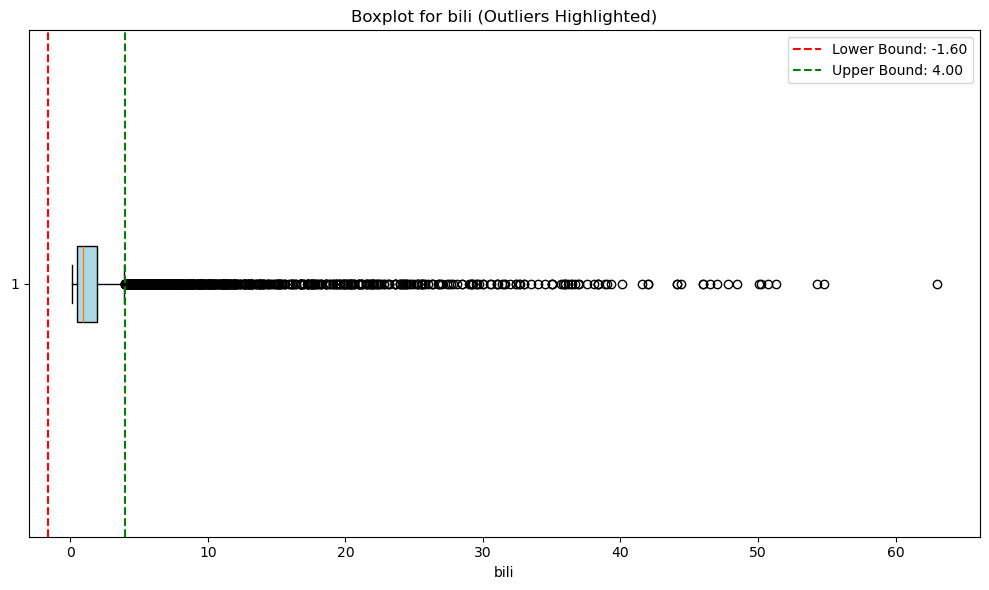

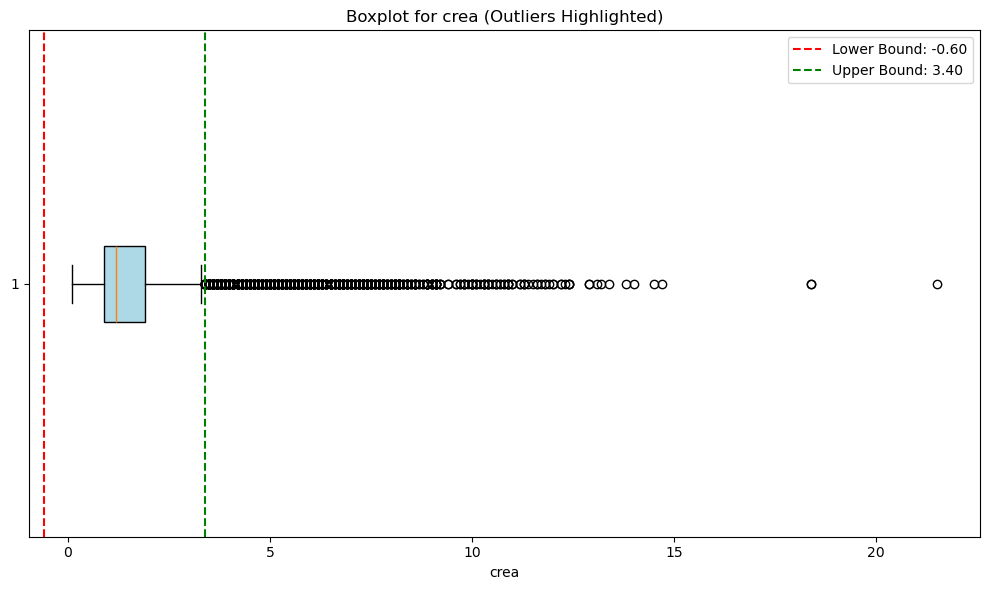

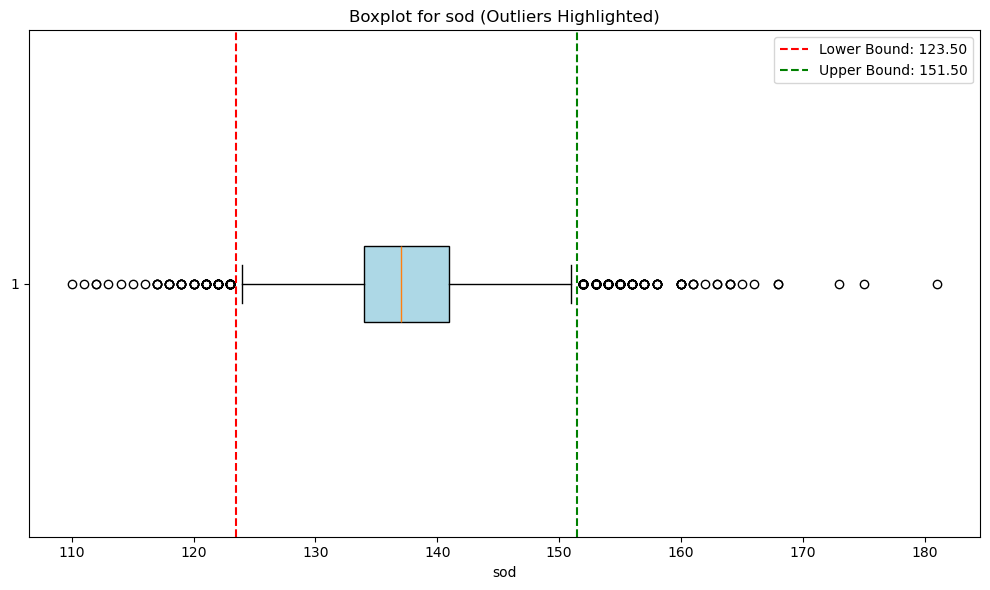

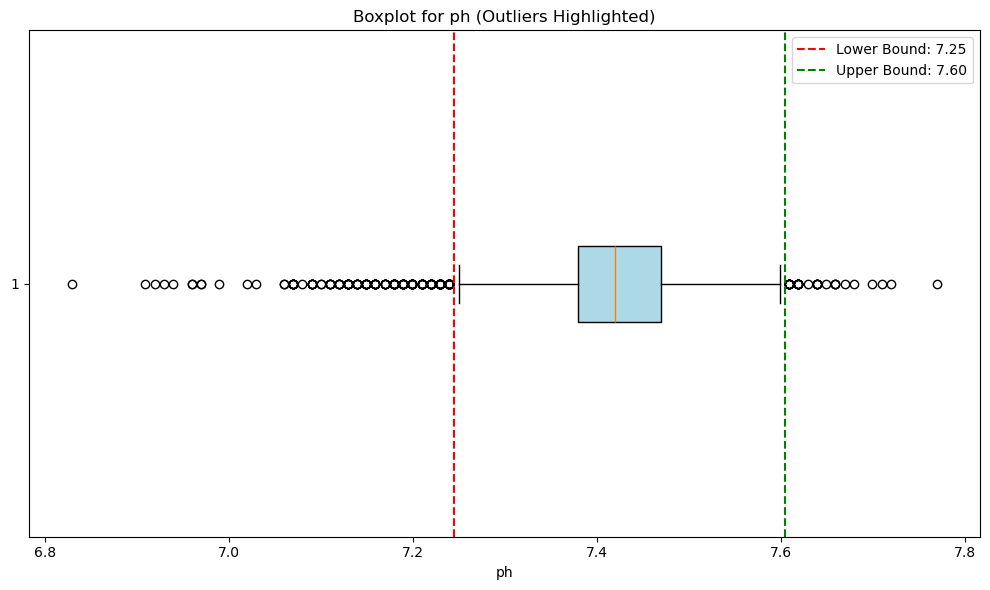

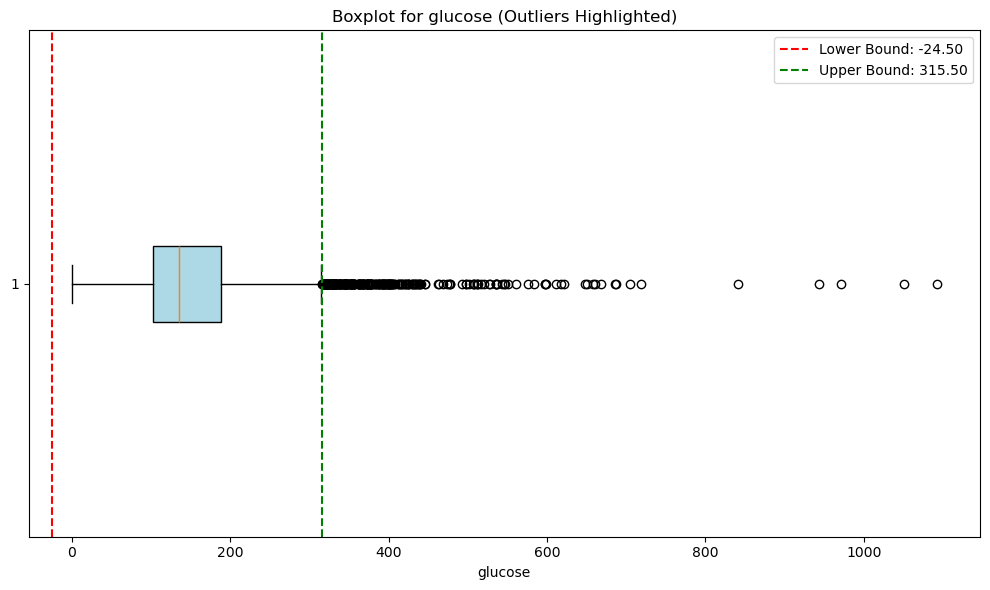

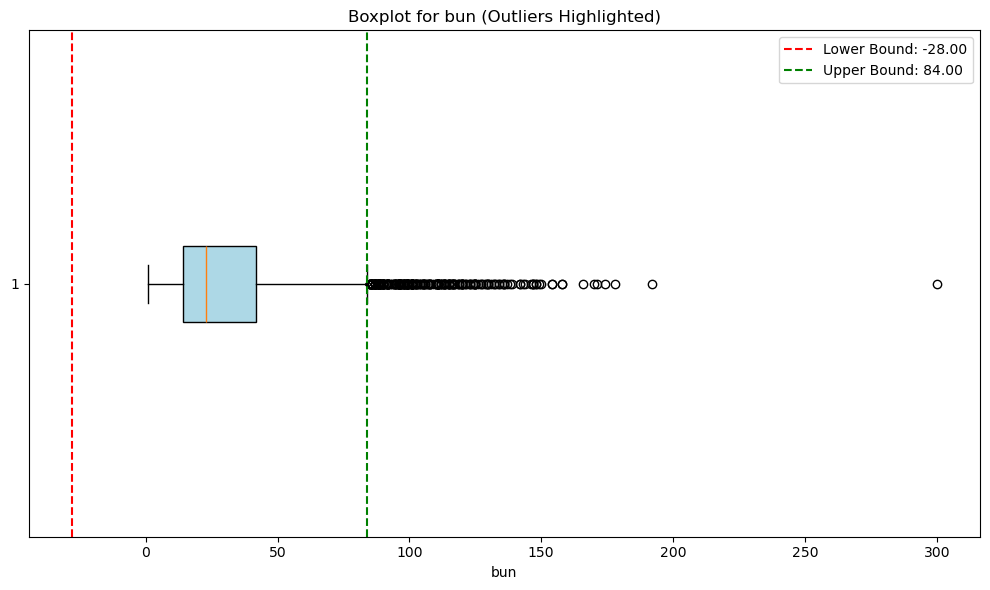

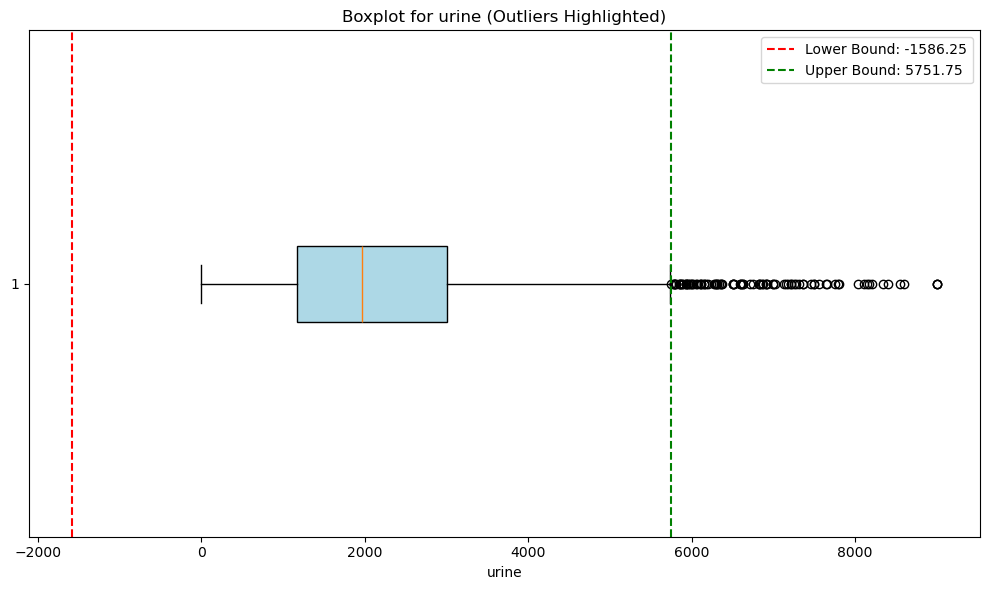

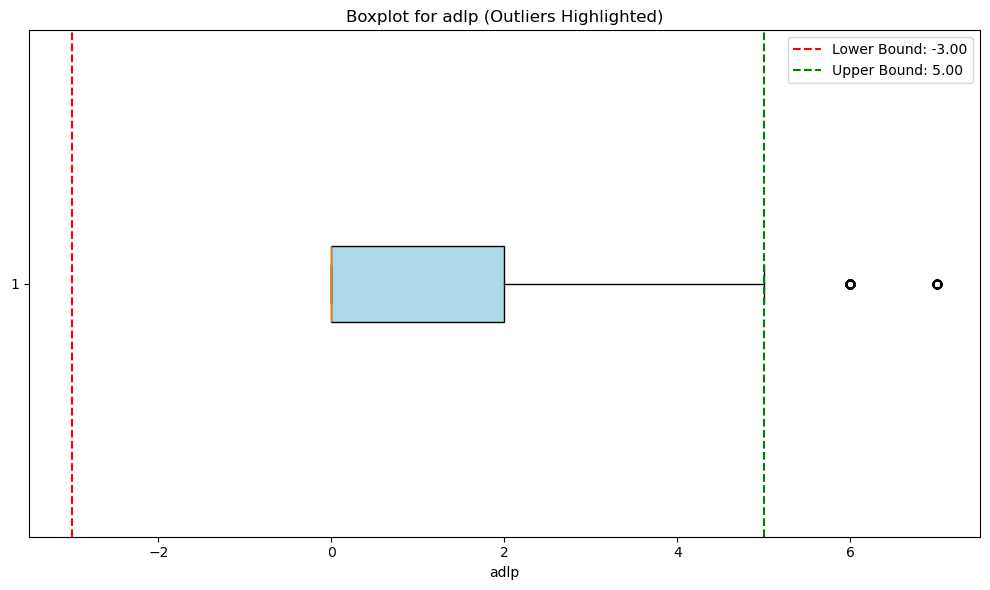

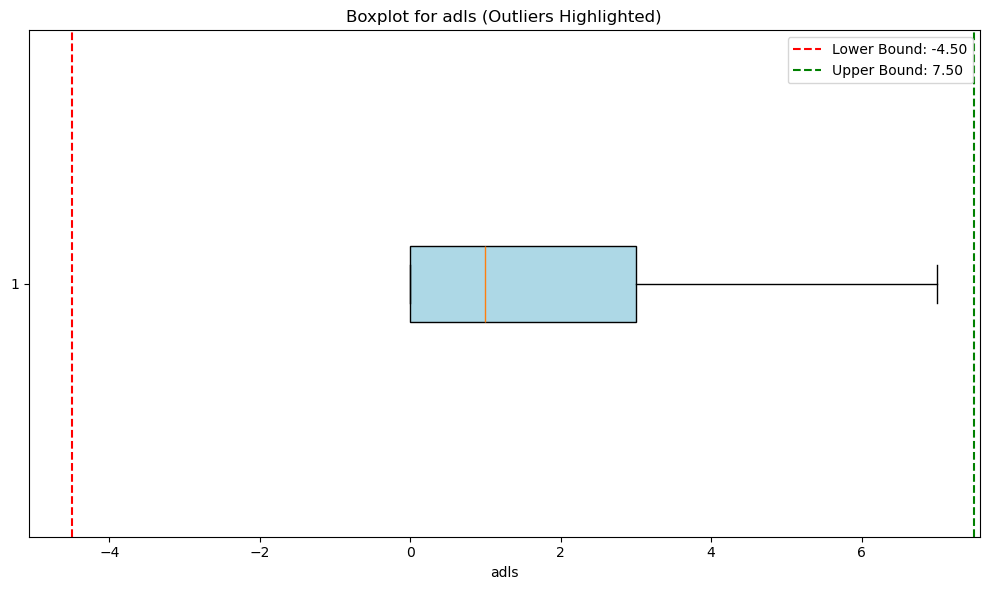

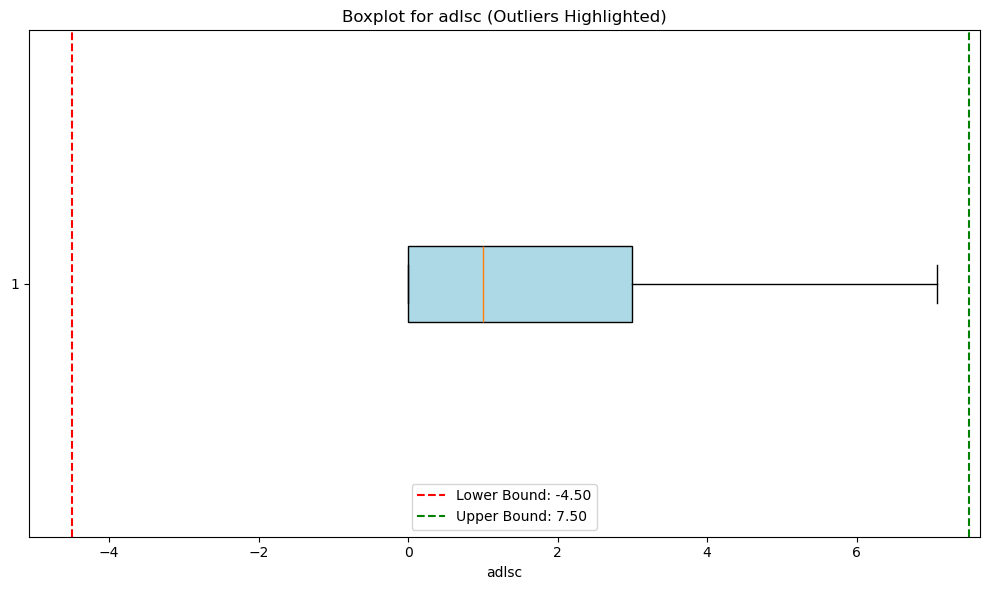

+----+------------+------------------+----------------+---------------+
|    | Variable   |   Outliers Count |    Lower Bound |   Upper Bound |
+====+============+==================+================+===============+
|  6 | scoma      |             1955 |    -13.5       |      22.5     |
+----+------------+------------------+----------------+---------------+
| 15 | hday       |             1543 |     -2         |       6       |
+----+------------+------------------+----------------+---------------+
| 27 | crea       |              987 |     -0.600098  |       3.3999  |
+----+------------+------------------+----------------+---------------+
| 26 | bili       |              926 |     -1.59985   |       3.99976 |
+----+------------+------------------+----------------+---------------+
|  7 | charges    |              912 | -72547         |  146885       |
+----+------------+------------------+----------------+---------------+
| 18 | dnrday     |              799 |    -15.5       |      36.

In [33]:
# Detect outliers in numerical variables using the IQR method and plot them
numerical_outliers = []

for col in numerical_vars:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]  # Outlier values
    numerical_outliers.append({
        "Variable": col,
        "Outliers Count": len(outliers),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
    })

    # Plot the boxplot for each variable
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
    plt.title(f'Boxplot for {col} (Outliers Highlighted)')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Convert to DataFrame for better visualization
numerical_outliers_df = pd.DataFrame(numerical_outliers).sort_values(by="Outliers Count", ascending=False)

# Display the outliers summary
from tabulate import tabulate
print(tabulate(numerical_outliers_df, headers="keys", tablefmt="grid"))

##### 3.2.3 Detecting Outliers in Binary Variables Using Frequency Analysis

In [35]:
# Detect outliers in binary variables and prepare a summary table
binary_outliers = []

for col in binary_vars:
    # Check for values outside the expected range (0 or 1)
    unexpected_values = data[~data[col].isin([0, 1])][col]
    lower_bound = 0  # Binary lower bound
    upper_bound = 1  # Binary upper bound
    binary_outliers.append({
        "Variable": col,
        "Outliers Count": len(unexpected_values),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
    })

# Convert binary outlier information to a DataFrame for better viewing
binary_outliers_df = pd.DataFrame(binary_outliers)

# Display the binary outlier summary using tabulate
print(tabulate(binary_outliers_df, headers="keys", tablefmt="grid"))


+----+------------+------------------+---------------+---------------+
|    | Variable   |   Outliers Count |   Lower Bound |   Upper Bound |
+====+============+==================+===============+===============+
|  0 | death      |                0 |             0 |             1 |
+----+------------+------------------+---------------+---------------+
|  1 | hospdead   |                0 |             0 |             1 |
+----+------------+------------------+---------------+---------------+
|  2 | diabetes   |                0 |             0 |             1 |
+----+------------+------------------+---------------+---------------+
|  3 | dementia   |                0 |             0 |             1 |
+----+------------+------------------+---------------+---------------+


##### **3.2.4 Detecting Outliers in Categorial variables by identifying unexpected categories**

In [37]:
# Detect outliers in categorical variables by identifying rare or unexpected categories
categorical_outliers = []

for col in categorical_vars:
    value_counts = data[col].value_counts()  # Count occurrences of each category
    rare_categories = value_counts[value_counts < 10]  # Define rare categories as those with fewer than 10 occurrences
    unexpected_categories = data[col][~data[col].isin(value_counts.index)].unique()  # Check for unexpected categories
    categorical_outliers.append({
        "Variable": col,
        "Rare Categories Count": len(rare_categories),
        "Rare Categories": rare_categories.index.tolist(),
        "Unexpected Categories": unexpected_categories.tolist() if len(unexpected_categories) > 0 else 'None',
    })

# Convert to DataFrame for better visualization
categorical_outliers_df = pd.DataFrame(categorical_outliers)

# Display the outliers summary using tabulate
print(tabulate(categorical_outliers_df, headers="keys", tablefmt="grid"))


+----+------------+-------------------------+-------------------+-------------------------+
|    | Variable   |   Rare Categories Count | Rare Categories   | Unexpected Categories   |
+====+============+=========================+===================+=========================+
|  0 | sex        |                       0 | []                | None                    |
+----+------------+-------------------------+-------------------+-------------------------+
|  1 | dzgroup    |                       0 | []                | None                    |
+----+------------+-------------------------+-------------------+-------------------------+
|  2 | dzclass    |                       0 | []                | None                    |
+----+------------+-------------------------+-------------------+-------------------------+
|  3 | income     |                       0 | []                | [nan]                   |
+----+------------+-------------------------+-------------------+---------------

#### **3.3 Duplicates**

In this section, we’ll look for duplicate entries to ease the data cleaning process. Handling duplicates early saves time by avoiding repeated work and helps uncover any hidden issues. It also makes the rest of the cleaning process, like filling in missing values or organizing the data, much smoother.

In [40]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]

# Check for duplicate columns by comparing each column's values across all rows
duplicate_columns = data.T.duplicated()

# Summarizing results
result_rows = f"Found {len(duplicate_rows)} duplicate rows." if not duplicate_rows.empty else "No duplicate rows found."
result_columns = (
    f"Found {duplicate_columns.sum()} duplicate columns." if duplicate_columns.any() else "No duplicate columns found."
)

result_rows, result_columns


('No duplicate rows found.', 'No duplicate columns found.')

#### **3.4 Evaluating Consistency and Completeness of the Dataset**

- **Completeness:** Given the high number of missing values we have, we can say that the data is incomplete.
- **Consistency:** The dataset is consistent (there are no duplicated rows or columns).

### **4. Basic Visualisations of Distributions and Correlations of Variables in the Uncleaned Dataset**

#### **4.1 Distribution of Numerical Variables**

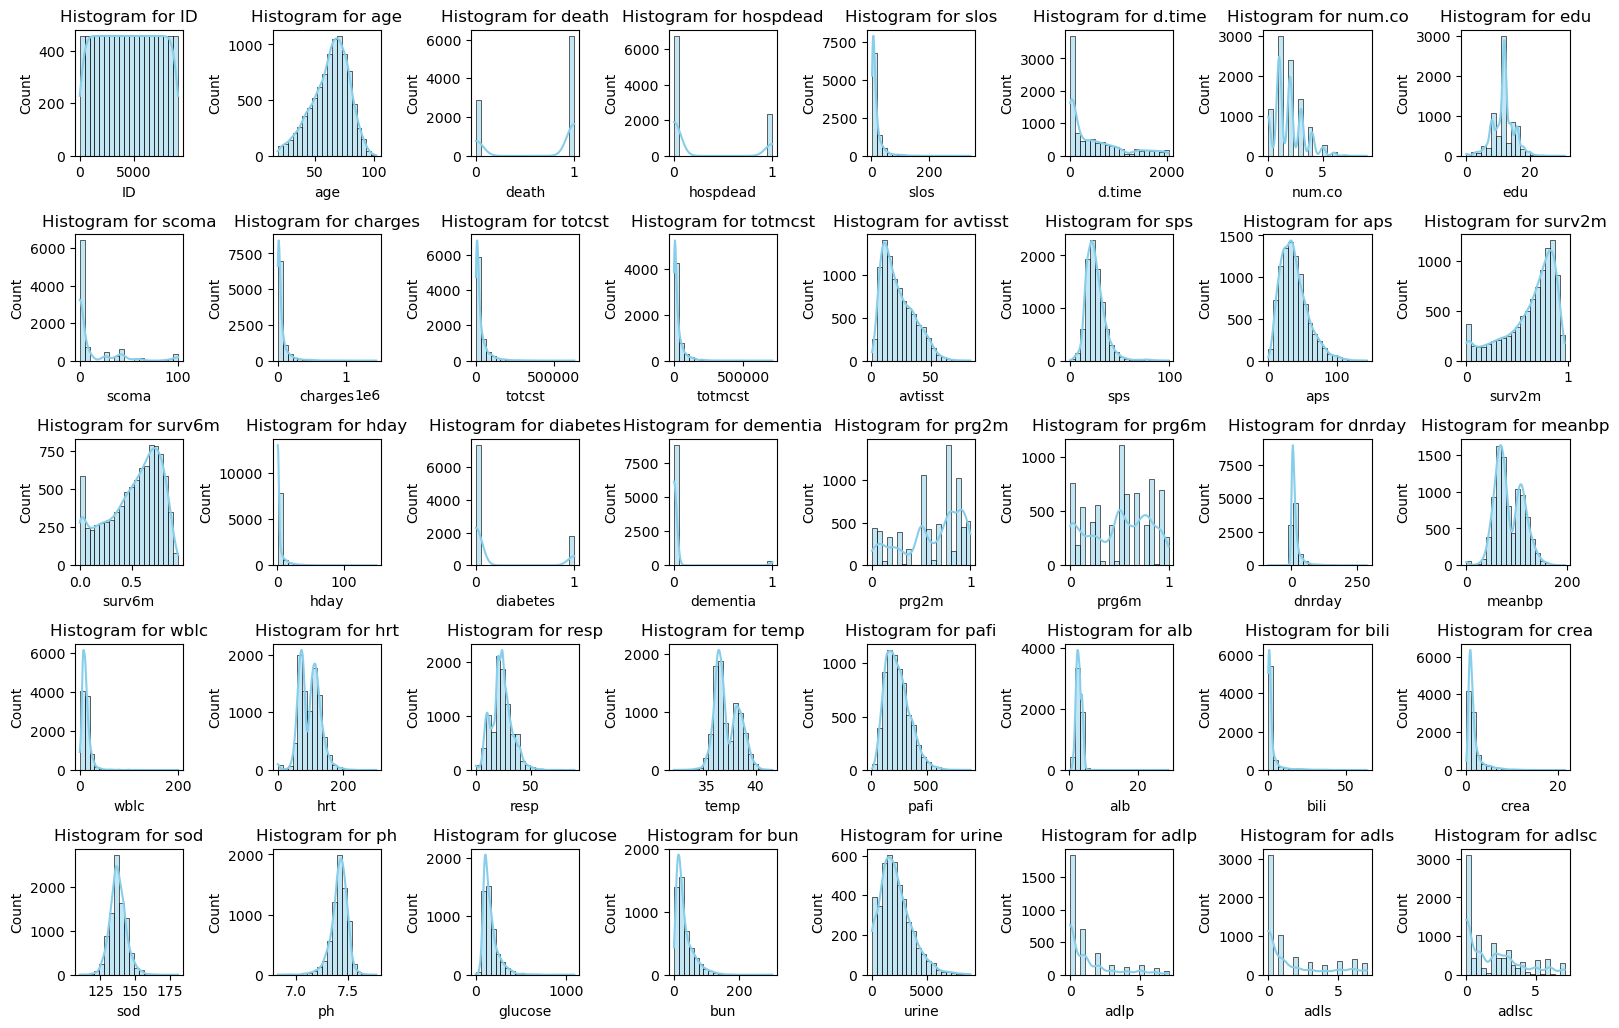

╒════════════╤══════════════╤══════════════════════════════╕
│ Variable   │   Skew Value │ Skewness Type                │
╞════════════╪══════════════╪══════════════════════════════╡
│ ID         │    0         │ Symmetrical                  │
├────────────┼──────────────┼──────────────────────────────┤
│ age        │   -0.502116  │ Moderately Negatively Skewed │
├────────────┼──────────────┼──────────────────────────────┤
│ death      │   -0.777072  │ Moderately Negatively Skewed │
├────────────┼──────────────┼──────────────────────────────┤
│ hospdead   │    1.09924   │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ slos       │    4.62462   │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ d.time     │    1.19926   │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ num.co     │    0.823294  │ Moderately Positively Skewed │
├────────────┼──────────

In [45]:
# Define the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns 

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    # Plot Histogram
    plt.subplot(6, 8, i+1)
    sns.histplot(data[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram for {col}")

plt.tight_layout()
plt.show()

# Creating a tabular summary of skewness using tabulate for better readability

# Calculating skewness for each numerical column
skewness_values = data[numerical_columns].skew()

# Determining the type of skewness based on skew values
skewness_type = []
for value in skewness_values:
    if value >= 1.0:
        skewness_type.append('Highly Positively Skewed')
    elif 0.5 < value < 1.0:
        skewness_type.append('Moderately Positively Skewed')
    elif -0.5 < value < 0.5:
        skewness_type.append('Symmetrical')
    elif -1.0 < value <= -0.5:
        skewness_type.append('Moderately Negatively Skewed')
    elif value <= -1.0:
        skewness_type.append('Highly Negatively Skewed')

# Creating a DataFrame to present the information
skewness_summary = pd.DataFrame({
    'Variable': skewness_values.index,
    'Skew Value': skewness_values.values,
    'Skewness Type': skewness_type
})

# Preparing the data for tabulation
table_data = []
for index, row in skewness_summary.iterrows():
    variable = row['Variable']
    skew_value = row['Skew Value']
    skew_type = row['Skewness Type']
    
    table_data.append([variable, skew_value, skew_type])

# Creating a tabular summary using tabulate
headers = ['Variable', 'Skew Value', 'Skewness Type']

skewness_summary_t = tabulate(table_data, headers=headers, tablefmt='fancy_grid')


# Bold the headers and specific values
skewness_summary_table = skewness_summary_t.replace(
    "Variable", colored("Variable", attrs=['bold'])
).replace(
    "Skew Value", colored("Skew Value", attrs=['bold'])
).replace(
    "Skewness Type", colored("Skewness Type", attrs=['bold'])
)

# Displaying the tabulated summary
print(skewness_summary_table)


**Note**
- **Highly Positively Skewed (>= 1.0)**: The distribution is highly positively skewed.
- **Moderately Positively Skewed (0.5 < value < 1.0)**: The distribution is moderately positively skewed.
- **Symmetrical (-0.5 < value < 0.5)**: The distribution is symmetrical (0 for perfectly symmetrical).
- **Moderately Negatively Skewed (-1.0 < value <= -0.5)**: The distribution is moderately negatively skewed.
- **Highly Negatively Skewed (<= -1.0)**: The distribution is highly negatively skewed.

#### **4.2 Distribution of Categorical Variables**

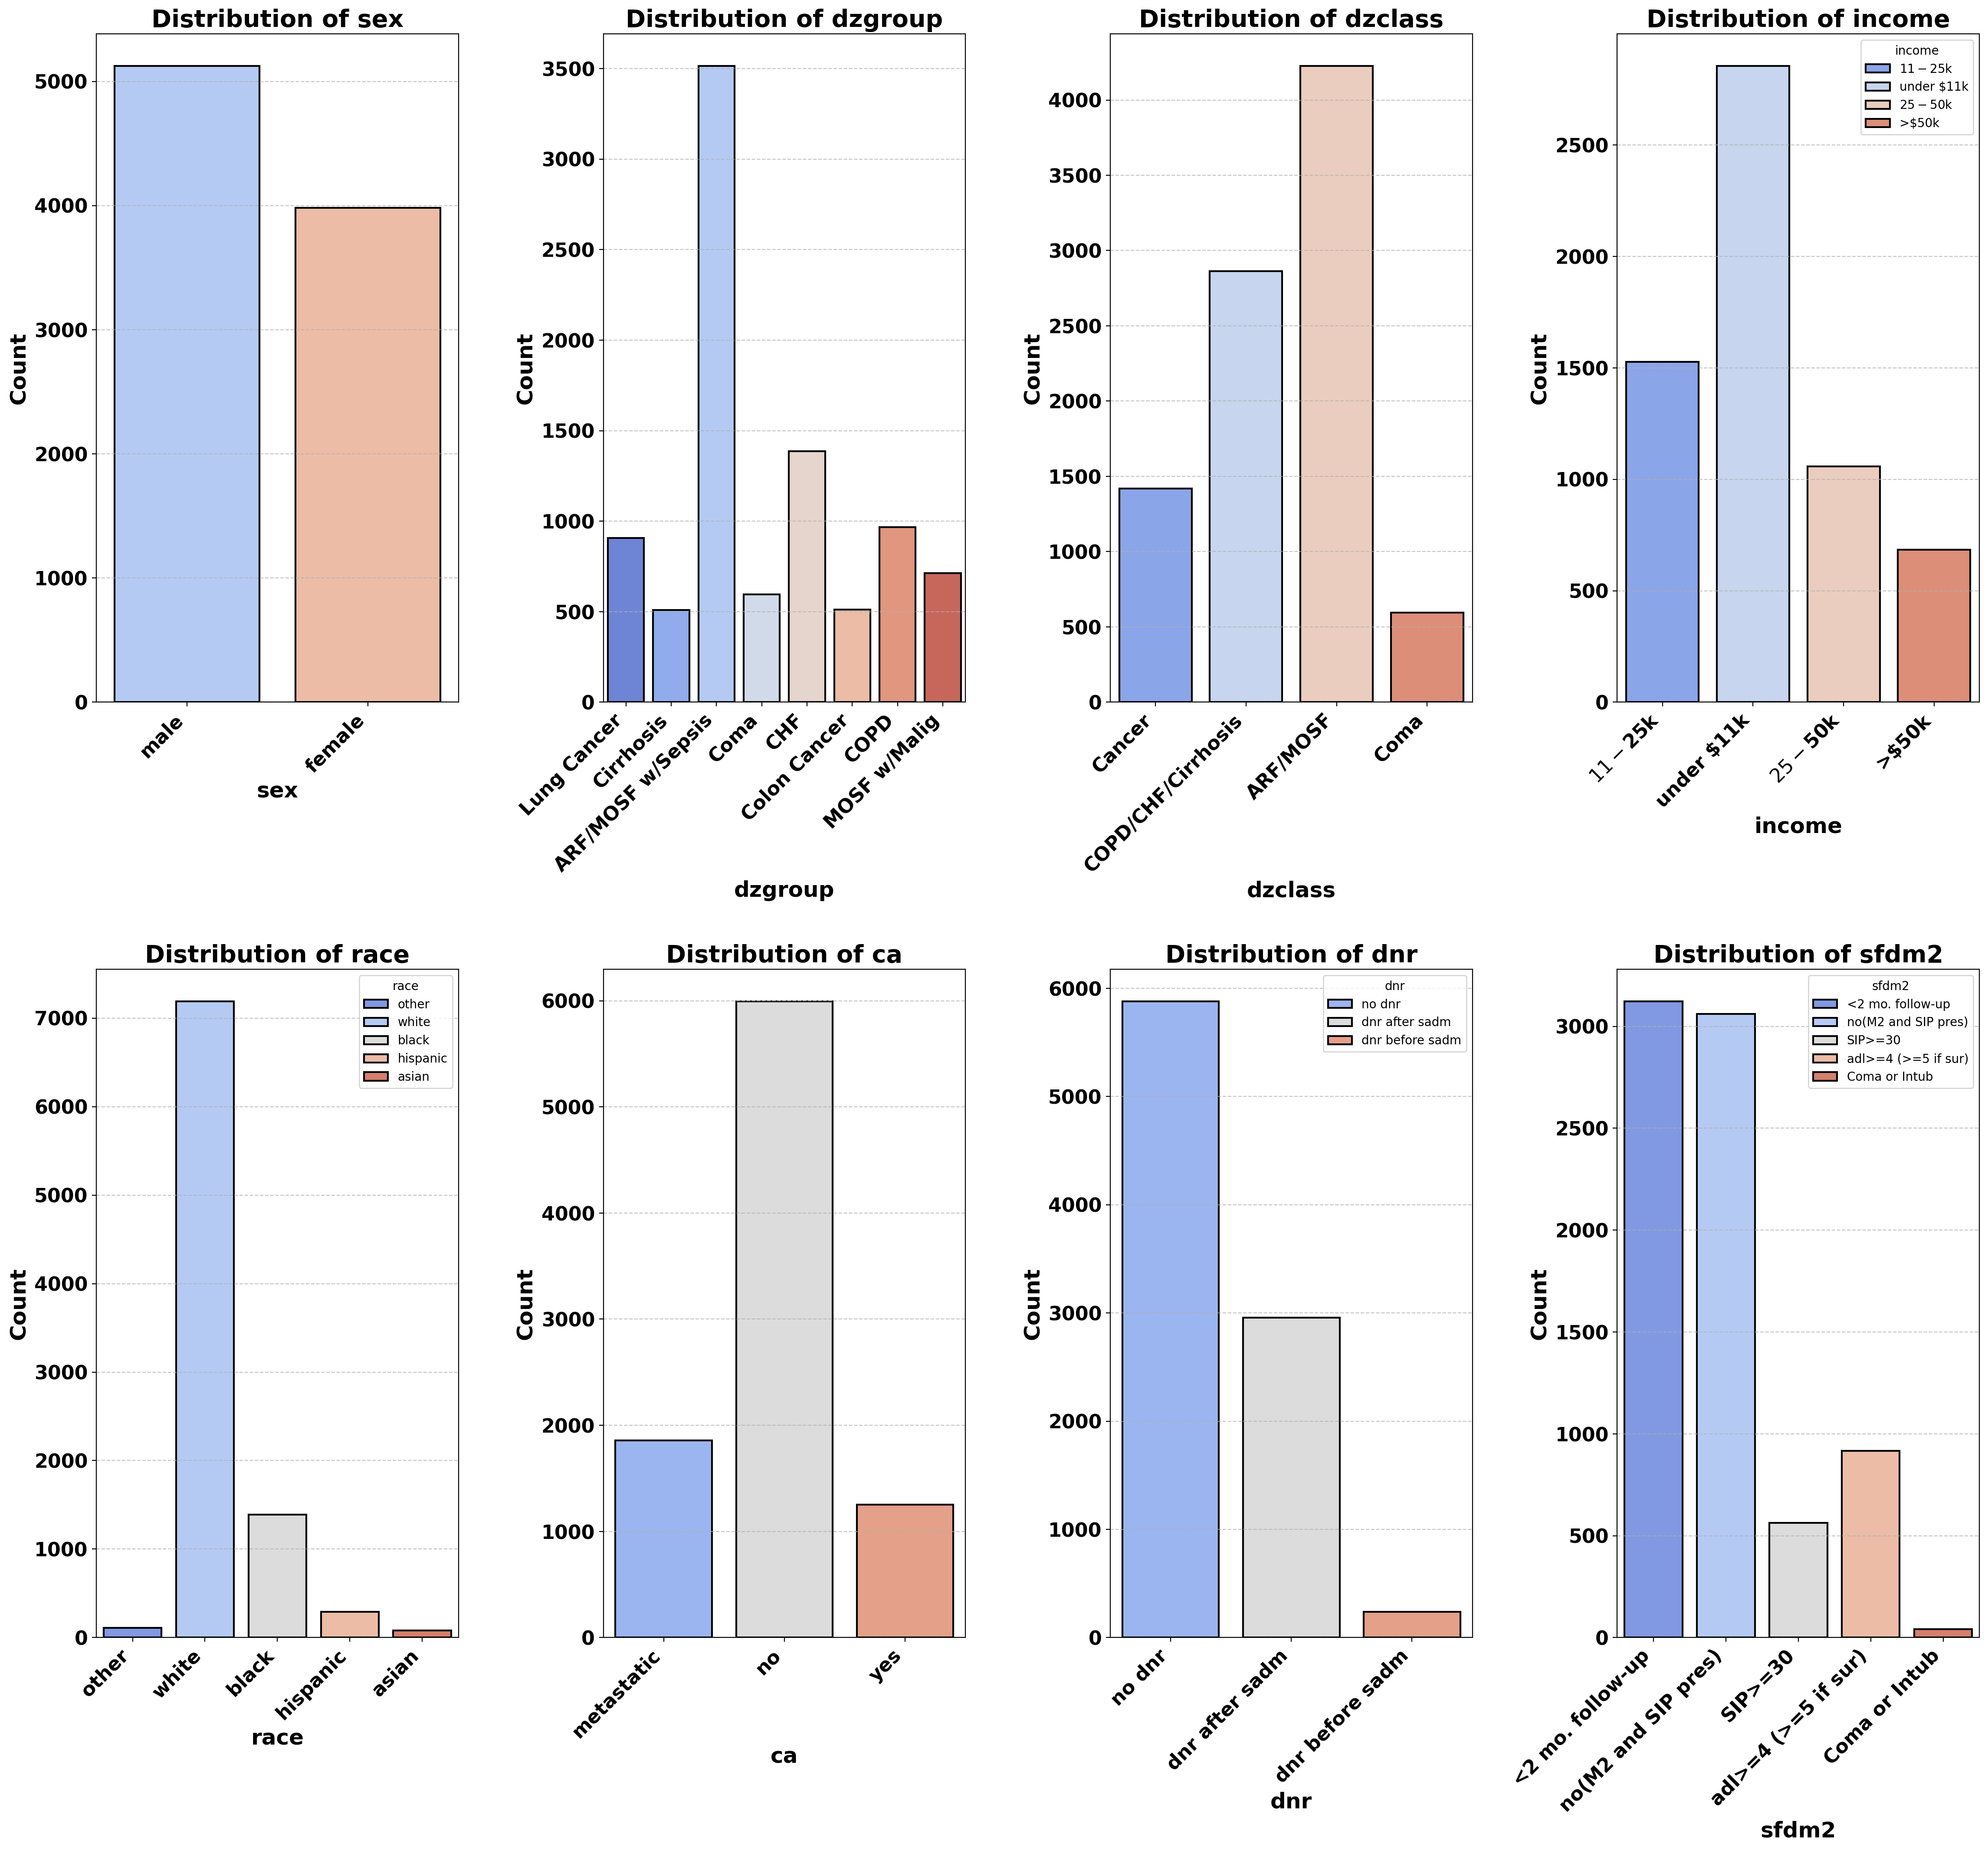

Descriptive Summary for 'sex':
Total Categories: 2
Most Common Category: 'male' with Count: 5125 (56.29%)
Least Common Category: 'female' with Count: 3980 (43.71%)


Descriptive Summary for 'dzgroup':
Total Categories: 8
Most Common Category: 'ARF/MOSF w/Sepsis' with Count: 3515 (38.61%)
Least Common Category: 'Cirrhosis' with Count: 508 (5.58%)


Descriptive Summary for 'dzclass':
Total Categories: 4
Most Common Category: 'ARF/MOSF' with Count: 4227 (46.43%)
Least Common Category: 'Coma' with Count: 596 (6.55%)


Descriptive Summary for 'income':
Total Categories: 4
Most Common Category: 'under $11k' with Count: 2855 (46.63%)
Least Common Category: '>$50k' with Count: 684 (11.17%)


Descriptive Summary for 'race':
Total Categories: 5
Most Common Category: 'white' with Count: 7191 (79.34%)
Least Common Category: 'asian' with Count: 79 (0.87%)


Descriptive Summary for 'ca':
Total Categories: 3
Most Common Category: 'no' with Count: 5995 (65.84%)
Least Common Category: 'yes' with Count:

In [48]:
# Define the categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Set the figure size and DPI for higher resolution
plt.figure(figsize=(28, 24), dpi=200)  # Increased DPI for better quality

# Calculate the number of rows and columns for the grid layout
num_cols = 4  # 4 plots per row
num_rows = (len(categorical_columns) // num_cols) + (1 if len(categorical_columns) % num_cols != 0 else 0)

# Loop through each categorical column and create the bar plots
for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplots in a grid layout

    # Create the count plot for each categorical variable
    sns.countplot(x=data[col], hue=data[col], palette="coolwarm", edgecolor='black', linewidth=1.5)

    # Set the title of each plot with bold font
    plt.title(f"Distribution of {col}", fontsize=20, fontweight='bold')

    # Slant the x-tick labels at 45 degrees
    plt.xticks(rotation=45, ha="right", fontsize=16, fontweight='bold')  # Bolder font for x-tick labels

    # Increase font size and boldness for y-tick labels
    plt.yticks(fontsize=16, fontweight='bold')

    # Axis labels with bolder font and larger size
    plt.xlabel(col, fontsize=18, fontweight='bold')
    plt.ylabel('Count', fontsize=18, fontweight='bold')

    # Add gridlines for the y-axis to improve readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout with padding to avoid label overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase the spacing between plots

# Show the final plot
plt.show()


# Generating a brief descriptive summary for each categorical variable
for col in categorical_columns:
    value_counts = data[col].value_counts()
    percentage = data[col].value_counts(normalize=True) * 100

    # Creating a summary for each categorical variable
    print(f"Descriptive Summary for '{col}':")
    print(f"Total Categories: {len(value_counts)}")
    print(f"Most Common Category: '{value_counts.idxmax()}' with Count: {value_counts.max()} ({percentage.max():.2f}%)")
    print(f"Least Common Category: '{value_counts.idxmin()}' with Count: {value_counts.min()} ({percentage.min():.2f}%)")
    print("\n")


#### **4.3 Correlation of Variables**

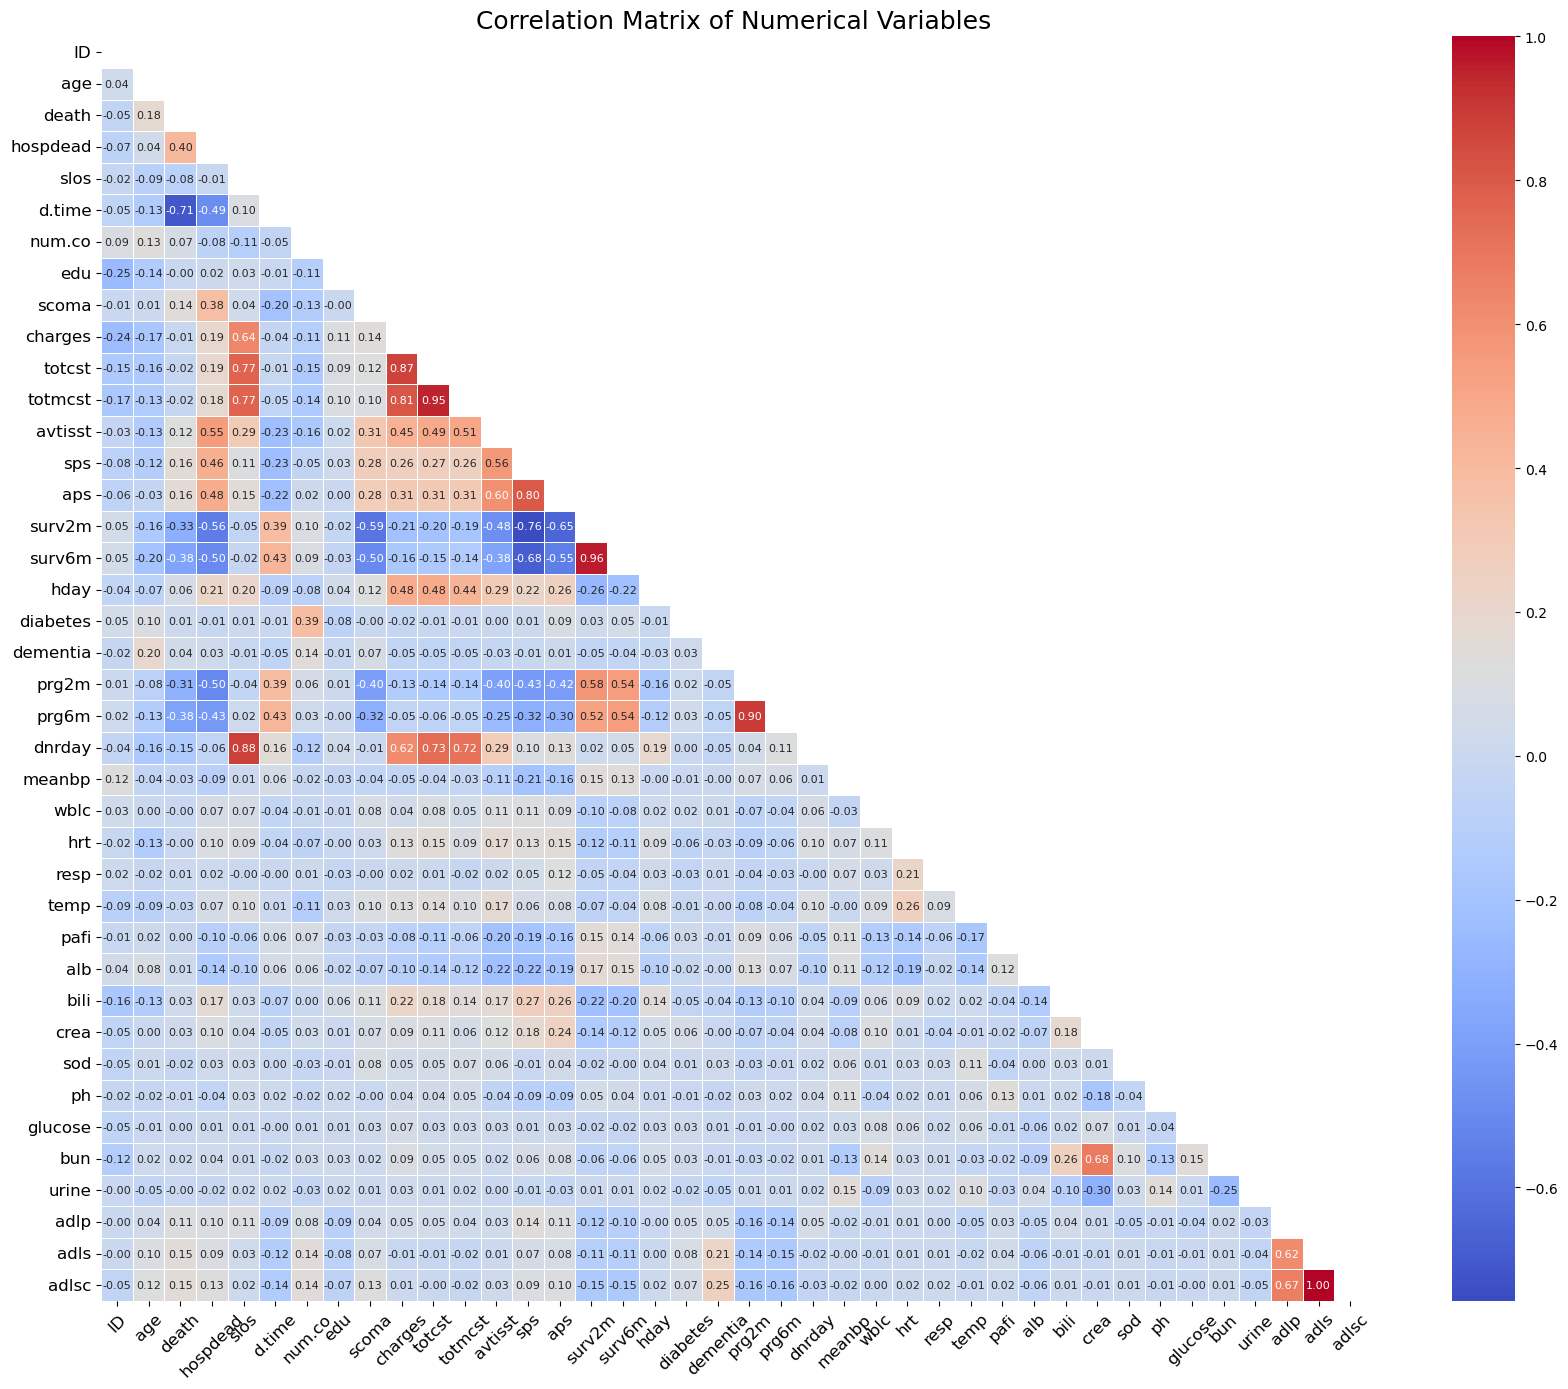

In [50]:
# Correlation matrix for numerical variables
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Remove columns with zero variance (constant values)
valid_columns = numerical_data.loc[:, numerical_data.var() > 0]
correlation_matrix = valid_columns.corr()

# Mask the upper triangle of the correlation matrix to remove the mirror image
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# correlation matrix visualization
plt.figure(figsize=(18, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.7,
    annot_kws={"size": 8},
    square=True,
    mask=mask  # Apply mask to upper triangle
)
plt.title("Correlation Matrix of Numerical Variables", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [51]:
# Define thresholds for correlations
positive_threshold = 0.6
negative_threshold = -0.5

# Get all pairs of correlations from the correlation matrix
correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out correlations of 1 (self-correlations)
correlated_pairs = correlated_pairs[(correlated_pairs < 1)]

# Filter strong positive and negative correlations
positive_correlations = correlated_pairs[correlated_pairs > positive_threshold]
negative_correlations = correlated_pairs[correlated_pairs < negative_threshold]

# Combine positive and negative correlations
strong_correlations = pd.concat([positive_correlations, negative_correlations])

# Remove duplicate pairs by considering only one direction for each pair
strong_correlations_unique = strong_correlations[
    strong_correlations.index.get_level_values(0) < strong_correlations.index.get_level_values(1)
]

# Step 1: Add descriptions for the correlation values
correlation_descriptions = []
for value in strong_correlations_unique:
    if value >= 0.8:
        correlation_descriptions.append("Very Strong Positive Correlation")
    elif positive_threshold < value < 0.8:
        correlation_descriptions.append("Strong Positive Correlation")
    elif -0.8 < value < negative_threshold:
        correlation_descriptions.append("Strong Negative Correlation")
    elif value <= -0.8:
        correlation_descriptions.append("Very Strong Negative Correlation")

# Step 2: Create a DataFrame to summarize correlations with descriptions
correlation_summary = pd.DataFrame({
    "Variable 1": strong_correlations_unique.index.get_level_values(0),
    "Variable 2": strong_correlations_unique.index.get_level_values(1),
    "Correlation": strong_correlations_unique.values,
    "Description": correlation_descriptions
})

# Step 3: Convert the DataFrame into a tabular format using tabulate
headers = ["Variable 1", "Variable 2", "Correlation", "Description"]
table = tabulate(correlation_summary, headers=headers, tablefmt="fancy_grid", showindex=False)

# Display the table
print(table)

╒══════════════╤══════════════╤═══════════════╤══════════════════════════════════╕
│ Variable 1   │ Variable 2   │   Correlation │ Description                      │
╞══════════════╪══════════════╪═══════════════╪══════════════════════════════════╡
│ surv2m       │ surv6m       │      0.960406 │ Very Strong Positive Correlation │
├──────────────┼──────────────┼───────────────┼──────────────────────────────────┤
│ totcst       │ totmcst      │      0.948995 │ Very Strong Positive Correlation │
├──────────────┼──────────────┼───────────────┼──────────────────────────────────┤
│ prg2m        │ prg6m        │      0.896288 │ Very Strong Positive Correlation │
├──────────────┼──────────────┼───────────────┼──────────────────────────────────┤
│ dnrday       │ slos         │      0.882923 │ Very Strong Positive Correlation │
├──────────────┼──────────────┼───────────────┼──────────────────────────────────┤
│ charges      │ totcst       │      0.871896 │ Very Strong Positive Correlation │
├───

We will now proceed with Exploratory Data Analysis (EDA). However, before starting EDA, it is essential to clean the data to ensure the accuracy and reliability of our analysis. Cleaning the data handles missing values and eliminate outliers that could skew the results, allowing us to derive meaningful insights from the dataset.

## **Data Cleaning in Preparation for Exploratory Data Analysis**

Our goal is to clean the data without dropping essential rows or columns, as removing missing data in a health dataset can lead to significant information loss, introduce bias, and compromise the representativeness of the analysis.

### **1. Handling Missing Values**

We will apply the imputation method to handle missing data. For numerical variables, we will use the median to reduce skewness and preserve the data distribution. For categorical variables, we will impute missing values with the mode to retain the most frequent category.

The missing values for some variables specified in the code were filled based on the default baseline physiologic values provided by Vanderbilt University Department of Biostatistics, Professor Frank Harrell (2022). This was done to ensure consistency with the definitions and methodologies outlined in the original dataset documentation. For details on this, visit [https://hbiostat.org/data/](https://hbiostat.org/data/). 

In [57]:
# Let's make a copy of the data and proceed
df = data.copy()

In [58]:
# Combining the two approaches to handle missing values:

# Define specific fill values for certain columns
fill_values = {
    'alb': 3.5,
    'pafi': 333.3,
    'bili': 1.01,
    'crea': 1.01,
    'bun': 6.51,
    'wblc': 9,
    'urine': 2502
}

# Fill missing values in the specified columns using the defined values
df.fillna(value=fill_values, inplace=True)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute missing numerical data with the median
df[numerical_cols] = df[numerical_cols].apply(
    lambda col: col.fillna(col.median())
)

# Impute missing categorical data with the mode
df[categorical_cols] = df[categorical_cols].apply(
    lambda col: col.fillna(col.mode()[0])
)

# Verify there are no missing values left
final_missing_values_check = df.isnull().sum()

final_missing_values_check

ID          0
age         0
death       0
sex         0
hospdead    0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
income      0
scoma       0
charges     0
totcst      0
totmcst     0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adls        0
sfdm2       0
adlsc       0
dtype: int64

There are no missing values in the dataset (df).

### **2 Handling Outliers**

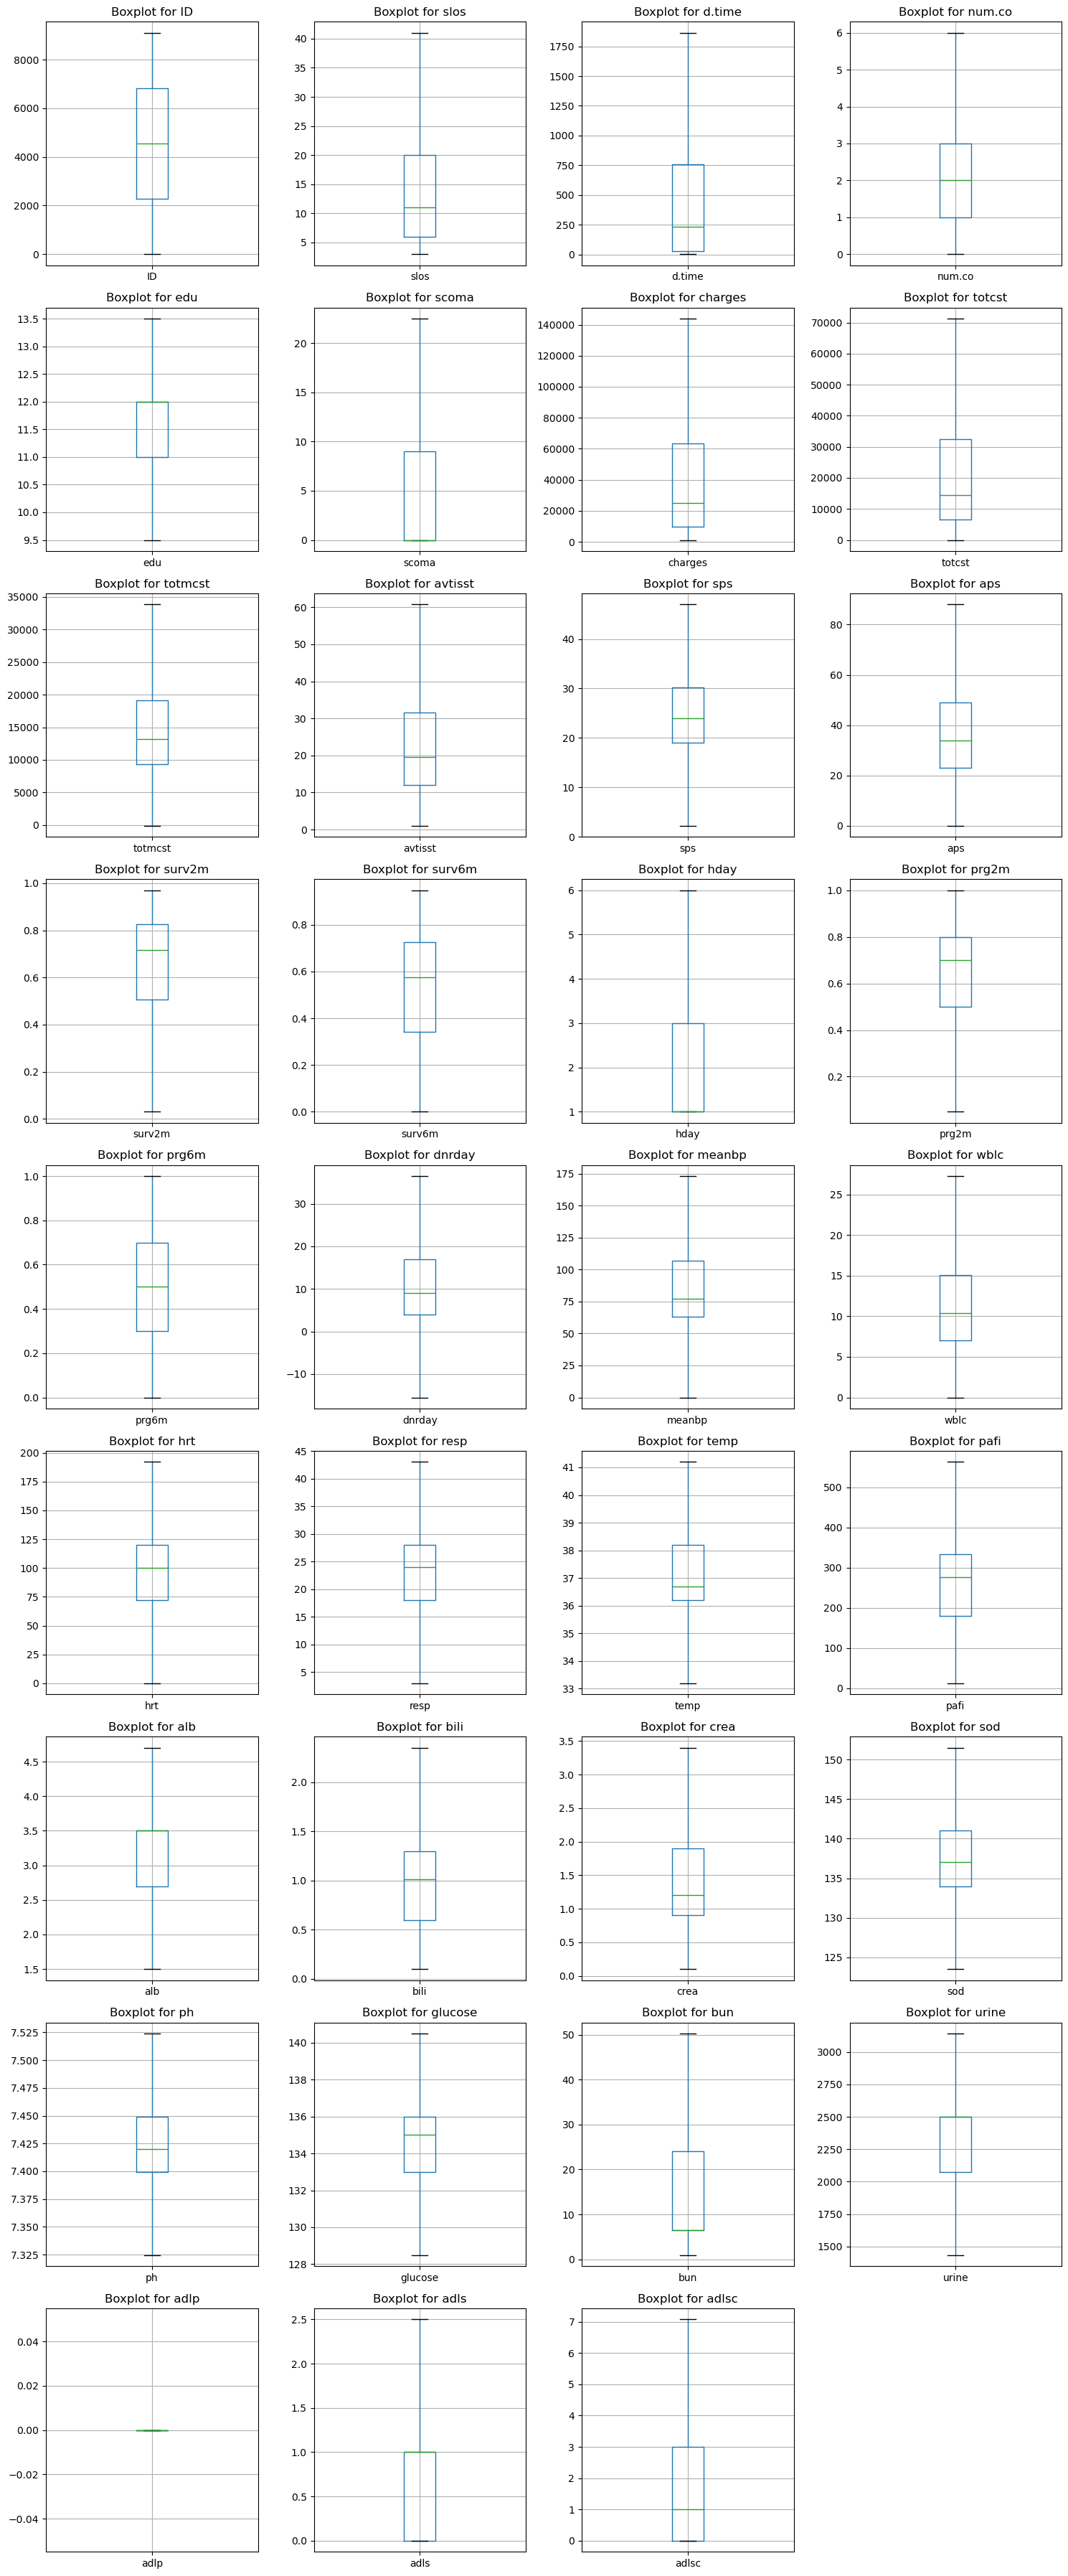

In [61]:
# Identify numerical variables
numerical_vars = df.select_dtypes(include=['number']).columns
binary_vars = [col for col in numerical_vars if df[col].nunique() == 2]
numerical_col = [col for col in numerical_vars if col not in binary_vars]

# List the variables to exclude (replace with actual column names to exclude)
excluded_vars = ['age']
numerical_col = [col for col in numerical_col if col not in excluded_vars]

# Define the capping function
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply capping for outliers
for col in numerical_col:
    df[col] = cap_outliers(df[col])

# Visualize the results with boxplots
num_cols = len(numerical_col)
rows = (num_cols // 4) + 1
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numerical_col):
    plt.subplot(rows, 4, i + 1)
    df.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

Outliers have been handled using the capping (winsorization) method. We used this method to handle outliers because it retains data integrity by adjusting extreme values to within permissible thresholds, minimizing their impact without removing any observations.

## **Exploratory Data Analysis**

### **1. Distribution of Variables**

#### **1.1 Distribution of Continuous Variables**

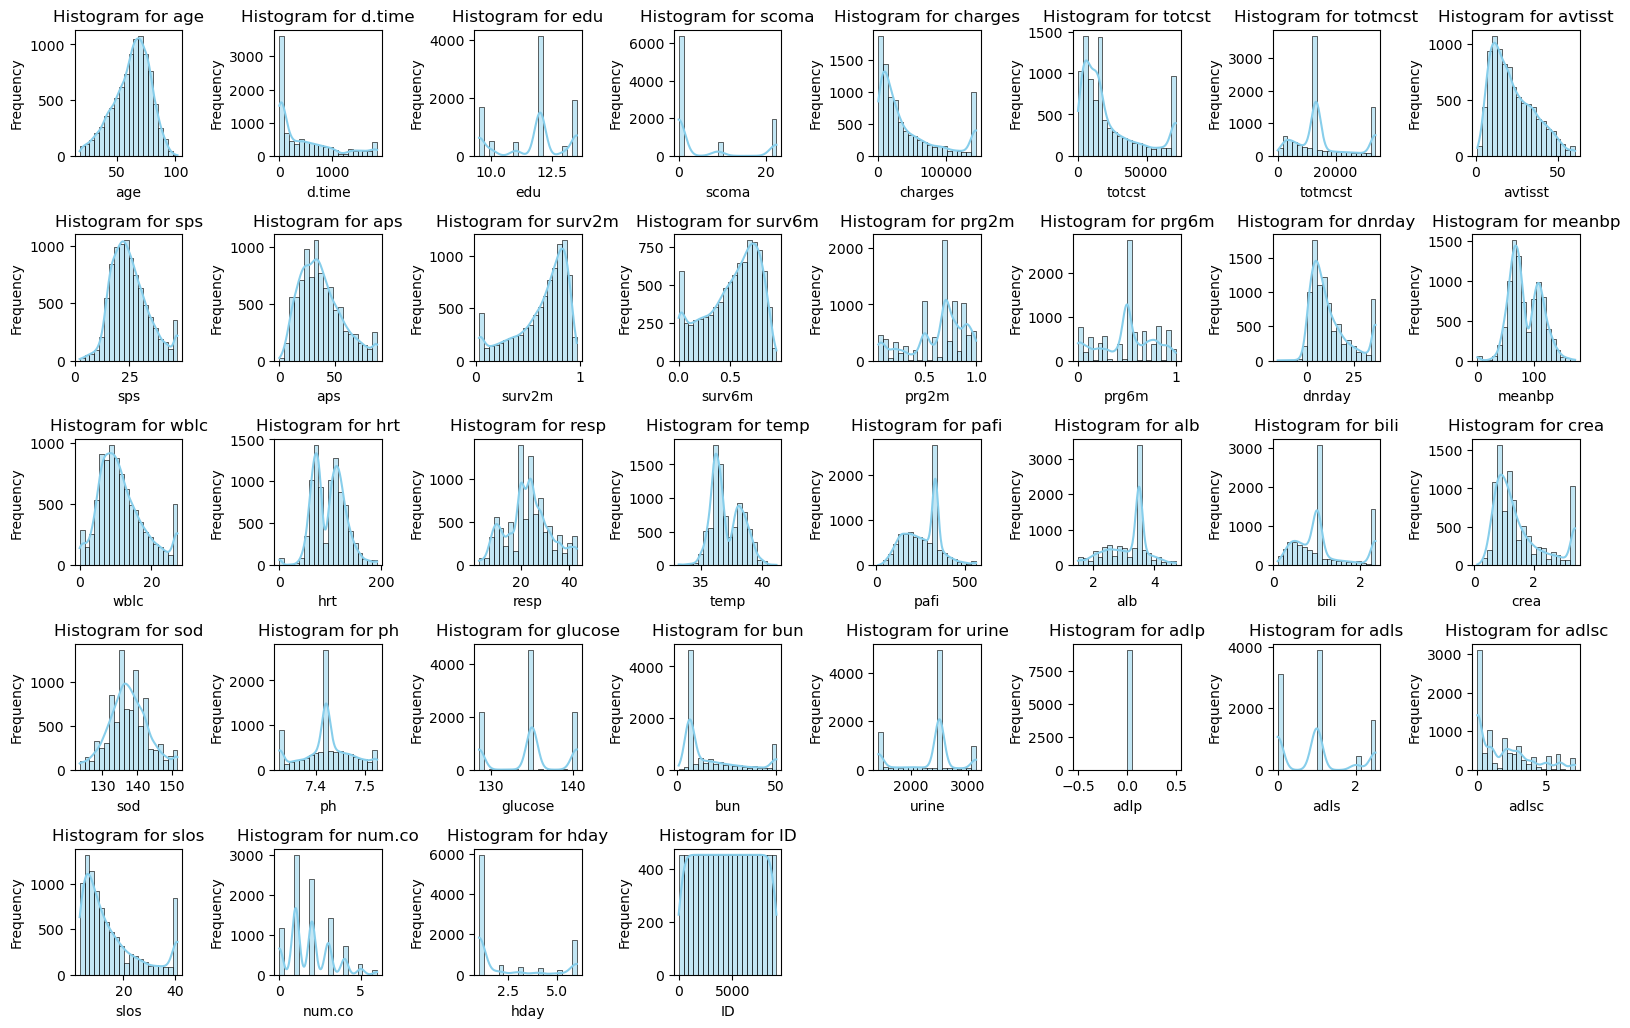

╒════════════╤══════════════╤══════════════════════════════╕
│ Variable   │   Skew Value │ Skewness Type                │
╞════════════╪══════════════╪══════════════════════════════╡
│ age        │   -0.502116  │ Moderately Negatively Skewed │
├────────────┼──────────────┼──────────────────────────────┤
│ d.time     │    1.16143   │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ edu        │   -0.421882  │ Symmetrical                  │
├────────────┼──────────────┼──────────────────────────────┤
│ scoma      │    1.19297   │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ charges    │    1.19071   │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ totcst     │    1.1727    │ Highly Positively Skewed     │
├────────────┼──────────────┼──────────────────────────────┤
│ totmcst    │    0.736899  │ Moderately Positively Skewed │
├────────────┼──────────

In [66]:
# Define the numerical columns
# Select float columns
numerical_columns = list(df.select_dtypes(include=['float64']).columns)

# Manually include 'slos', 'num.co', 'hday', and 'ID'
numerical_columns += ['slos', 'num.co', 'hday', 'ID']

# Plot Distribution (Histogram + KDE) for all selected numerical variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    if col in df.columns:  # Ensure the column exists in the dataset
        # Plot Histogram
        plt.subplot(6, 8, i + 1)
        sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histogram for {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Creating a tabular summary of skewness for all numerical columns
# Calculating skewness for each numerical column
skewness_values = df[numerical_columns].skew()

# Determining the type of skewness based on skew values
skewness_type = []
for value in skewness_values:
    if value >= 1.0:
        skewness_type.append('Highly Positively Skewed')
    elif 0.5 < value < 1.0:
        skewness_type.append('Moderately Positively Skewed')
    elif -0.5 < value < 0.5:
        skewness_type.append('Symmetrical')
    elif -1.0 < value <= -0.5:
        skewness_type.append('Moderately Negatively Skewed')
    elif value <= -1.0:
        skewness_type.append('Highly Negatively Skewed')

# Creating a DataFrame to present the skewness information
skewness_summary = pd.DataFrame({
    'Variable': skewness_values.index,
    'Skew Value': skewness_values.values,
    'Skewness Type': skewness_type
})

# Preparing the data for tabulation
table_df = []
for index, row in skewness_summary.iterrows():
    variable = row['Variable']
    skew_value = row['Skew Value']
    skew_type = row['Skewness Type']
    
    table_df.append([variable, skew_value, skew_type])

# Creating a tabular summary using tabulate
headers = ['Variable', 'Skew Value', 'Skewness Type']

# Tabulate the skewness summary with fancy grid
skewness_summary_t = tabulate(table_df, headers=headers, tablefmt='fancy_grid')

# Bold the headers and specific values
skewness_summary_table = skewness_summary_t.replace(
    "Variable", colored("Variable", attrs=['bold'])
).replace(
    "Skew Value", colored("Skew Value", attrs=['bold'])
).replace(
    "Skewness Type", colored("Skewness Type", attrs=['bold'])
)

# Displaying the tabulated summary
print(skewness_summary_table)


#### **1.2 Distribution of Binary Variables**

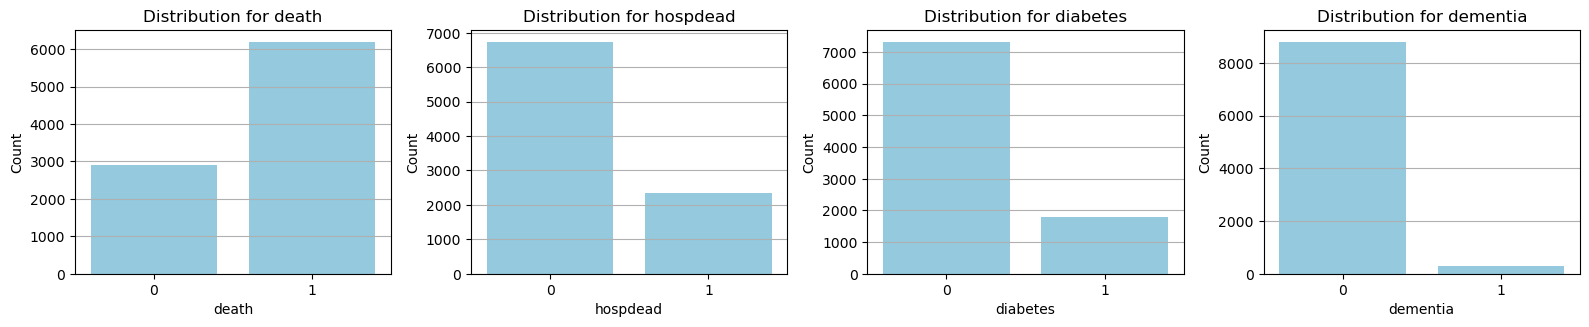

In [68]:

# Step 1: Define the integer columns excluding 'slos' and 'ID'
numerical_columns = df.select_dtypes(include=['int64']).columns

# Exclude 'slos' and 'ID'
numerical_columns = [col for col in numerical_columns if col not in ['slos', 'num.co', 'hday', 'ID']]

# Step 2: Plot Distribution for integer variables using Bar Plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    # Check if the column has more than one unique value (to avoid constant columns)
    if df[col].nunique() > 1:
        plt.subplot(4, 4, i)  # Adjust grid layout based on number of integer columns
        sns.countplot(data=df, x=col, color='skyblue')
        plt.title(f'Distribution for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(axis='y')

plt.tight_layout()
plt.show()


#### **1.3 Distribution of Categorical Variables**

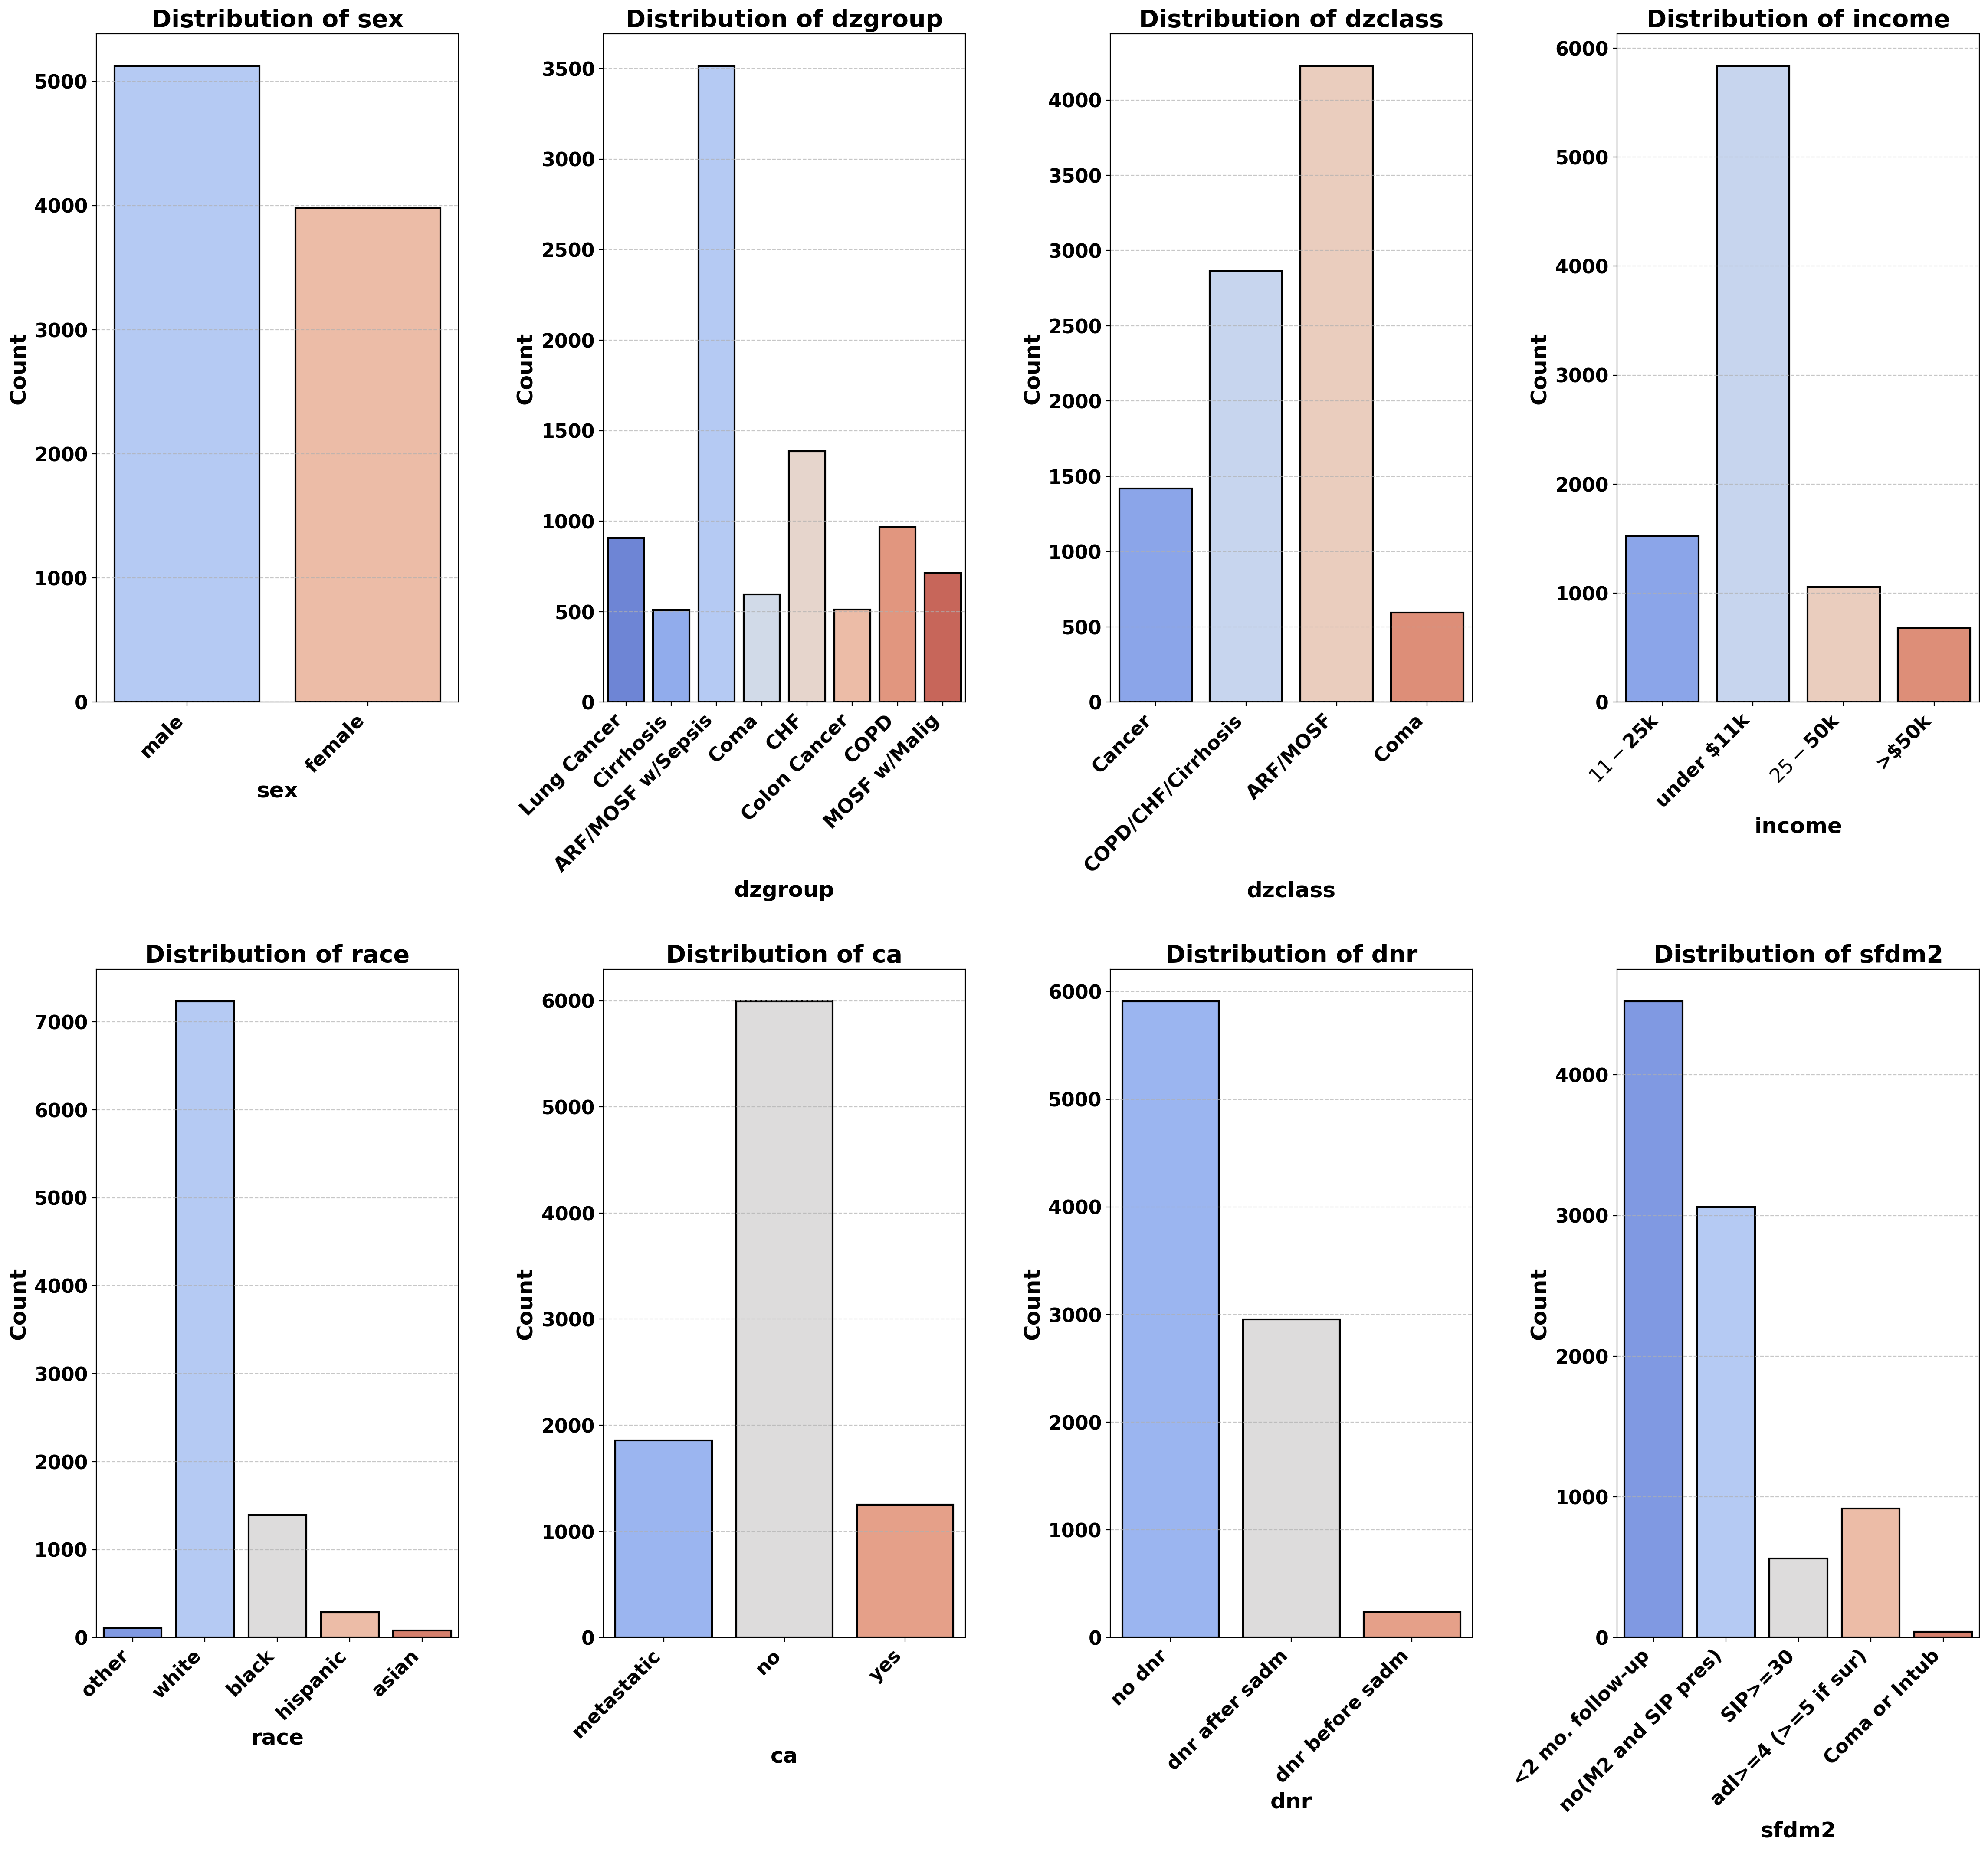

Descriptive Summary for 'sex':
Total Categories: 2
Most Common Category: 'male' with Count: 5125 (56.29%)
Least Common Category: 'female' with Count: 3980 (43.71%)


Descriptive Summary for 'dzgroup':
Total Categories: 8
Most Common Category: 'ARF/MOSF w/Sepsis' with Count: 3515 (38.61%)
Least Common Category: 'Cirrhosis' with Count: 508 (5.58%)


Descriptive Summary for 'dzclass':
Total Categories: 4
Most Common Category: 'ARF/MOSF' with Count: 4227 (46.43%)
Least Common Category: 'Coma' with Count: 596 (6.55%)


Descriptive Summary for 'income':
Total Categories: 4
Most Common Category: 'under $11k' with Count: 5837 (64.11%)
Least Common Category: '>$50k' with Count: 684 (7.51%)


Descriptive Summary for 'race':
Total Categories: 5
Most Common Category: 'white' with Count: 7233 (79.44%)
Least Common Category: 'asian' with Count: 79 (0.87%)


Descriptive Summary for 'ca':
Total Categories: 3
Most Common Category: 'no' with Count: 5995 (65.84%)
Least Common Category: 'yes' with Count: 

In [70]:
# Define the categorical columns excluding 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Set the figure size and DPI for higher resolution
plt.figure(figsize=(28, 24), dpi=200)  # Increased DPI for better quality

# Calculate the number of rows and columns for the grid layout
num_cols = 4  # 4 plots per row
num_rows = (len(categorical_columns) // num_cols) + (1 if len(categorical_columns) % num_cols != 0 else 0)

# Loop through each categorical column and create the bar plots
for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplots in a grid layout

    # Create the count plot for each categorical variable
    sns.countplot(x=df[col], hue=df[col], palette="coolwarm", edgecolor='black', linewidth=1.5)

    # Set the title of each plot with bold font
    plt.title(f"Distribution of {col}", fontsize=20, fontweight='bold')

    # Slant the x-tick labels at 45 degrees
    plt.xticks(rotation=45, ha="right", fontsize=16, fontweight='bold')  # Bolder font for x-tick labels

    # Increase font size and boldness for y-tick labels
    plt.yticks(fontsize=16, fontweight='bold')

    # Axis labels with bolder font and larger size
    plt.xlabel(col, fontsize=18, fontweight='bold')
    plt.ylabel('Count', fontsize=18, fontweight='bold')

    # Add gridlines for the y-axis to improve readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout with padding to avoid label overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase the spacing between plots

# Show the final plot
plt.show()


# Generating a brief descriptive summary for each categorical variable
for col in categorical_columns:
    value_counts = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100

    # Creating a summary for each categorical variable
    print(f"Descriptive Summary for '{col}':")
    print(f"Total Categories: {len(value_counts)}")
    print(f"Most Common Category: '{value_counts.idxmax()}' with Count: {value_counts.max()} ({percentage.max():.2f}%)")
    print(f"Least Common Category: '{value_counts.idxmin()}' with Count: {value_counts.min()} ({percentage.min():.2f}%)")
    print("\n")


### **2. Exploring Relationships between Variables**

#### **2.1 Correlation Analysis**

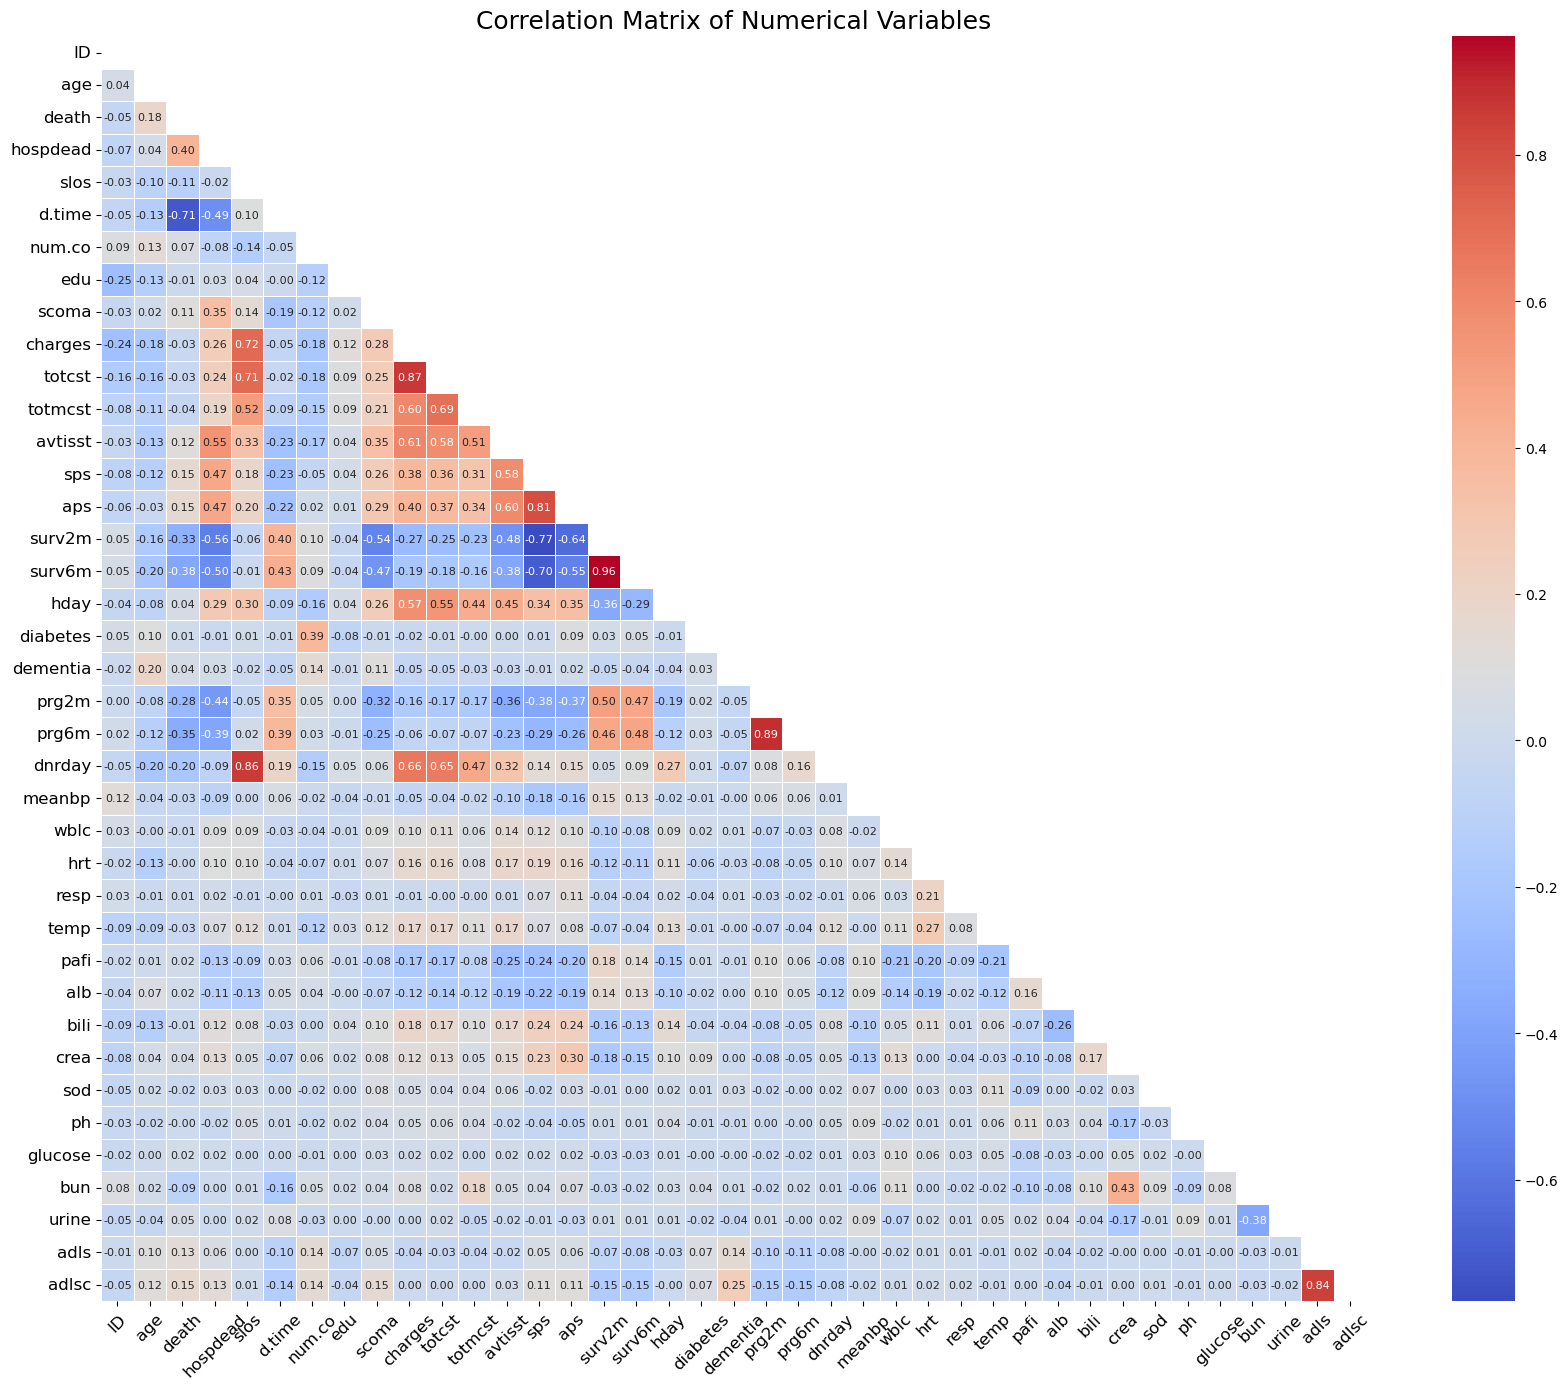

In [73]:
# Correlation matrix for numerical variables
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Remove columns with zero variance (constant values)
valid_columns = numerical_data.loc[:, numerical_data.var() > 0]
correlation_matrix = valid_columns.corr()

# Mask the upper triangle of the correlation matrix to remove the mirror image
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Enhanced correlation matrix visualization with adjusted formatting
plt.figure(figsize=(18, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.7,
    annot_kws={"size": 8},
    square=True,
    mask=mask  # Apply mask to upper triangle
)
plt.title("Correlation Matrix of Numerical Variables", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [74]:
# Define thresholds for positive and negative correlations
positive_threshold = 0.45
negative_threshold = -0.5

# Get all pairs of correlations from the correlation matrix
correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter for correlations less than 1 (excluding self-correlations)
correlated_pairs = correlated_pairs[(correlated_pairs < 1)]

# Separate strong positive and strong negative correlations
positive_correlations = correlated_pairs[correlated_pairs > positive_threshold]
negative_correlations = correlated_pairs[correlated_pairs < negative_threshold]

# Combine positive and negative correlations into a single DataFrame
strong_correlations = pd.concat([positive_correlations, negative_correlations])

# Remove duplicate pairs by considering only one direction for each pair
strong_correlations_unique = strong_correlations[
    strong_correlations.index.get_level_values(0) < strong_correlations.index.get_level_values(1)
]

# Step 1: Add a description for each correlation
correlation_descriptions = []
for value in strong_correlations_unique:
    if value >= 0.7:
        correlation_descriptions.append("Strong Positive")
    elif 0.45 < value < 0.7:
        correlation_descriptions.append("Moderate Positive")
    elif -0.7 < value < -0.5:
        correlation_descriptions.append("Moderate Negative")
    elif value <= -0.7:
        correlation_descriptions.append("Strong Negative")

# Step 2: Create a DataFrame to summarize correlations with descriptions
correlation_summary = pd.DataFrame({
    "Variable 1": strong_correlations_unique.index.get_level_values(0),
    "Variable 2": strong_correlations_unique.index.get_level_values(1),
    "Correlation": strong_correlations_unique.values,
    "Description": correlation_descriptions
})

# Step 3: Display the summary in a tabular format using tabulate
table = tabulate(correlation_summary, headers="keys", tablefmt="fancy_grid", showindex=False)
print(table)


╒══════════════╤══════════════╤═══════════════╤═══════════════════╕
│ Variable 1   │ Variable 2   │   Correlation │ Description       │
╞══════════════╪══════════════╪═══════════════╪═══════════════════╡
│ surv2m       │ surv6m       │      0.961609 │ Strong Positive   │
├──────────────┼──────────────┼───────────────┼───────────────────┤
│ prg2m        │ prg6m        │      0.890597 │ Strong Positive   │
├──────────────┼──────────────┼───────────────┼───────────────────┤
│ charges      │ totcst       │      0.865897 │ Strong Positive   │
├──────────────┼──────────────┼───────────────┼───────────────────┤
│ dnrday       │ slos         │      0.85546  │ Strong Positive   │
├──────────────┼──────────────┼───────────────┼───────────────────┤
│ adls         │ adlsc        │      0.840396 │ Strong Positive   │
├──────────────┼──────────────┼───────────────┼───────────────────┤
│ aps          │ sps          │      0.805786 │ Strong Positive   │
├──────────────┼──────────────┼───────────────┼─

##### **2.1.1 Pairplot of Some Strongly Correlated Variables**

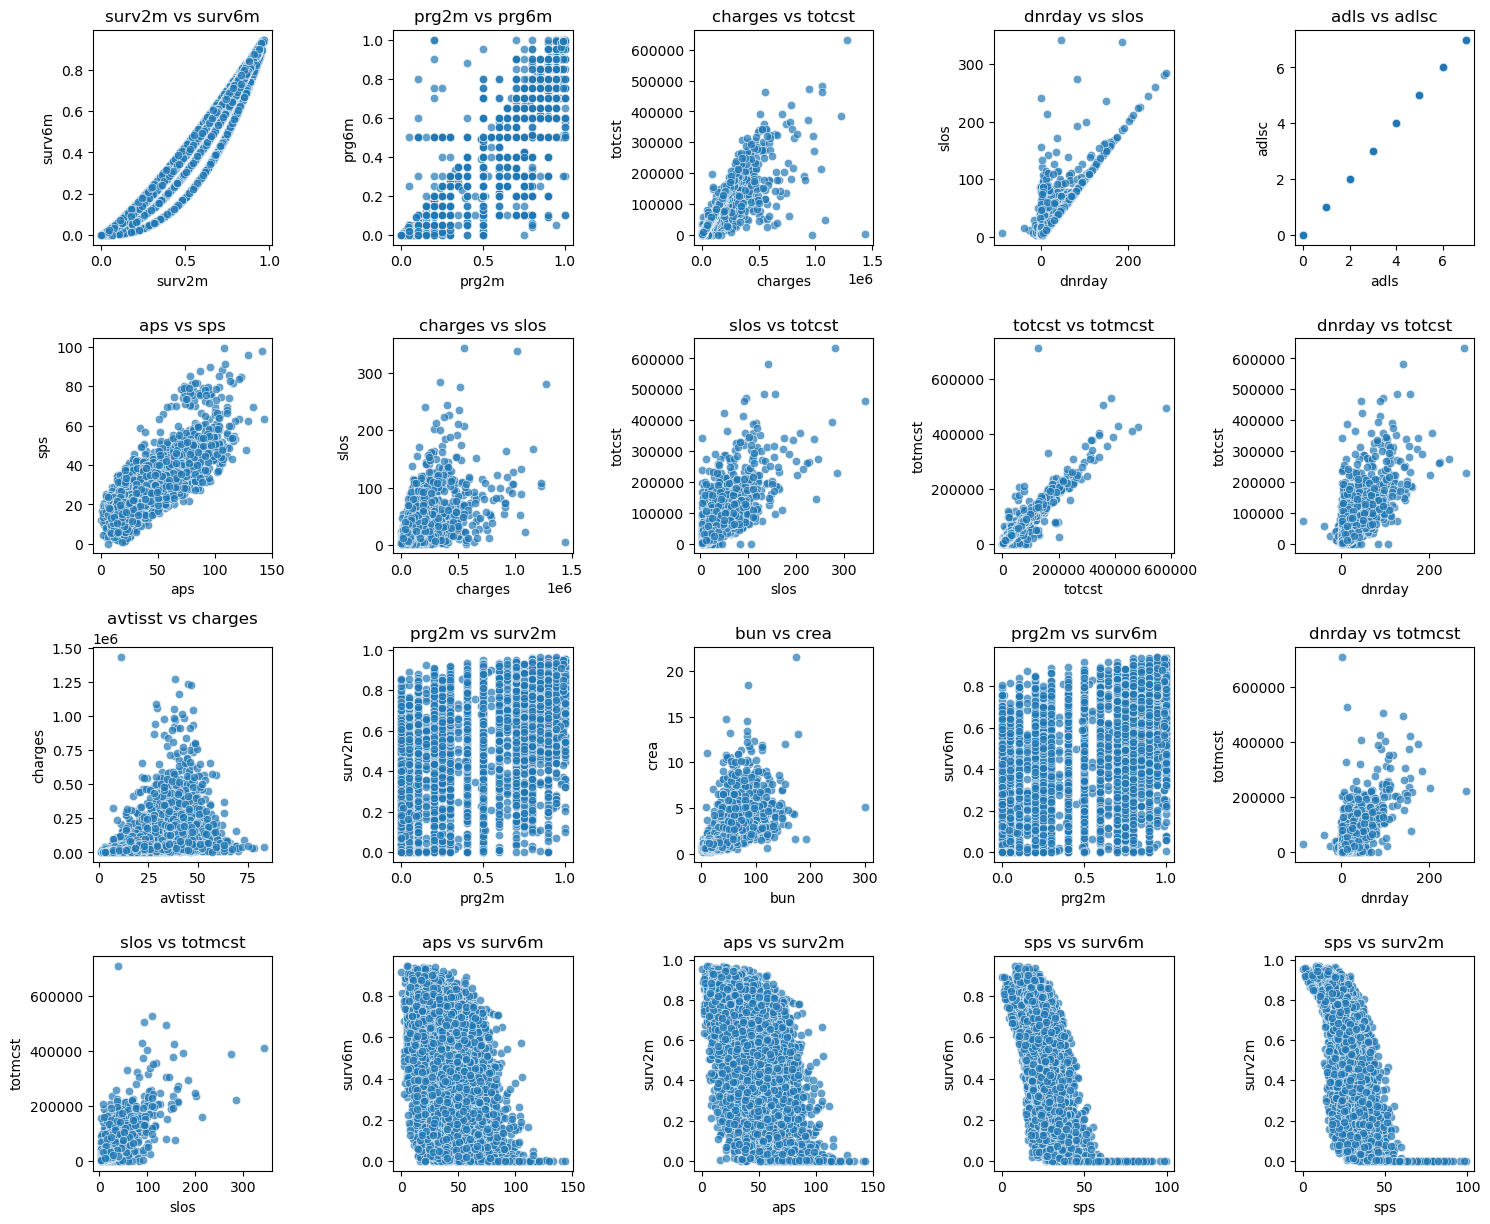

In [76]:
# List of variable pairs to plot based on the provided table
variable_pairs = [
    ('surv2m', 'surv6m'),
    ('prg2m', 'prg6m'),
    ('charges', 'totcst'),
    ('dnrday', 'slos'),
    ('adls', 'adlsc'),
    ('aps', 'sps'),
    ('charges', 'slos'),
    ('slos', 'totcst'),
    ('totcst', 'totmcst'),
    ('dnrday', 'totcst'),
    ('avtisst', 'charges'),
    ('prg2m', 'surv2m'),
    ('bun', 'crea'),
    ('prg2m', 'surv6m'),
    ('dnrday', 'totmcst'),
    ('slos', 'totmcst'),
    ('aps', 'surv6m'),
    ('aps', 'surv2m'),
    ('sps', 'surv6m'),
    ('sps', 'surv2m'),
]

# Create scatter plots for each variable pair
plt.figure(figsize=(15, 15))
for i, (var1, var2) in enumerate(variable_pairs[:20]):  # Limit to 16 pairs for clarity in a single figure
    plt.subplot(5, 5, i + 1)
    sns.scatterplot(data=data, x=var1, y=var2, alpha=0.7)
    plt.title(f"{var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()


#### **2.2 Group Comparisons**

We will use boxplots to compare some cost variables and estimated 6 months survival across sex, race, and dnr

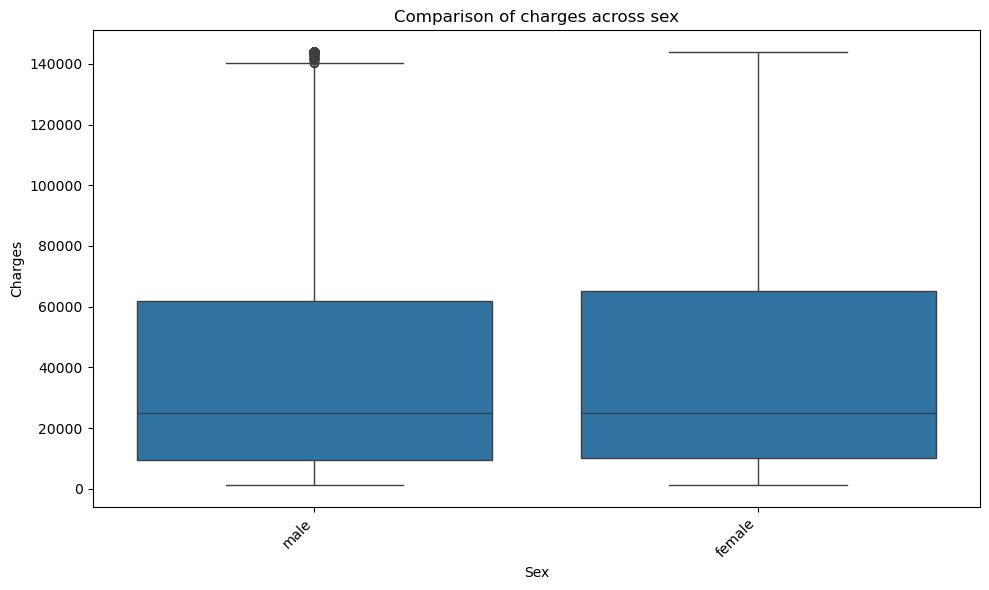

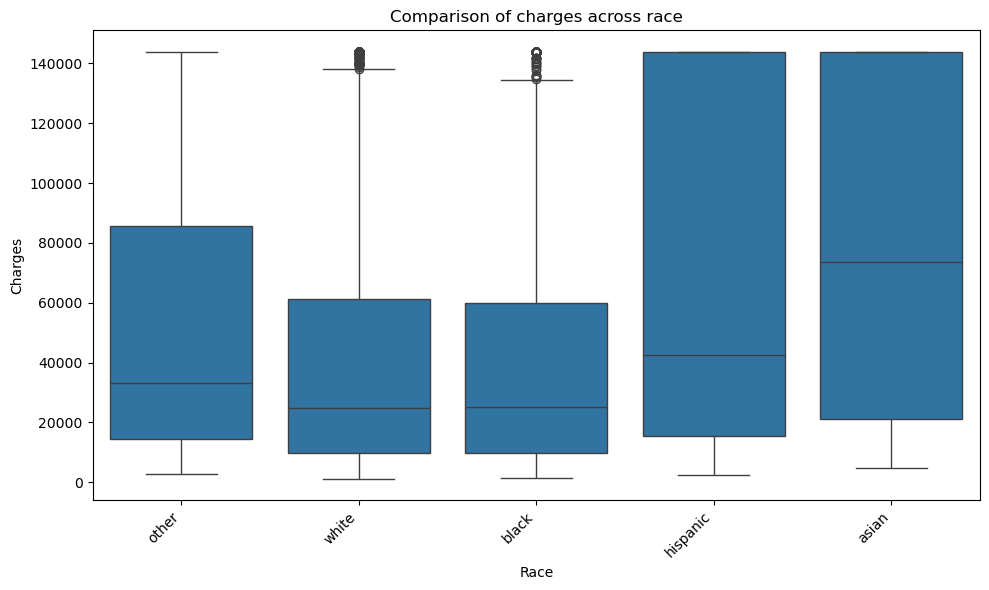

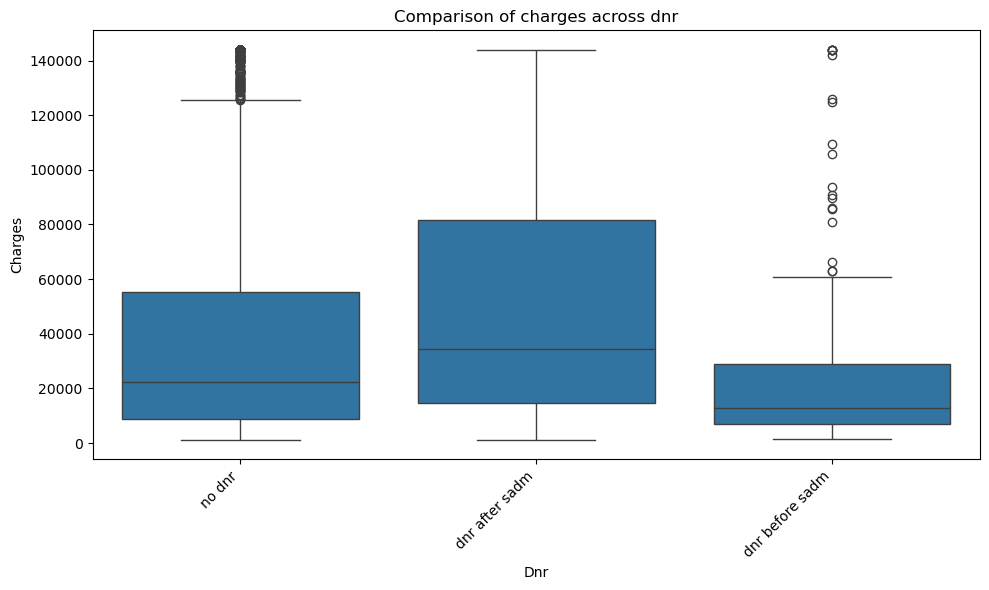

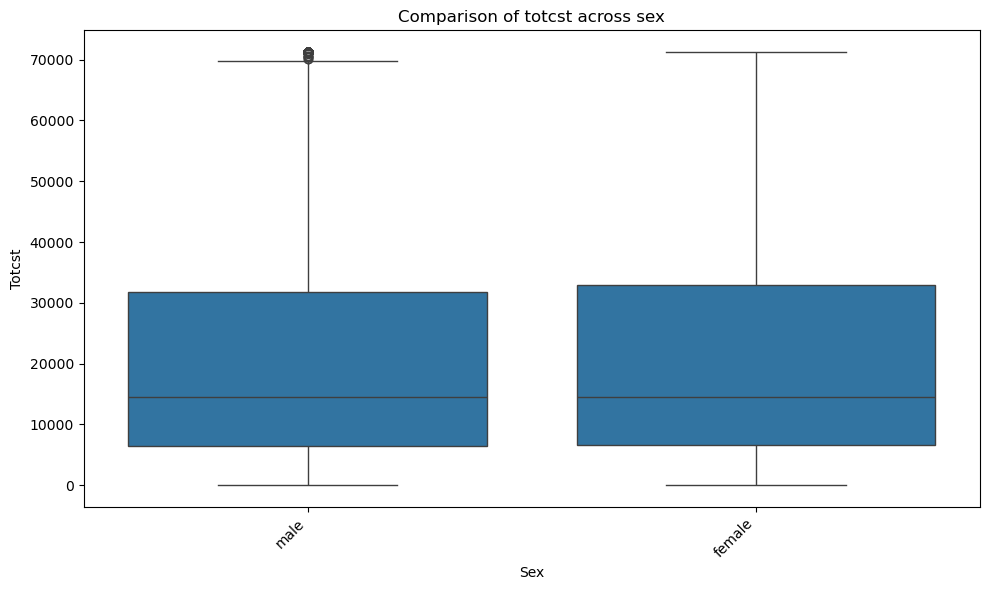

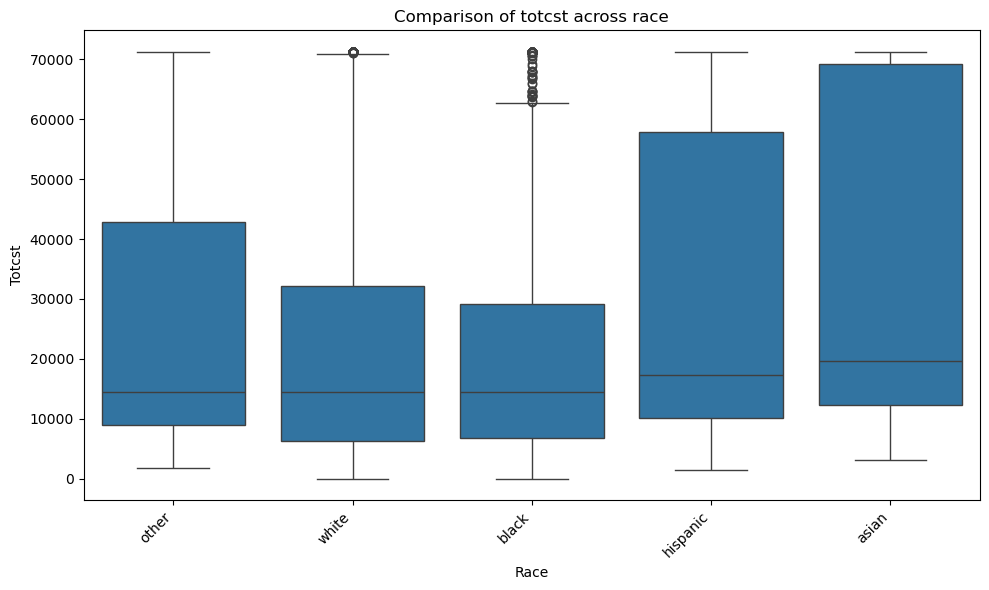

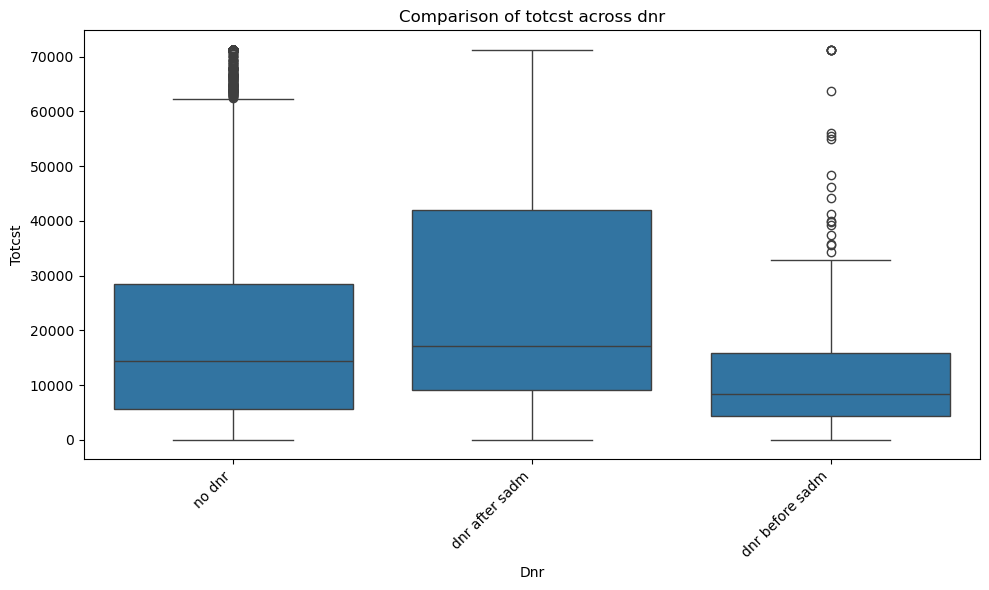

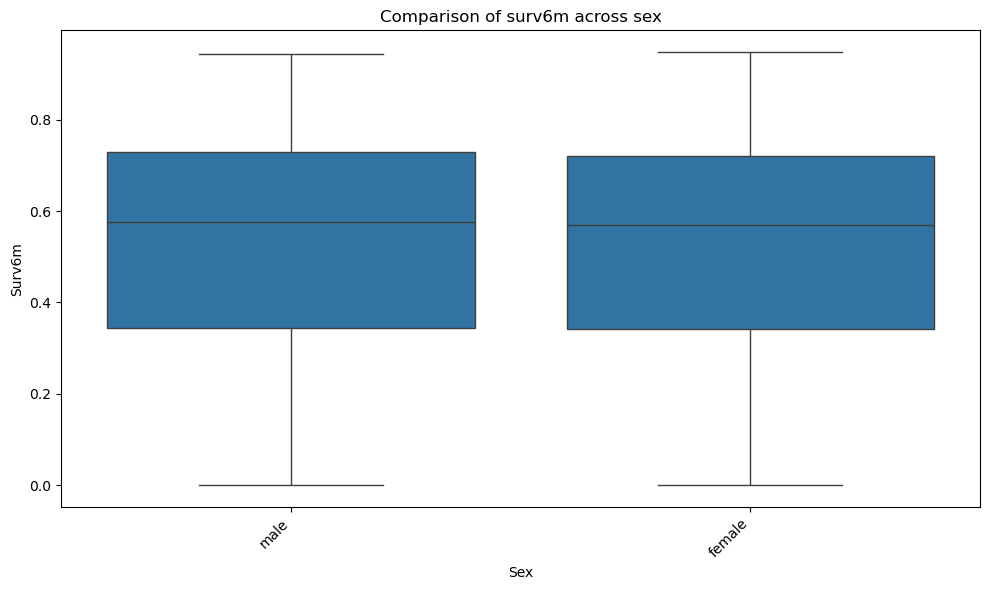

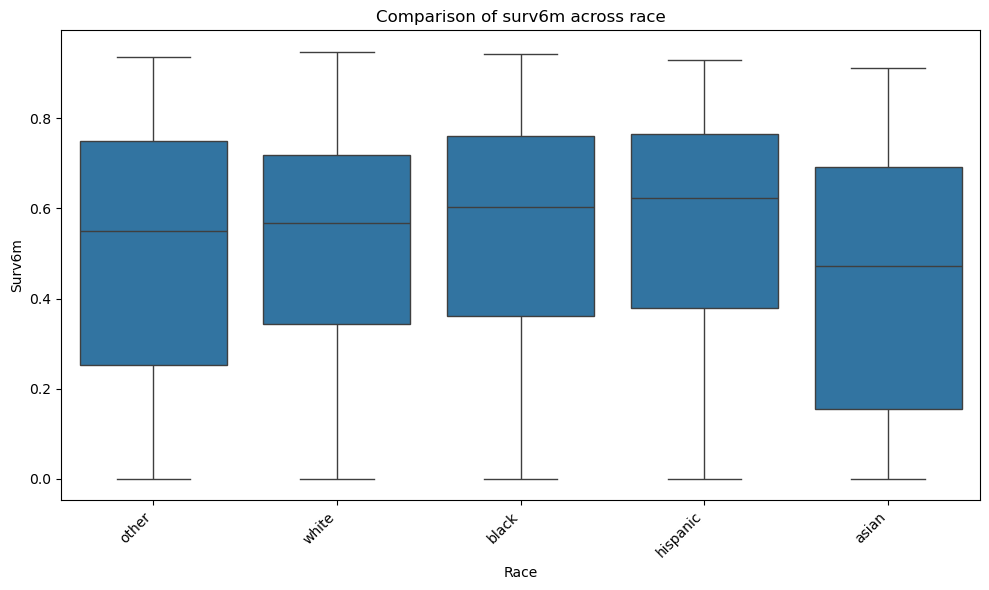

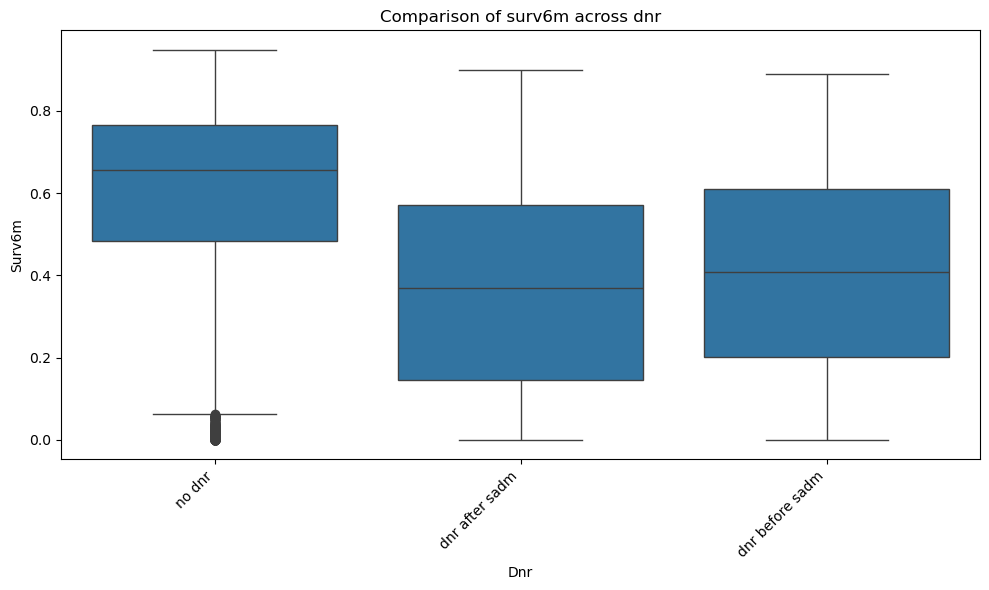

In [79]:
# Boxplots: Comparing charges, totcst, and surv6m across groups
# Variables for comparison
comparison_vars = ['charges', 'totcst', 'surv6m']
group_vars = ['sex', 'race', 'dnr']

for var in comparison_vars:
    for group in group_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=group, y=var)
        plt.title(f'Comparison of {var} across {group}')
        plt.xlabel(group.capitalize())
        plt.ylabel(var.capitalize())
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

### **3. Outcome Analysis**

#### **3.1 What is the Impact of comorbidities (num.co) on the SUPPORT model 6-month survival estimate (surv6m) and hospital death (hospdead)?**

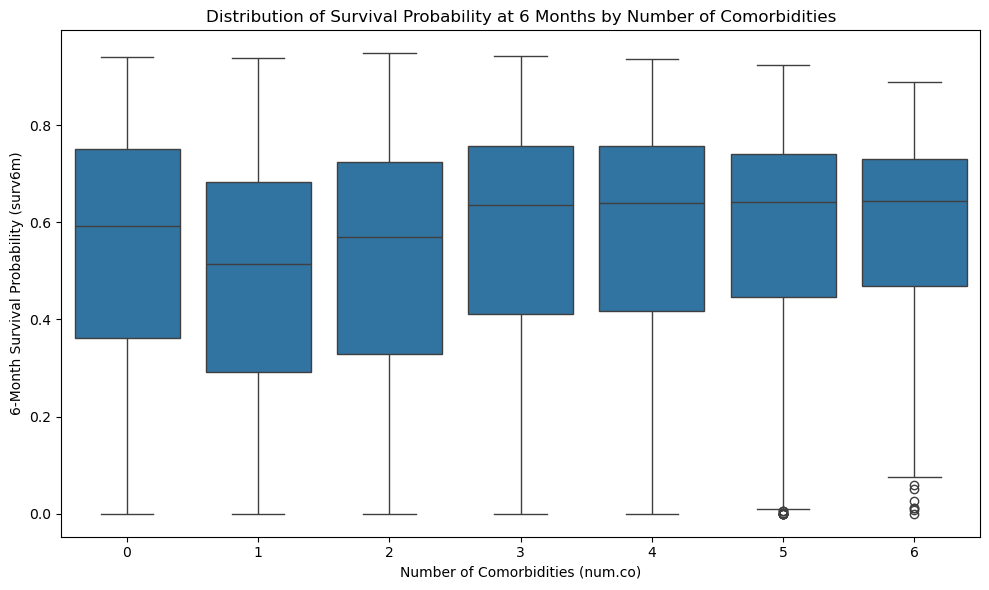

C:\Users\temgl\AppData\Local\Temp\ipykernel_21424\3816181323.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='num.co', y='hospdead', ci=None)


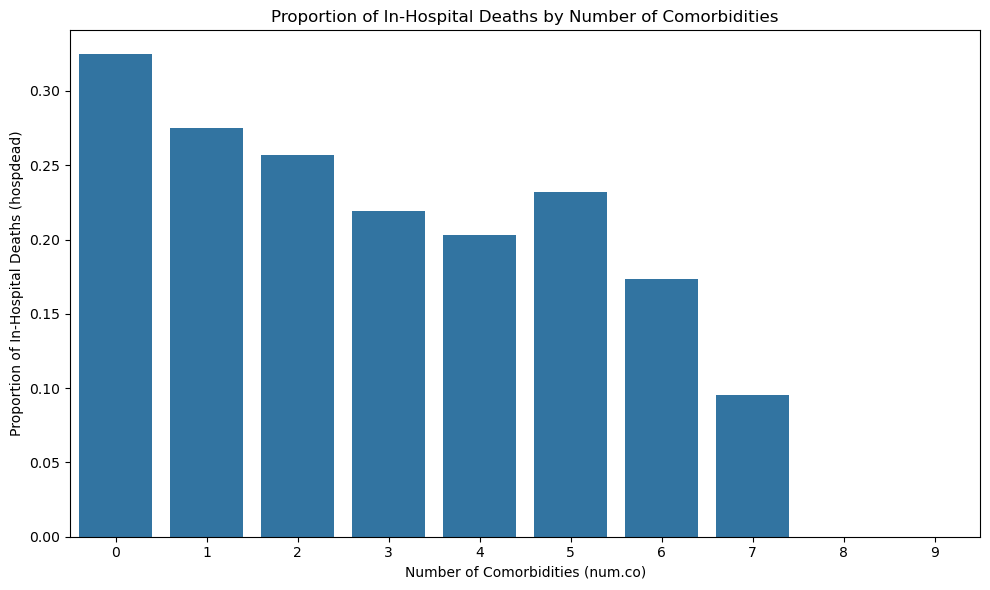

In [82]:
# Analyze the distribution of comorbidities (`num.co`) and their impact on `surv6m` and `hospdead`

# Boxplot: `num.co` vs. `surv6m`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num.co', y='surv6m')
plt.title('Distribution of Survival Probability at 6 Months by Number of Comorbidities')
plt.xlabel('Number of Comorbidities (num.co)')
plt.ylabel('6-Month Survival Probability (surv6m)')
plt.tight_layout()
plt.show()

# Barplot: `num.co` vs. `hospdead`
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='num.co', y='hospdead', ci=None)
plt.title('Proportion of In-Hospital Deaths by Number of Comorbidities')
plt.xlabel('Number of Comorbidities (num.co)')
plt.ylabel('Proportion of In-Hospital Deaths (hospdead)')
plt.tight_layout()
plt.show()

#### **3.2 Trends in physiological scores (`sps`, `aps`, `avtisst`) and their relationships to dnr**

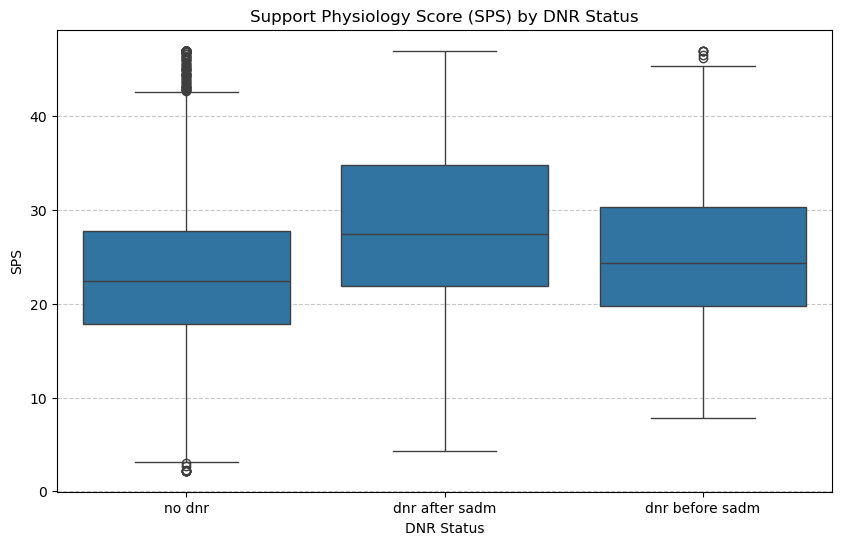

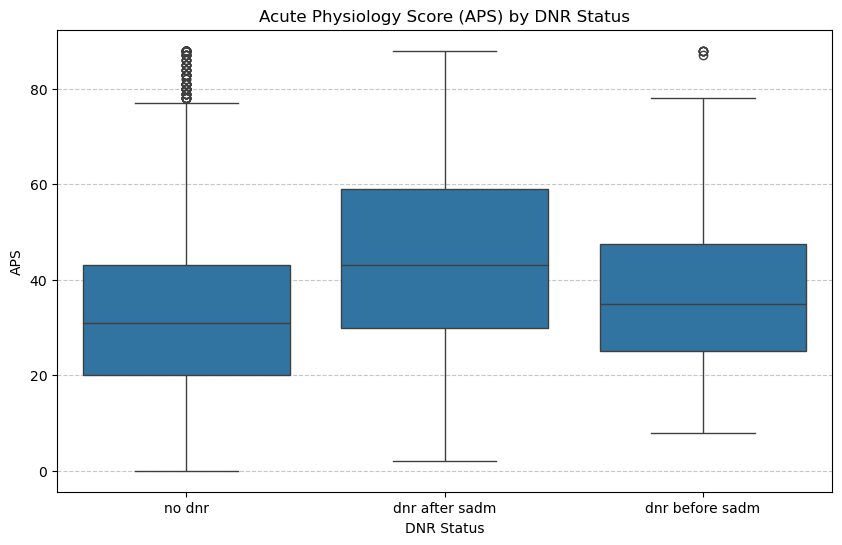

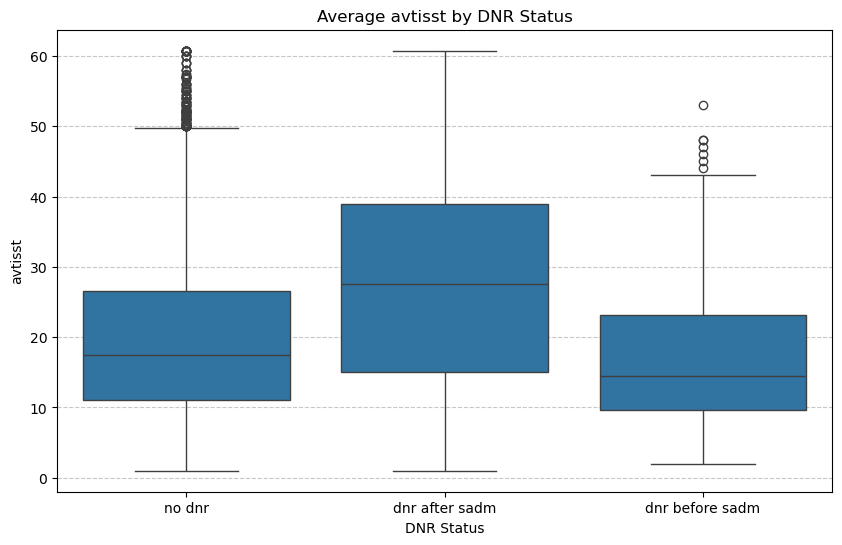

In [84]:
# Investigating trends in physiological scores (`sps`, `aps`, `avtisst`) and their relationships to `dnr`

# Boxplot: SPS by DNR Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='dnr', y='sps', data=df)
plt.title('Support Physiology Score (SPS) by DNR Status')
plt.xlabel('DNR Status')
plt.ylabel('SPS')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot: APS by DNR Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='dnr', y='aps', data=df)
plt.title('Acute Physiology Score (APS) by DNR Status')
plt.xlabel('DNR Status')
plt.ylabel('APS')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot: AvTISS by DNR Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='dnr', y='avtisst', data=df)
plt.title('Average avtisst by DNR Status')
plt.xlabel('DNR Status')
plt.ylabel('avtisst')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **3.3 Exploring relationships between demographic variables, `age` and `race`, and `dnr`**

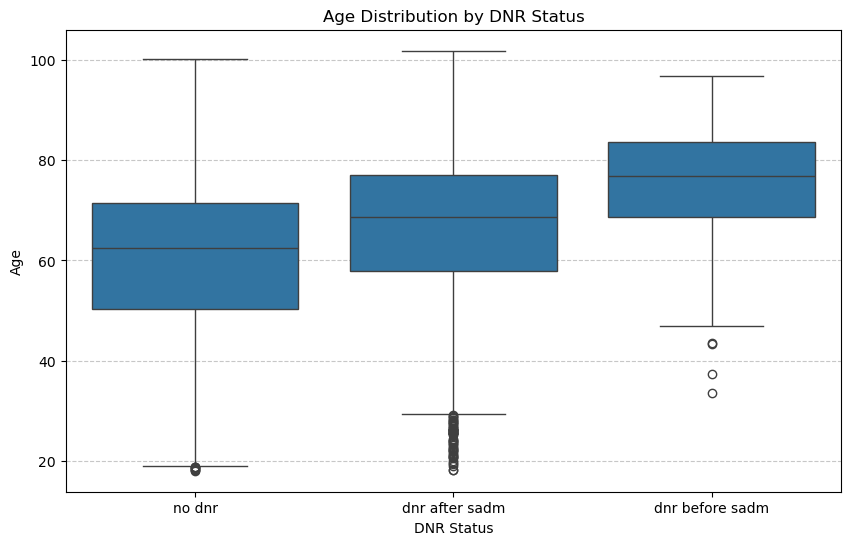

<Figure size 1000x600 with 0 Axes>

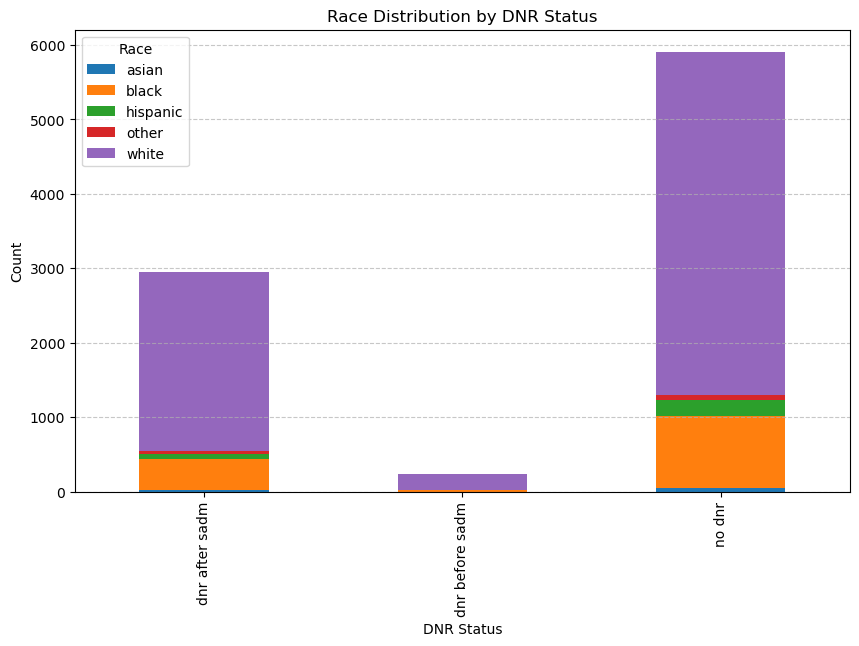

In [86]:
# Investigating trends in age and race and their relationships to DNR

# Boxplot: Age by DNR Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='dnr', y='age', data=df)
plt.title('Age Distribution by DNR Status')
plt.xlabel('DNR Status')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Plot: Race Distribution by DNR Status
plt.figure(figsize=(10, 6))
race_dnr_counts = df.groupby(['dnr', 'race']).size().unstack()
race_dnr_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Race Distribution by DNR Status')
plt.xlabel('DNR Status')
plt.ylabel('Count')
plt.legend(title='Race')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **4. Prevalence of Diagnosis**

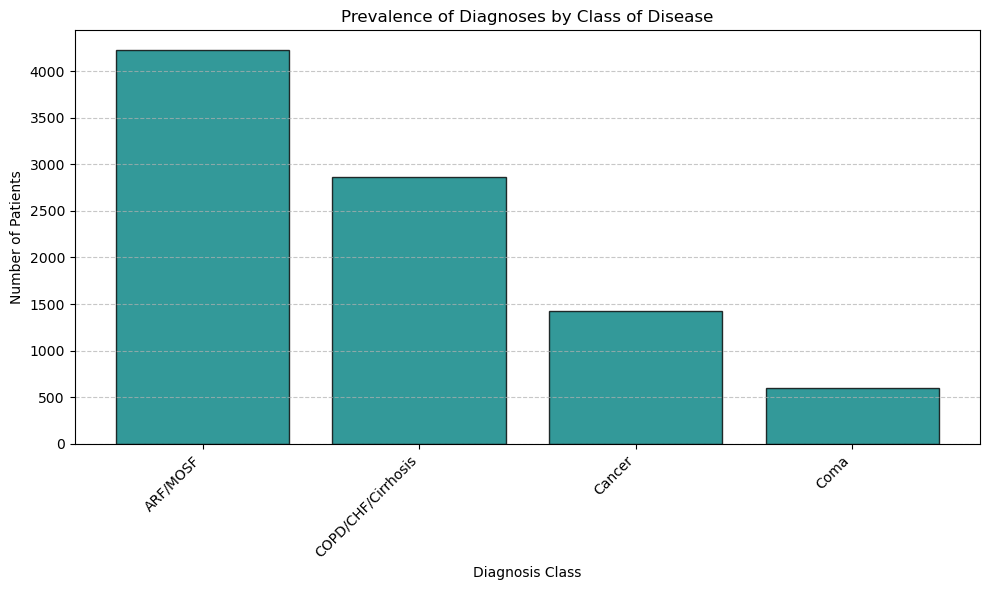

dzclass
ARF/MOSF              4227
COPD/CHF/Cirrhosis    2862
Cancer                1420
Coma                   596
Name: count, dtype: int64


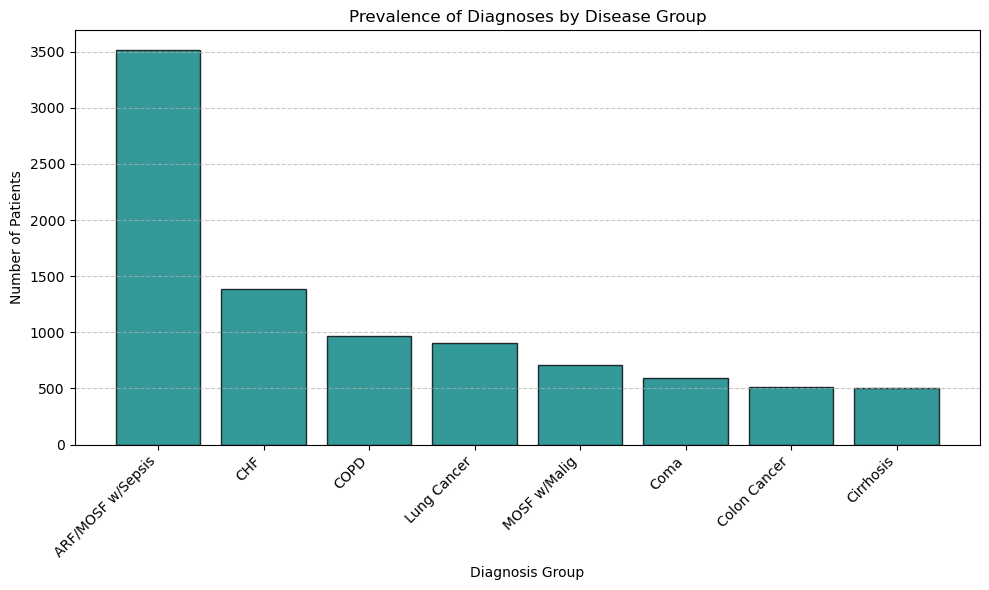

dzgroup
ARF/MOSF w/Sepsis    3515
CHF                  1387
COPD                  967
Lung Cancer           908
MOSF w/Malig          712
Coma                  596
Colon Cancer          512
Cirrhosis             508
Name: count, dtype: int64


In [88]:
# Prevalence of Diagnoses by dzclass (Disease Class)
diagnoses_prevalence_class = df['dzclass'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(diagnoses_prevalence_class.index, diagnoses_prevalence_class.values, color='teal', alpha=0.8, edgecolor='k')
plt.title("Prevalence of Diagnoses by Class of Disease")
plt.xlabel("Diagnosis Class")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(diagnoses_prevalence_class)

# Prevalence of Diagnoses by dzgroup (Disease group)
diagnoses_prevalence_group = df['dzgroup'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(diagnoses_prevalence_group.index, diagnoses_prevalence_group.values, color='teal', alpha=0.8, edgecolor='k')
plt.title("Prevalence of Diagnoses by Disease Group")
plt.xlabel("Diagnosis Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(diagnoses_prevalence_group)

## **5. Diagnosis by Sex, Age, and Income Distribution**

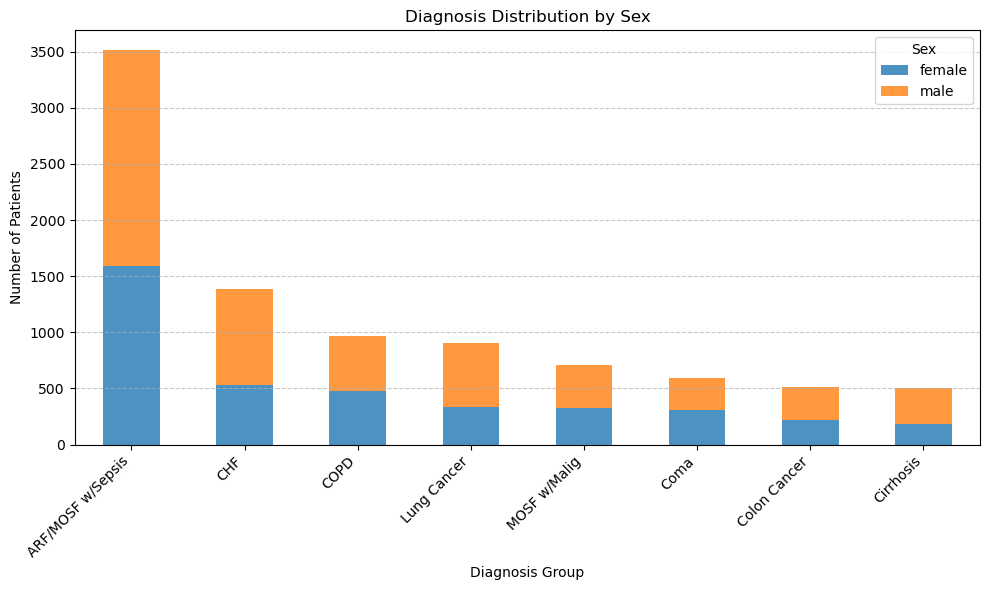

sex                female  male
dzgroup                        
ARF/MOSF w/Sepsis    1591  1924
CHF                   528   859
COPD                  476   491
Cirrhosis             184   324
Colon Cancer          223   289
Coma                  311   285
Lung Cancer           339   569
MOSF w/Malig          328   384


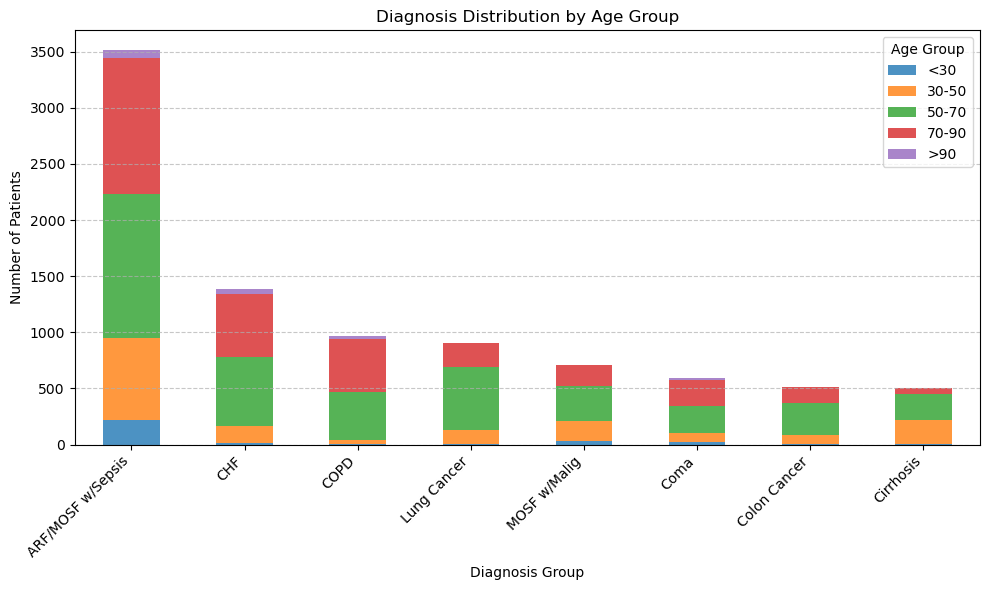

age_group            <30  30-50   50-70   70-90   >90
dzgroup                                              
ARF/MOSF w/Sepsis  218.0  732.0  1282.0  1214.0  69.0
CHF                 18.0  151.0   610.0   560.0  48.0
COPD                 2.0   42.0   428.0   473.0  22.0
Cirrhosis            7.0  210.0   237.0    54.0   NaN
Colon Cancer         7.0   74.0   293.0   136.0   2.0
Coma                21.0   81.0   239.0   238.0  17.0
Lung Cancer          1.0  125.0   563.0   216.0   3.0
MOSF w/Malig        34.0  173.0   312.0   191.0   2.0


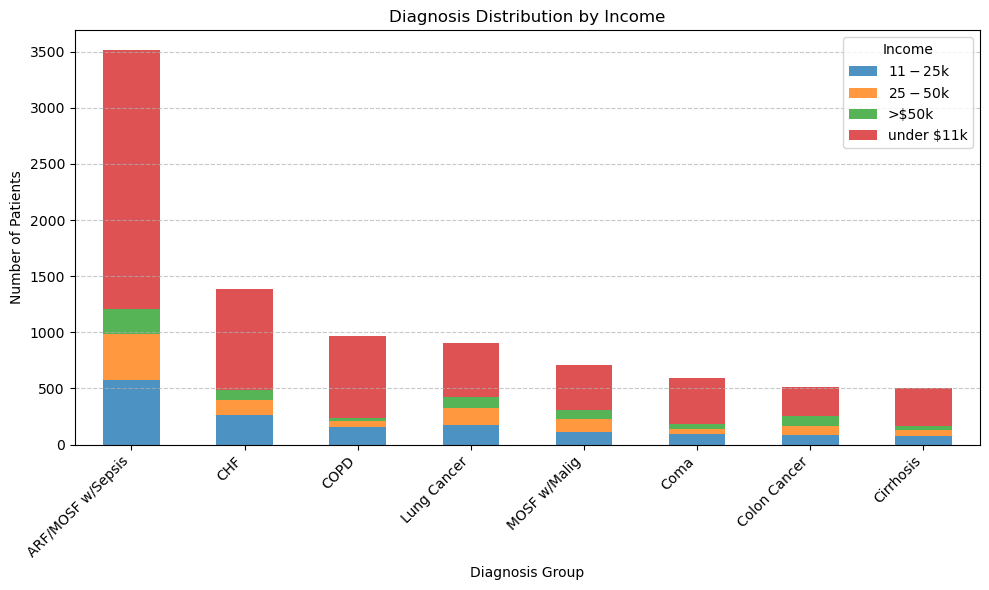

income             $11-$25k  $25-$50k  >$50k  under $11k
dzgroup                                                 
ARF/MOSF w/Sepsis       579       406    221        2309
CHF                     260       136     88         903
COPD                    155        57     29         726
Lung Cancer             171       151    101         485
MOSF w/Malig            113       117     74         408
Coma                     90        53     42         411
Colon Cancer             85        84     89         254
Cirrhosis                74        53     40         341

In [90]:

# DIAGNOSIS BY SEX DISTRIBUTION

# Group by diagnosis and sex to calculate counts
diagnoses_sex_distribution = df.groupby(['dzgroup', 'sex']).size().unstack()

# Sort the diagnoses by the total number of patients (descending order)
diagnoses_sex_distribution_sorted = diagnoses_sex_distribution.sum(axis=1).sort_values(ascending=False)

# Reorder the diagnoses_sex_distribution based on the sorted total patients
diagnoses_sex_distribution_sorted = diagnoses_sex_distribution.loc[diagnoses_sex_distribution_sorted.index]

# Plotting the sex distribution by diagnosis group
diagnoses_sex_distribution_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title("Diagnosis Distribution by Sex")
plt.xlabel("Diagnosis Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sex")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(diagnoses_sex_distribution)


# DIAGNOSIS BY AGE DISTRIBUTION 

# Create age groups for analysis (From the descriptive statistics, the max age is 101.84796 and min age is 18.04199)
age_bins = [0, 30, 50, 70, 90, 110]
age_labels = ['<30', '30-50', '50-70', '70-90', '>90']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group by diagnosis and age group to calculate counts
diagnoses_age_distribution = df.groupby(['dzgroup', 'age_group'], observed=True).size().unstack()

# Sort the diagnoses by the total number of patients (descending order)
diagnoses_age_distribution_sorted = diagnoses_age_distribution.sum(axis=1).sort_values(ascending=False)

# Reorder the diagnoses_age_distribution based on the sorted total patients
diagnoses_age_distribution_sorted = diagnoses_age_distribution.loc[diagnoses_age_distribution_sorted.index]

# Plotting the age distribution by diagnosis group
diagnoses_age_distribution_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title("Diagnosis Distribution by Age Group")
plt.xlabel("Diagnosis Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(diagnoses_age_distribution)


# DIANOSIS BY INCOME DISTRIBUTION

# Group by diagnosis and income to calculate counts
diagnoses_income_distribution = df.groupby(['dzgroup', 'income']).size().unstack()

# Sort the diagnoses by the total number of patients (descending order)
diagnoses_income_distribution_sorted = diagnoses_income_distribution.sum(axis=1).sort_values(ascending=False)

# Reorder the diagnoses_income_distribution based on the sorted total patients
diagnoses_income_distribution_sorted = diagnoses_income_distribution.loc[diagnoses_income_distribution_sorted.index]

# Plotting the diagnosis distribution by income group
diagnoses_income_distribution_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title("Diagnosis Distribution by Income")
plt.xlabel("Diagnosis Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Display the distribution table
diagnoses_income_distribution_sorted


### **6. Mortality Rate by Diagnosis Group**

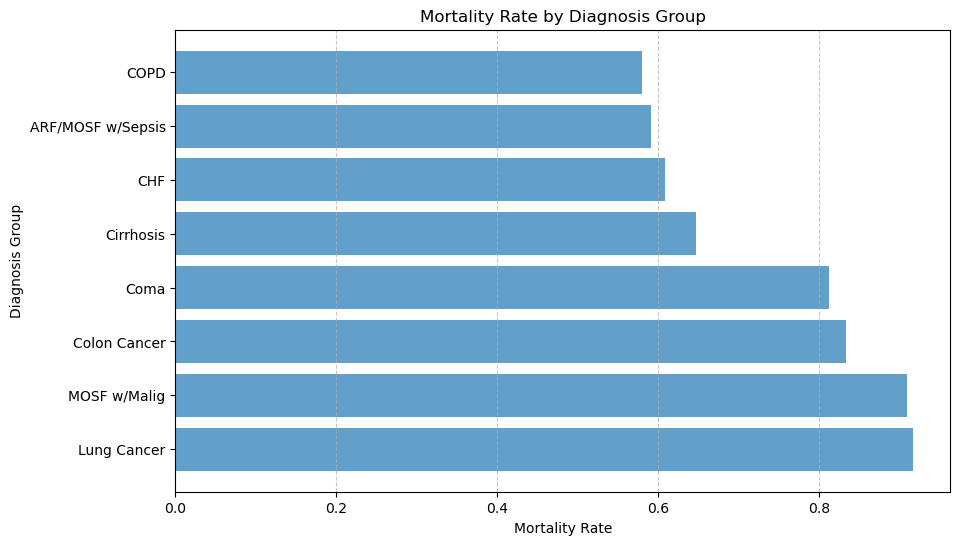

dzgroup  total_patients  deaths  mortality_rate
6        Lung Cancer             908     833        0.917401
7       MOSF w/Malig             712     647        0.908708
4       Colon Cancer             512     427        0.833984
5               Coma             596     484        0.812081
3          Cirrhosis             508     329        0.647638
1                CHF            1387     844        0.608508
0  ARF/MOSF w/Sepsis            3515    2076        0.590612
2               COPD             967     561        0.580145

In [92]:
# Group data by diagnosis group and calculate outcome statistics
outcomes_by_diagnosis = df.groupby('dzgroup').agg(
    total_patients=('ID', 'count'),
    deaths=('death', 'sum'),
    mortality_rate=('death', 'mean')
).reset_index()

# Sort by mortality rate for better analysis
outcomes_by_diagnosis = outcomes_by_diagnosis.sort_values(by='mortality_rate', ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.barh(outcomes_by_diagnosis['dzgroup'], outcomes_by_diagnosis['mortality_rate'], alpha=0.7)
plt.xlabel("Mortality Rate")
plt.ylabel("Diagnosis Group")
plt.title("Mortality Rate by Diagnosis Group")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

outcomes_by_diagnosis

### **7. Mortality Rate by Age Group and Sex**

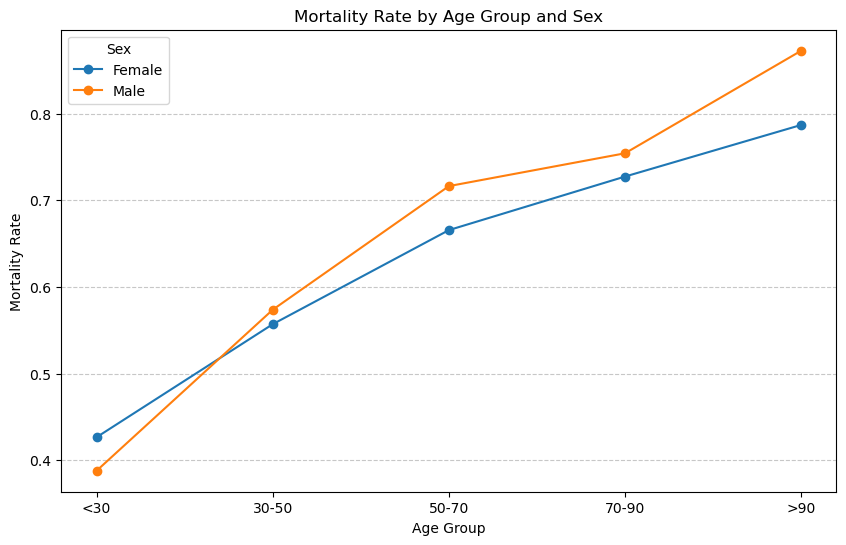

sex age_group  total_patients  deaths  mortality_rate
0  female       <30             143      61        0.426573
1  female     30-50             666     371        0.557057
2  female     50-70            1654    1101        0.665659
3  female     70-90            1409    1025        0.727466
4  female       >90             108      85        0.787037
5    male       <30             165      64        0.387879
6    male     30-50             922     529        0.573753
7    male     50-70            2310    1655        0.716450
8    male     70-90            1673    1262        0.754334
9    male       >90              55      48        0.872727

In [94]:
# Already created age_group under diagnosis by age distribution
# Calculate outcome statistics by sex and age group
outcomes_by_sex_age = df.groupby(['sex', 'age_group'], observed=True).agg(
    total_patients=('ID', 'count'),
    deaths=('death', 'sum'),
    mortality_rate=('death', 'mean')
).reset_index()

# Visualize mortality rates by sex and age group
plt.figure(figsize=(10, 6))
for sex in outcomes_by_sex_age['sex'].unique():
    subset = outcomes_by_sex_age[outcomes_by_sex_age['sex'] == sex]
    plt.plot(subset['age_group'], subset['mortality_rate'], marker='o', label=sex.capitalize())

plt.xlabel("Age Group")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate by Age Group and Sex")
plt.legend(title="Sex")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

outcomes_by_sex_age


### **8. Mortality Rate by Race**

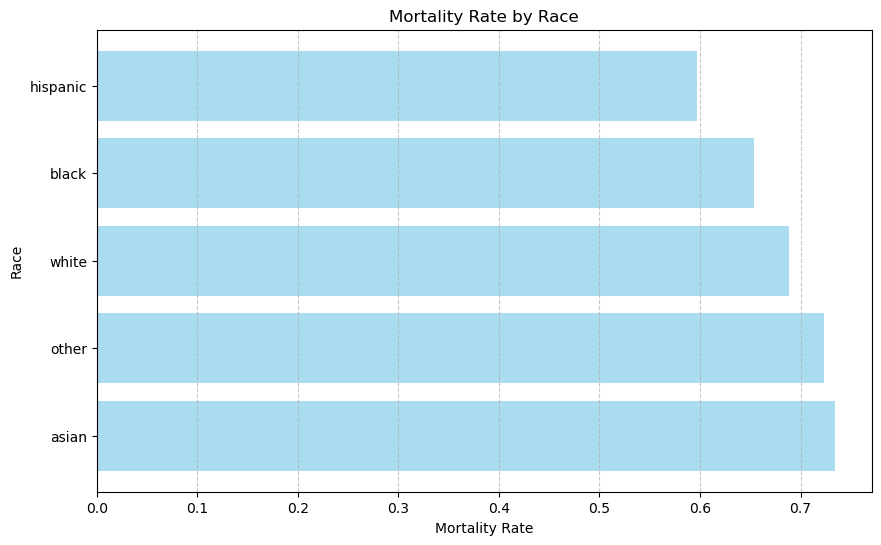

race  total_patients  deaths  mortality_rate
0     asian              79      58        0.734177
3     other             112      81        0.723214
4     white            7233    4980        0.688511
1     black            1391     909        0.653487
2  hispanic             290     173        0.596552

In [96]:
# Group data by race and calculate outcome statistics
outcomes_by_race = df.groupby('race').agg(
    total_patients=('ID', 'count'),
    deaths=('death', 'sum'),
    mortality_rate=('death', 'mean')
).reset_index()

# Sort by mortality rate for better analysis
outcomes_by_race = outcomes_by_race.sort_values(by='mortality_rate', ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.barh(outcomes_by_race['race'], outcomes_by_race['mortality_rate'], alpha=0.7, color='skyblue')
plt.xlabel("Mortality Rate")
plt.ylabel("Race")
plt.title("Mortality Rate by Race")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

outcomes_by_race

### **9. Mortality Rate by Income Group and Diagnosis**

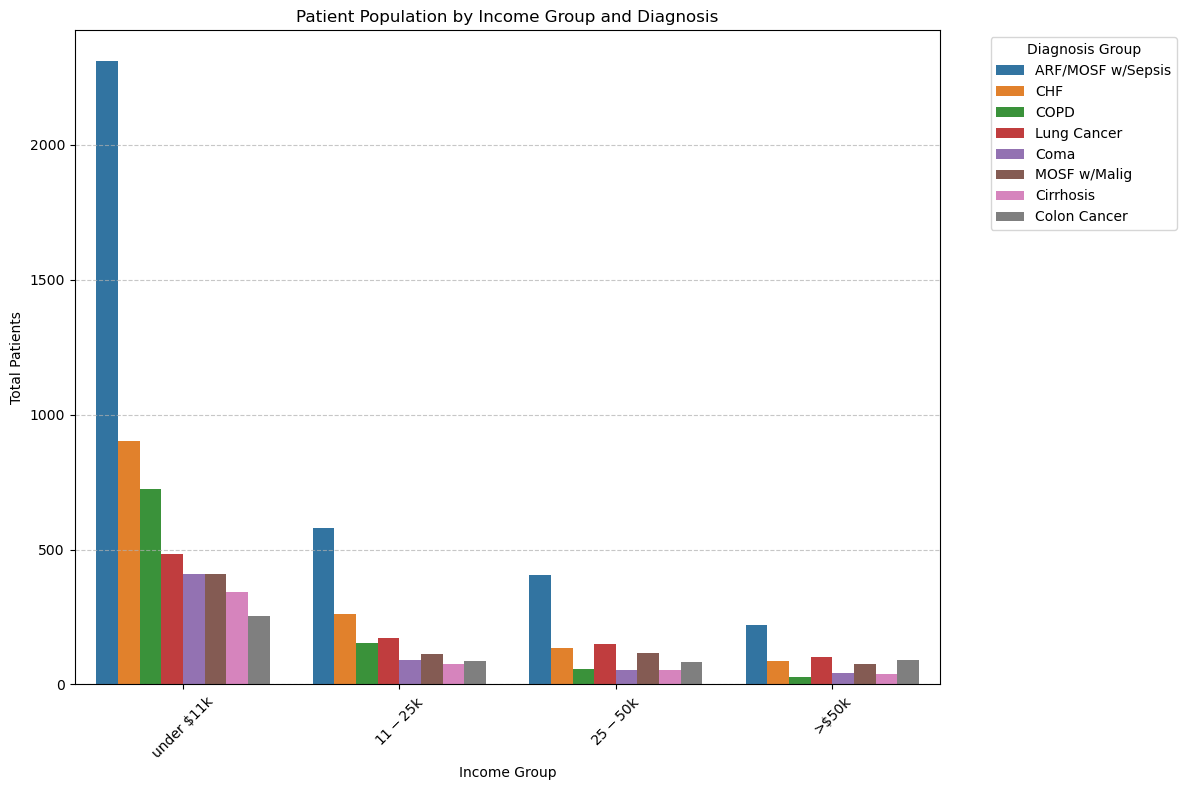

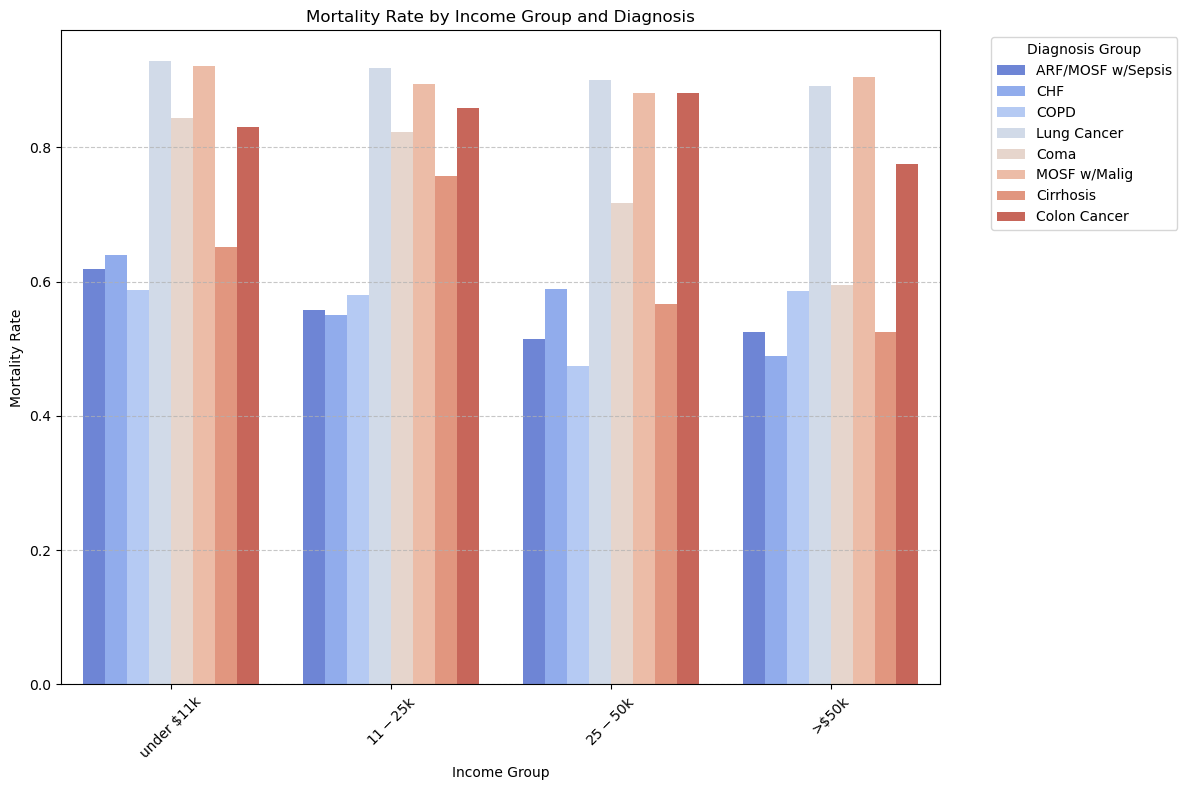

income            dzgroup  total_patients  deaths  mortality_rate
0   under $11k  ARF/MOSF w/Sepsis            2309    1428        0.618450
1   under $11k                CHF             903     578        0.640089
2   under $11k               COPD             726     427        0.588154
3   under $11k          Cirrhosis             341     222        0.651026
4   under $11k       Colon Cancer             254     211        0.830709
5   under $11k               Coma             411     347        0.844282
6   under $11k        Lung Cancer             485     450        0.927835
7   under $11k       MOSF w/Malig             408     376        0.921569
8     $11-$25k  ARF/MOSF w/Sepsis             579     323        0.557858
9     $11-$25k                CHF             260     143        0.550000
10    $11-$25k               COPD             155      90        0.580645
11    $11-$25k          Cirrhosis              74      56        0.756757
12    $11-$25k       Colon Cancer              85      73        0.858824
13    $11-$25k               Coma              90      74        0.822222
14    $11-$25k        Lung Cancer             171     157        0.918129
15    $11-$25k       MOSF w/Malig             113     101        0.893805
16    $25-$50k  ARF/MOSF w/Sepsis             406     209        0.514778
17    $25-$50k                CHF             136      80        0.588235
18    $25-$50k               COPD              57      27        0.473684
19    $25-$50k          Cirrhosis              53      30        0.566038
20    $25-$50k       Colon Cancer              84      74        0.880952
21    $25-$50k               Coma              53      38        0.716981
22    $25-$50k        Lung Cancer             151     136        0.900662
23    $25-$50k       MOSF w/Malig             117     103        0.880342
24       >$50k  ARF/MOSF w/Sepsis             221     116        0.524887
25       >$50k                CHF              88      43        0.488636
26       >$50k               COPD              29      17        0.586207
27       >$50k          Cirrhosis              40      21        0.525000
28       >$50k       Colon Cancer              89      69        0.775281
29       >$50k               Coma              42      25        0.595238
30       >$50k        Lung Cancer             101      90        0.891089
31       >$50k       MOSF w/Malig              74      67        0.905405

In [98]:
# Group by income and diagnosis (dzgroup) to analyze patient population for each case
income_diagnosis_population = df.groupby(['income', 'dzgroup'], observed=True).agg(
    total_patients=('ID', 'count'),
    deaths=('death', 'sum'),
    mortality_rate=('death', 'mean')
).reset_index()

# Ensure that income categories are sorted from the min to the max ("under $11k" to ">$50k")
income_order = ['under $11k', '$11-$25k', '$25-$50k', '>$50k']

# Reorder the income column
income_diagnosis_population['income'] = pd.Categorical(
    income_diagnosis_population['income'], 
    categories=income_order, 
    ordered=True
)

# Sort by income (from smallest to largest) and by total patients in descending order
income_diagnosis_population = income_diagnosis_population.sort_values(
    by=['income', 'total_patients'], ascending=[True, False]
)

# Set up the plotting area for patient population by income and diagnosis
plt.figure(figsize=(12, 8))
sns.barplot(
    data=income_diagnosis_population,
    x='income',
    y='total_patients',
    hue='dzgroup',
    palette='tab10'
)

plt.title("Patient Population by Income Group and Diagnosis")
plt.xlabel("Income Group")
plt.ylabel("Total Patients")
plt.xticks(rotation=45)
plt.legend(title="Diagnosis Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot mortality rate for each diagnosis within income groups
plt.figure(figsize=(12, 8))
sns.barplot(
    data=income_diagnosis_population,
    x='income',
    y='mortality_rate',
    hue='dzgroup',
    palette='coolwarm'
)

plt.title("Mortality Rate by Income Group and Diagnosis")
plt.xlabel("Income Group")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=45)
plt.legend(title="Diagnosis Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by income and diagnosis to get the statistics
income_diagnosis_stats = income_diagnosis_population.groupby(['income', 'dzgroup'], observed=True).agg(
    total_patients=('total_patients', 'sum'),
    deaths=('deaths', 'sum'),
    mortality_rate=('mortality_rate', 'mean')
).reset_index()

# Display the statistics table
income_diagnosis_stats

### **10. Correlation of ADLS, SLOS, APS, and SPS with Mortality**

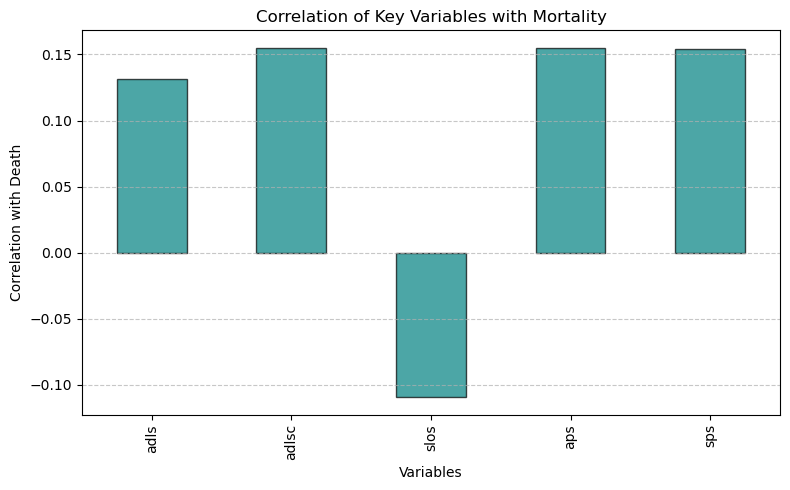

avg_adls  avg_adlsc   avg_slos    avg_aps    avg_sps  \
dzgroup                                                                   
Colon Cancer       0.791016   1.293816   9.908203  19.431641  18.974916   
Coma               0.922819   2.043389  15.062081  39.092282  25.532731   
CHF                0.970079   1.664700  10.373468  30.144917  21.126512   
ARF/MOSF w/Sepsis  0.970839   1.990262  20.413087  45.501849  28.604139   
Lung Cancer        0.991740   1.816751   8.444934  19.838106  19.387275   
Cirrhosis          1.019685   1.895485  13.114173  38.592520  25.610209   
MOSF w/Malig       1.021770   2.008427  15.735955  52.234551  32.162005   
COPD               1.087901   2.032261  12.295760  31.300931  21.692941   

                   mortality_rate  
dzgroup                            
Colon Cancer             0.833984  
Coma                     0.812081  
CHF                      0.608508  
ARF/MOSF w/Sepsis        0.590612  
Lung Cancer              0.917401  
Cirrhosis                0.647638  
MOSF w/Malig             0.908708  
COPD                     0.580145

In [100]:
# Correlation of ADLS, SLOS, APS, and SPS with outcomes (death)
key_predictors = ['adls', 'adlsc', 'slos', 'aps', 'sps']
correlation_with_death = df[key_predictors + ['death']].corr()['death'].drop('death')

# Analyze diagnoses or treatments associated with severe functional decline
functional_decline_by_diagnosis = df.groupby('dzgroup').agg(
    avg_adls=('adls', 'mean'),
    avg_adlsc=('adlsc', 'mean'),
    avg_slos=('slos', 'mean'),
    avg_aps=('aps', 'mean'),
    avg_sps=('sps', 'mean'),
    mortality_rate=('death', 'mean')
).sort_values(by='avg_adls', ascending=True)  # Focus on low ADLS

# Visualize correlations with mortality
plt.figure(figsize=(8, 5))
correlation_with_death.plot(kind='bar', color='teal', alpha=0.7, edgecolor='k')
plt.title("Correlation of Key Variables with Mortality")
plt.xlabel("Variables")
plt.ylabel("Correlation with Death")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display summary of functional decline by diagnosis
functional_decline_by_diagnosis


### **11. Effect of Disease Group and Age on Length of Hospital Stay**

C:\Users\temgl\AppData\Local\Temp\ipykernel_21424\1027132812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


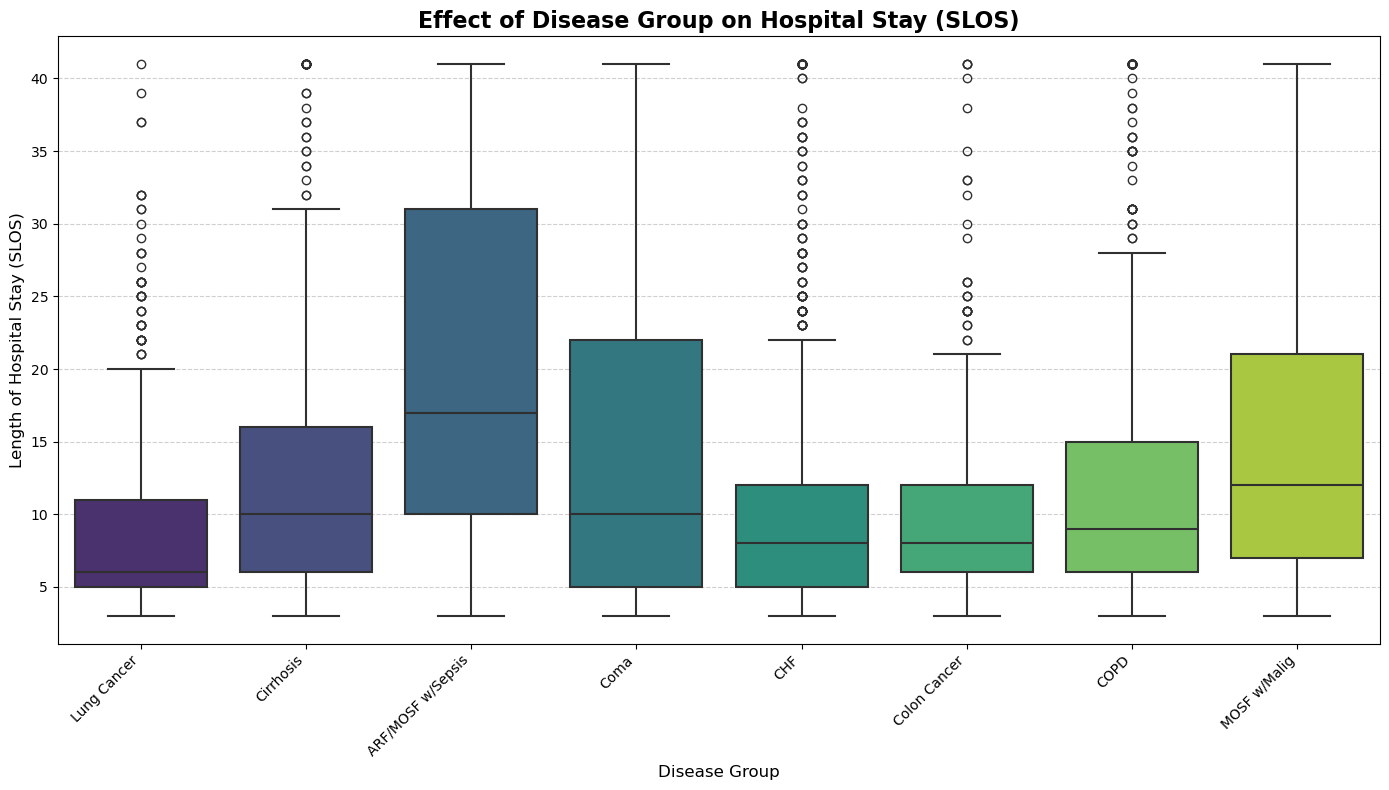


Summary Statistics for Disease Group and Hospital Stay:
╒════╤═══════════════════╤══════════╤═══════════════╤═══════════════╕
│    │ dzgroup           │   median │   lower_bound │   upper_bound │
╞════╪═══════════════════╪══════════╪═══════════════╪═══════════════╡
│  0 │ ARF/MOSF w/Sepsis │       17 │            10 │            31 │
├────┼───────────────────┼──────────┼───────────────┼───────────────┤
│  1 │ CHF               │        8 │             5 │            12 │
├────┼───────────────────┼──────────┼───────────────┼───────────────┤
│  2 │ COPD              │        9 │             6 │            15 │
├────┼───────────────────┼──────────┼───────────────┼───────────────┤
│  3 │ Cirrhosis         │       10 │             6 │            16 │
├────┼───────────────────┼──────────┼───────────────┼───────────────┤
│  4 │ Colon Cancer      │        8 │             6 │            12 │
├────┼───────────────────┼──────────┼───────────────┼───────────────┤
│  5 │ Coma              │       

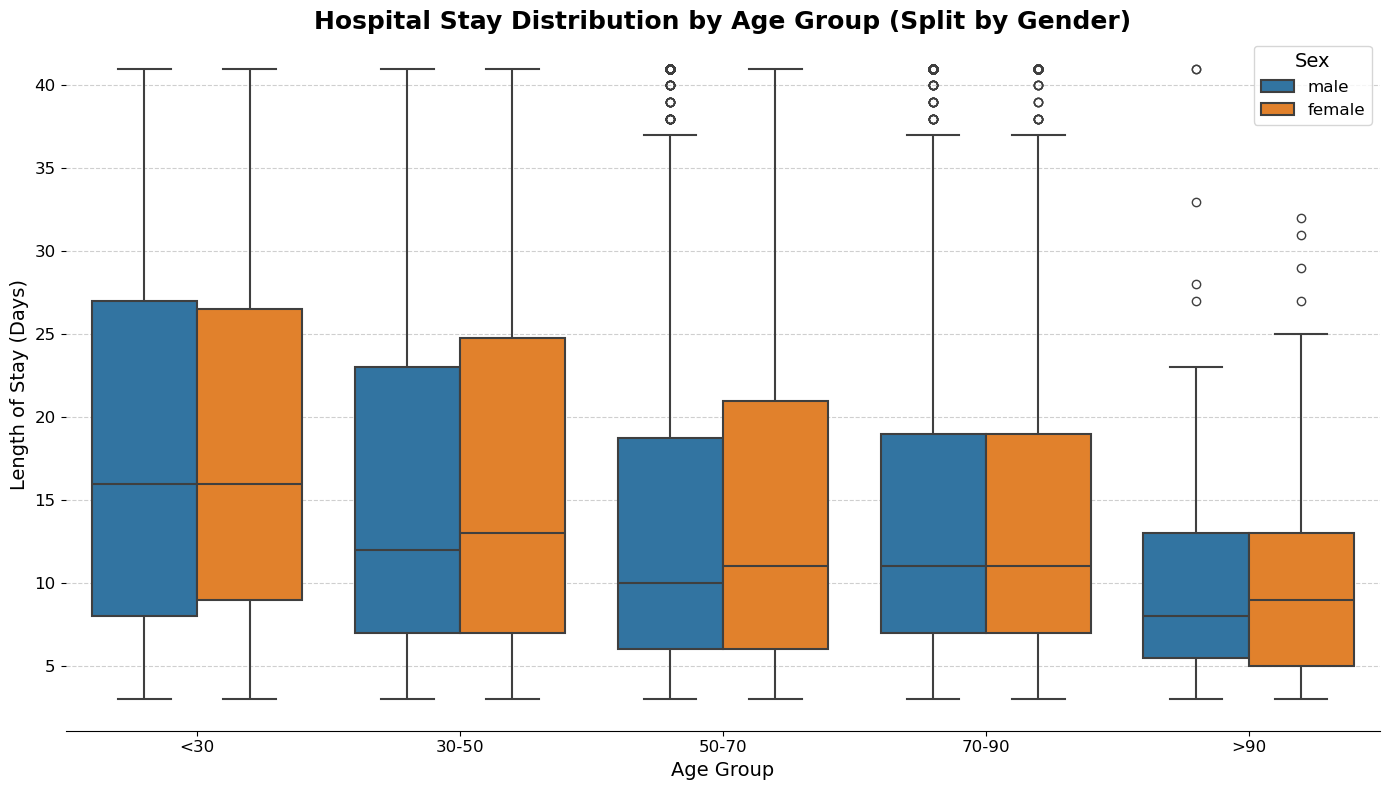


Length of Stay (Lower Bound and Upper Bound) for Females and Males by Age Group:
╒════╤═════════════╤═════════════════════════╤═══════════════════════╤═════════════════════════╤═══════════════════════╕
│    │ age_group   │   Females (Lower Bound) │   Males (Lower Bound) │   Females (Upper Bound) │   Males (Upper Bound) │
╞════╪═════════════╪═════════════════════════╪═══════════════════════╪═════════════════════════╪═══════════════════════╡
│  0 │ <30         │                       9 │                   8   │                   26.5  │                 27    │
├────┼─────────────┼─────────────────────────┼───────────────────────┼─────────────────────────┼───────────────────────┤
│  1 │ 30-50       │                       7 │                   7   │                   24.75 │                 23    │
├────┼─────────────┼─────────────────────────┼───────────────────────┼─────────────────────────┼───────────────────────┤
│  2 │ 50-70       │                       6 │                   6   │ 

In [102]:
# Effect of Disease Group on Hospital Stay (SLOS)

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='dzgroup', 
    y='slos', 
    data=df, 
    palette='viridis', 
    linewidth=1.5   
)

plt.title('Effect of Disease Group on Hospital Stay (SLOS)', fontsize=16, weight='bold')
plt.xlabel('Disease Group', fontsize=12)
plt.ylabel('Length of Hospital Stay (SLOS)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Summary Statistics for Disease Group
disease_group_summary = df.groupby('dzgroup')['slos'].agg(
    median='median',
    lower_bound=lambda x: x.quantile(0.25),
    upper_bound=lambda x: x.quantile(0.75)
).reset_index()

print("\nSummary Statistics for Disease Group and Hospital Stay:")
print(tabulate(disease_group_summary, headers="keys", tablefmt="fancy_grid"))

# Hospital Stay by Age Group Split by Gender
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df, 
    x='age_group', 
    y='slos', 
    hue='sex', 
    palette='tab10', 
    linewidth=1.5        
)
sns.despine(left=True)
plt.title("Hospital Stay Distribution by Age Group (Split by Gender)", fontsize=18, weight='bold')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Length of Stay (Days)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sex', fontsize=12, title_fontsize=14, loc='upper right', frameon=True, fancybox=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Summary Statistics for Age Group
gender_stay_summary = df.groupby(['age_group', 'sex'], observed=True)['slos'].agg(
    lower_bound=lambda x: x.quantile(0.25),
    upper_bound=lambda x: x.quantile(0.75)
).unstack()

# Flatten the MultiIndex columns for clarity
gender_stay_summary.columns = ['Females (Lower Bound)', 'Males (Lower Bound)',
                                'Females (Upper Bound)', 'Males (Upper Bound)']

# Reset index for tabular display
gender_stay_summary = gender_stay_summary.reset_index()

# Display the summary table using tabulate
print("\nLength of Stay (Lower Bound and Upper Bound) for Females and Males by Age Group:")
print(tabulate(gender_stay_summary, headers="keys", tablefmt="fancy_grid"))


### **12. The Average Survival Probability by Disease Class/Group**

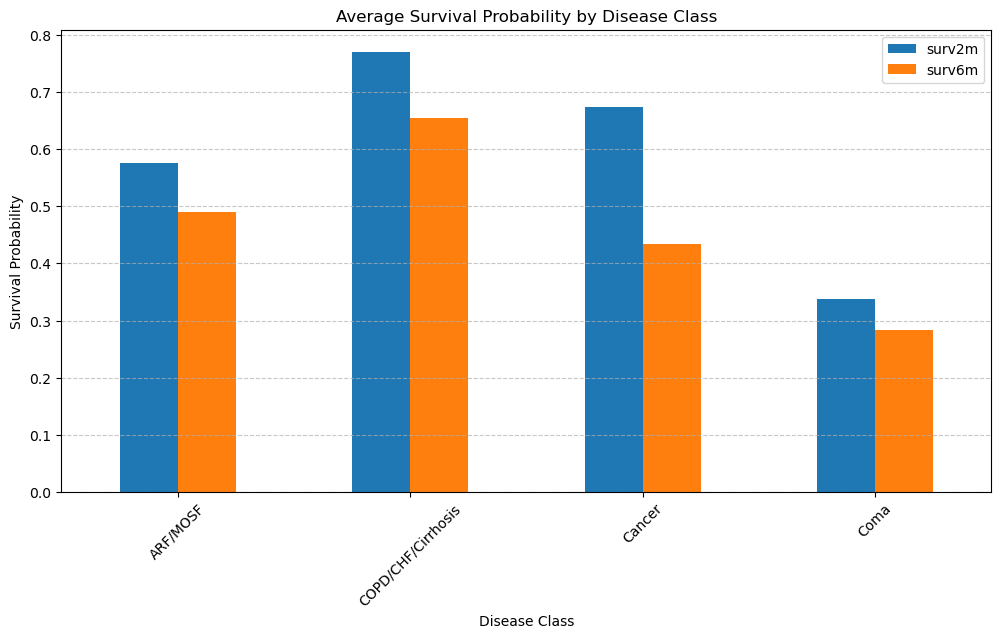


Average Survival Probability by Disease Class:
╒════╤════════════════════╤══════════╤══════════╕
│    │ dzclass            │   surv2m │   surv6m │
╞════╪════════════════════╪══════════╪══════════╡
│  0 │ ARF/MOSF           │ 0.575479 │ 0.490776 │
├────┼────────────────────┼──────────┼──────────┤
│  1 │ COPD/CHF/Cirrhosis │ 0.770795 │ 0.655275 │
├────┼────────────────────┼──────────┼──────────┤
│  2 │ Cancer             │ 0.67422  │ 0.434641 │
├────┼────────────────────┼──────────┼──────────┤
│  3 │ Coma               │ 0.337748 │ 0.282596 │
╘════╧════════════════════╧══════════╧══════════╛


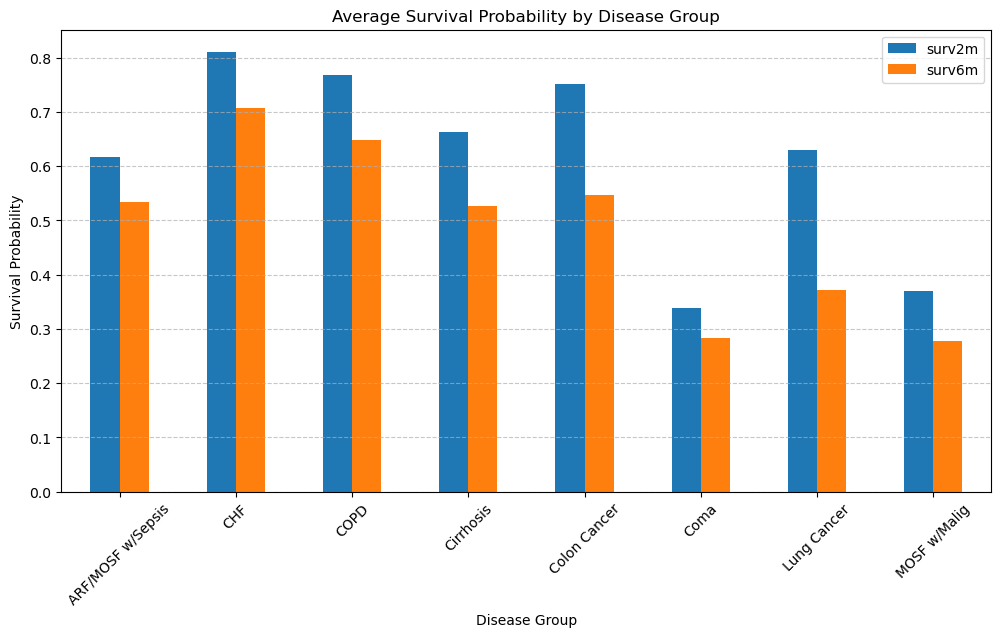


Average Survival Probability by Disease Group:
╒════╤═══════════════════╤══════════╤══════════╕
│    │ dzgroup           │   surv2m │   surv6m │
╞════╪═══════════════════╪══════════╪══════════╡
│  0 │ ARF/MOSF w/Sepsis │ 0.61725  │ 0.533924 │
├────┼───────────────────┼──────────┼──────────┤
│  1 │ CHF               │ 0.811472 │ 0.706514 │
├────┼───────────────────┼──────────┼──────────┤
│  2 │ COPD              │ 0.769109 │ 0.649284 │
├────┼───────────────────┼──────────┼──────────┤
│  3 │ Cirrhosis         │ 0.662942 │ 0.526781 │
├────┼───────────────────┼──────────┼──────────┤
│  4 │ Colon Cancer      │ 0.751207 │ 0.546151 │
├────┼───────────────────┼──────────┼──────────┤
│  5 │ Coma              │ 0.337748 │ 0.282596 │
├────┼───────────────────┼──────────┼──────────┤
│  6 │ Lung Cancer       │ 0.630809 │ 0.371764 │
├────┼───────────────────┼──────────┼──────────┤
│  7 │ MOSF w/Malig      │ 0.369259 │ 0.277763 │
╘════╧═══════════════════╧══════════╧══════════╛


In [104]:
# Bar plot of survival probabilities by disease class and group

# Survival probabilities by disease class
survival_prob_class = df.groupby('dzclass')[['surv2m', 'surv6m']].mean()

# Plotting the average survival probabilities by disease class
survival_prob_class.plot(kind='bar', figsize=(12, 6))
plt.title("Average Survival Probability by Disease Class")
plt.xlabel("Disease Class")
plt.ylabel("Survival Probability")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display survival probabilities by disease class in a table format
survival_prob_class_table = survival_prob_class.reset_index()
print("\nAverage Survival Probability by Disease Class:")
print(tabulate(survival_prob_class_table, headers="keys", tablefmt="fancy_grid"))

# Survival probabilities by disease group
survival_prob_group = df.groupby('dzgroup')[['surv2m', 'surv6m']].mean()

# Plotting the average survival probabilities by disease group
survival_prob_group.plot(kind='bar', figsize=(12, 6))
plt.title("Average Survival Probability by Disease Group")
plt.xlabel("Disease Group")
plt.ylabel("Survival Probability")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display survival probabilities by disease group in a table format
survival_prob_group_table = survival_prob_group.reset_index()
print("\nAverage Survival Probability by Disease Group:")
print(tabulate(survival_prob_group_table, headers="keys", tablefmt="fancy_grid"))


### **13. Relationships between Survival Outcomes and Some variables**

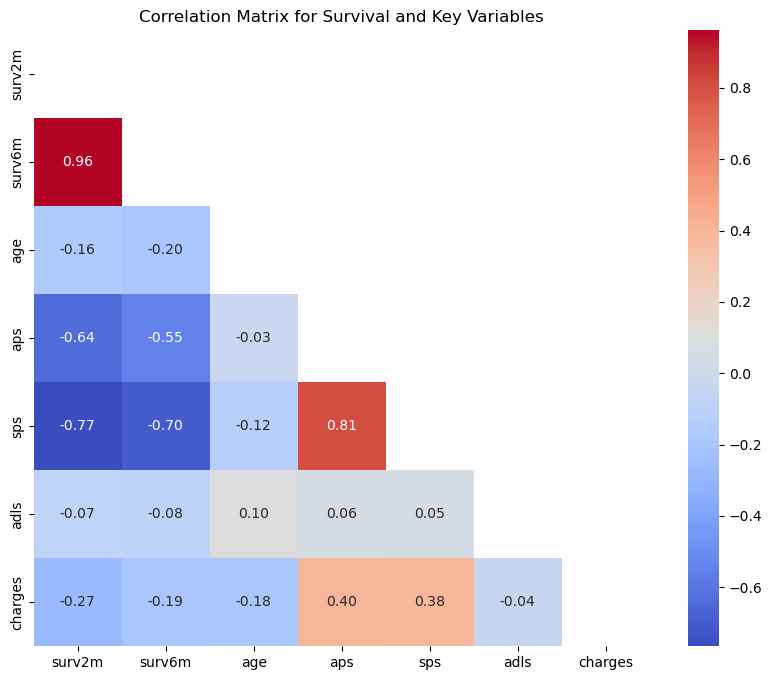


Correlations with Surv2m and Surv6m:
╒════╤════════════╤═══════════════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════════════════════╕
│    │ Variable   │   Correlation with Surv2m │   Correlation with Surv6m │ Surv2m Correlation Type   │ Surv6m Correlation Type   │
╞════╪════════════╪═══════════════════════════╪═══════════════════════════╪═══════════════════════════╪═══════════════════════════╡
│  0 │ age        │                -0.159265  │                -0.197111  │ Weak Negative             │ Weak Negative             │
├────┼────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┤
│  1 │ aps        │                -0.643157  │                -0.547094  │ Moderate Negative         │ Moderate Negative         │
├────┼────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┤
│  2 │ sps        │                -0.

In [106]:
# Exploring relationships between survival outcomes (surv2m and surv6m) and some variables (age, aps, sps, adlp, adls, charges)

# Calculate the correlation matrix for the selected variables
correlation_matrix = df[['surv2m', 'surv6m', 'age', 'aps', 'sps', 'adls', 'charges']].corr()

# Masking the upper triangle of the correlation matrix to avoid redundant information
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix for Survival and Key Variables')
plt.show()

# Present the correlations in a table
# Extract correlations for 'surv2m' and 'surv6m'
survival_correlations = correlation_matrix[['surv2m', 'surv6m']].drop(['surv2m', 'surv6m'])

# Define a function to classify the type of correlation
def classify_correlation(value):
    if value >= 0.7:
        return "Strong Positive"
    elif 0.3 <= value < 0.7:
        return "Moderate Positive"
    elif 0 <= value < 0.3:
        return "Weak Positive"
    elif -0.3 < value < 0:
        return "Weak Negative"
    elif -0.7 < value <= -0.3:
        return "Moderate Negative"
    else:
        return "Strong Negative"

# Apply the classification to both 'surv2m' and 'surv6m'
survival_correlations['surv2m_type'] = survival_correlations['surv2m'].apply(classify_correlation)
survival_correlations['surv6m_type'] = survival_correlations['surv6m'].apply(classify_correlation)

# Reset index for tabulate
survival_correlations_table = survival_correlations.reset_index()
survival_correlations_table.columns = ['Variable', 'Correlation with Surv2m', 'Correlation with Surv6m', 
                                        'Surv2m Correlation Type', 'Surv6m Correlation Type']

# Display the table using tabulate
from tabulate import tabulate
print("\nCorrelations with Surv2m and Surv6m:")
print(tabulate(survival_correlations_table, headers="keys", tablefmt="fancy_grid"))


### **14. Scatterplot of APS vs SPS colored by 2-Month Survival** 

Using a scatterplot, we will visualise APS vs SPS colored by 2-Month Survival to see how they influence survival.

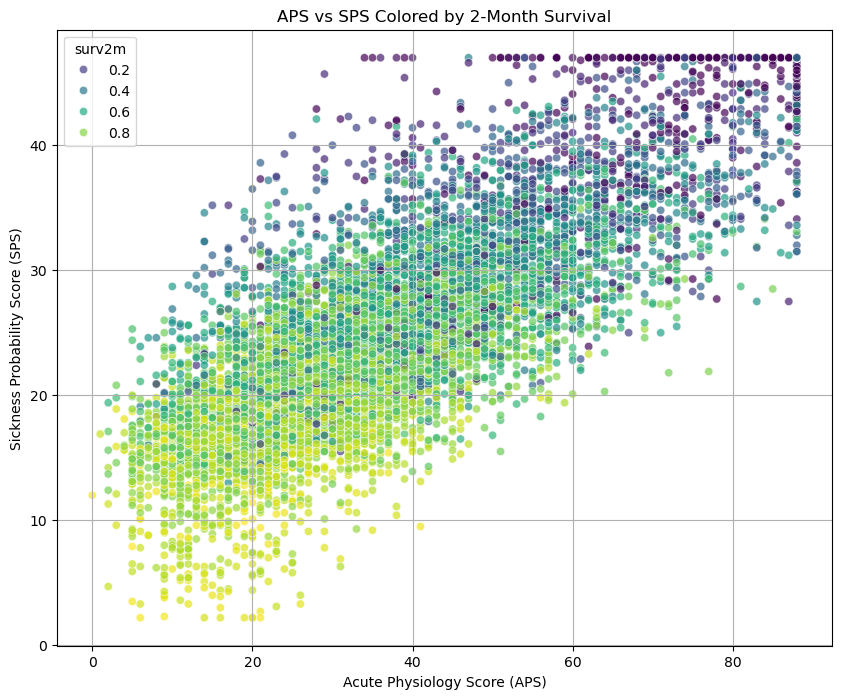


Descriptive Statistics for APS, SPS, and 2-Month Survival (surv2m):


aps          sps       surv2m
count  9105.000000  9105.000000  9105.000000
mean     37.350357    25.180531     0.636711
std      19.131839     8.647421     0.246078
min       0.000000     2.201172     0.030945
25%      23.000000    19.000000     0.507935
50%      34.000000    23.898438     0.715942
75%      49.000000    30.199219     0.825928
max      88.000000    46.998047     0.969971

In [109]:
# Scatter Plot: APS vs SPS colored by 2-Month Survival
plt.figure(figsize=(10, 8))
sns.scatterplot(x='aps', y='sps', hue='surv2m', data=df, alpha=0.7, palette='viridis')
plt.title('APS vs SPS Colored by 2-Month Survival')
plt.xlabel('Acute Physiology Score (APS)')
plt.ylabel('Sickness Probability Score (SPS)')
plt.grid(True)
plt.show()

# Generating descriptive statistics for APS, SPS, and 2-Month Survival (surv2m)
# This will provide more context for understanding the scatter plot

# Selecting the relevant columns
scatter_columns = ['aps', 'sps', 'surv2m']

# Generating descriptive statistics for the scatter plot variables
scatter_descriptive_stats = df[scatter_columns].describe()

# Displaying the descriptive statistics for the scatter plot
print("\nDescriptive Statistics for APS, SPS, and 2-Month Survival (surv2m):")
display(scatter_descriptive_stats)


## **Interpretations of Results/Plots/Statistics**

The purpose of this section is to interpret the statistics and visualizations generated from the analysis of the SUPPORT2 dataset, which contains critical information on the clinical, demographic, and socio-economic factors of critically ill hospitalized patients. Through this, we aim to uncover key patterns and relationships that influence patient survival, healthcare resource consumption, and the disparities in outcomes, providing insights that could inform clinical practices and healthcare policies.

### **1. Missing Data Percentage by Column**  
**Description**: 
- The chart shows the proportion of missing data, with variables like glucose, bun, and urine having significant missing values, while demographic variables (age, sex, death) have minimal missing data.

**Insights**: 
- Some columns have substantial missing data, possibly due to recording issues or lower relevance.
- Demographic variables are mostly complete and reliable for analysis.  

**Implications**: 
- Missing data may affect analysis accuracy, suggesting imputation or removal of these variables.
- It’s essential to document reasons and strategies for handling missing data to ensure reproducibility.

### **2. Heatmap of Correlations for Missing Columns Only**  
**Description**:
- The heatmap shows pairwise correlations focusing on missing data, with correlations represented by color gradients (blue for weak/negative and red for strong positive). It highlights relationships between physiological, clinical, and socio-economic variables.  

**Insights**:  
- **Strong Positive Correlations**: Variables like glucose and BUN have a strong correlation (0.96), suggesting shared physiological factors.  
- **Negative/Weak Correlations**: Education and income show a moderate negative correlation (-0.49), pointing to socio-economic patterns.  
- **Missing Data Patterns**: Missing data correlates with variables like glucose and urine, indicating the need for proper handling of missing values.  

**Implications**:  
- **Missing Data Handling**: The correlation with missing data suggests advanced imputation methods are necessary.  
    

### **3. Boxplots Showing Outliers**  
**Description**:
- The boxplots display the distribution of numerical outliers , highlighting outliers based on the interquartile range (IQR) and bounds marked by dashed red (lower) and green (upper) lines. Outliers are points beyond the whiskers, which indicate extreme values in charges.  

**Insights**:  
- **Data Distribution**: Most of the data is concentrated within the IQR, with outliers scattered beyond the whiskers.  

**Implications**:  
- **Data Cleaning**: Outliers should be carefully reviewed, as they may result from data entry errors, billing issues, or rare cases requiring special handling.  
- **Statistical Analysis**: Outliers could skew measures like mean and variance, requiring removal or capping during analysis.  
- **Clinical Relevance**: Outliers may represent unusual medical cases with high or low costs, potentially requiring further analysis to identify underlying factors.

### **4.Distribution of Numerical Variables**

**Description**:  
- The image presents histograms for multiple variables in the dataset, including demographic, clinical, and physiological data. These histograms allow assessment of data distribution, skewness, and outliers. Variables covered include age, charges, clinical scores (e.g., sps, aps), and laboratory measures (e.g., glucose, bili, crea).

**Insights**:  
- **Skewed Distributions**: Many variables (e.g., charges, totcst, glucose) show right-skewed distributions with a concentration of values at the lower end and a long tail, indicating a few extreme values. Some variables (e.g., hospdead, diabetes) are binary.  
- **Concentrated Values**: Variables like age, education, and number of comorbidities show concentration at lower values, suggesting a higher frequency of younger patients or those with fewer comorbidities.  
- **Outliers and Rare Events**: Variables like charges and scoma display clear outliers, and some clinical scores have many zero values, indicating low disability scores in most patients.  

**Implications**:  
  - **Skewness and Transformation**: Skewed variables, especially charges and test results, may need log transformation for modeling to adhere to normality assumptions.  
  - **Outlier Handling**: Outliers in variables like charges and crea require careful handling during data preprocessing to avoid skewing statistical results.  
  - **Clinical Relevance**: The concentration of lower values in many variables suggests a general population of younger or less severely ill patients, but outliers may represent more critical cases, requiring separate consideration in analysis.

### **5. Distribution of Categorical Variables**
**Description**:  
- The bar plots show the distribution of categorical variables, including sex, disease group (dzgroup), disease class (dzclass), income, race, cancer status (ca), do-not-resuscitate (DNR) status, and severe functional disability measure (sfdm2). Each plot uses color-coded bars for category representation.

**Insights**:  
  - **Sex**: Slightly more male patients than female patients.  
  - **Disease Group**: Lung Cancer and ARF/MOSF with Sepsis are the most prevalent, while Cancer and Cirrhosis are less common.  
  - **Disease Class**: Cancer and ARF/MOSF are the dominant classes.  
  - **Income**: Most patients fall in the under 11k dollars income bracket, followed by 11-25k dollars and 25-50k dollars.  
  - **Race**: Majority of patients are White, with fewer Hispanic, Asian, and Black patients.  
  - **Cancer Status**: Most patients do not have cancer, and fewer have metastatic cancer.  
  - **DNR Status**: A larger proportion of patients do not have DNR orders, with smaller proportions having them pre- or post-admission.  
  - **Severe Functional Disability Measure**: Most patients fall into <2 months follow-up, with fewer reporting severe disability.

**Implications**:  
  - **Disease Group Distribution**: Overrepresentation of disease groups like Lung Cancer and ARF/MOSF requires targeted analysis.  
  - **Income and Socioeconomic Factors**: Skew towards lower income categories suggests a potential link between socioeconomic status and health outcomes.  
 

### **6. Correlation Matrix of Numeric Variables**

**Description**:  
  The correlation matrix displays the relationships between numeric variables in the dataset, such as age, charges, survival probabilities, disease scores, and laboratory results. The values range from -1 to 1, with positive correlations shown in red and negative correlations in blue.

**Insights**:  
  - **Strong Positive Correlations**:  
    - **surv2m** and **surv6m** (survival probabilities) show a high positive correlation (0.96), indicating they are closely related.
    - **prg2m** and **prg6m** (physician estimates) are highly correlated (0.95), reinforcing the alignment of physician predictions over different time periods.
  - **Clinical Measures**:  
    - **pafi** (PaO₂/FiO₂ ratio) is negatively correlated with **death** (-0.69) and **hospdead** (-0.62), indicating lower ratios are linked to higher mortality.
    - **scoma** (coma score) has a negative correlation with survival probabilities, highlighting that more severe coma states are associated with poorer outcomes.
  - **Laboratory Results**:  
    - **glucose** and **bun** (blood urea nitrogen) show a moderate positive correlation (0.44), suggesting a link between high glucose and kidney issues.
    - **crea** (creatinine) is positively correlated with **bun** (0.62) and negatively correlated with **urine output** (-0.46), indicating a relationship between kidney function and these variables.
  - **Weak or Negative Correlations**:  
    - **Age** and **sex** show weak correlations with clinical measures, implying they may not strongly affect clinical outcomes.
    - **adlp** and **adls** (activities of daily living scores) show weak correlations with clinical outcomes, suggesting misalignment between self-reported and clinical measures.

  **Implications**:  
  - **Feature Selection and Multicollinearity**:  
    - High correlations (e.g., between **surv2m** and **surv6m**) may lead to redundancy in predictive models. Reducing or combining such variables can improve model efficiency.
  - **Handling Comorbidities and Functional Scores**:  
    - Variables like **pafi**, **scoma**, and **adlp/adls** are strongly correlated with survival and mortality, making them crucial for predictive modeling.
  - **Addressing Missing Data**:  
    - Weak correlations in some variables suggest that missing or improperly imputed data may affect the relationships between variables, requiring careful handling to avoid biases.
  - **Clinical Decision Making**:  
    - The correlations between clinical measures and survival/mortality outcomes highlight key predictors for clinicians, aiding in patient risk assessment and decision-making, particularly in critically ill patients.

### **7. Handling Outliers**
The box plots show that all outliers have been handled.

### **8. Distribution of Continuous Variables**
**Description**:  
  The histograms display the distribution of numerical variables in the dataset, such as age, charges, hospital stay length (slos), disease-related scores, physiological measures, and lab results. Each plot shows the frequency of observations for a given range of values.

**Insights**:  
  - **Skewed Distributions**:  
    - **Charges** and **totcst** show a highly skewed distribution, with most values clustered at the lower end and a long tail of high values, indicating a few patients with exceptionally high hospital costs.
    - **scoma**, **prg2m**, **adlp**, and **adlsc** also exhibit similar skew, suggesting that most patients experience less severe conditions or lower survival probabilities.
  - **Concentrated Values**:  
    - **Age**, **edu** (education), and **num.co** (number of comorbidities) are concentrated around lower values, indicating most patients are younger, with fewer comorbidities, and lower education levels.
    - **resp** (respiration rate) and **temp** (body temperature) have distributions centered around normal physiological ranges.
  - **Outliers**:  
    - **Glucose**, **bun**, and **urine** show clear outliers, with some extreme values potentially due to rare cases or data errors.

**Implications**:  
  - **Skewed Data Handling**:  
    - The skewness in variables like **charges**, **totcst**, **glucose**, and **bun** may require transformations (e.g., logarithmic transformation) to normalize their distributions for use in predictive models, particularly in statistical techniques that assume normality.

### **9. Distribution of Binary Variables**
**Description**:  
The Bar plots display the distribution of binary variables (0 or 1) in the dataset, with the x-axis representing the two possible categories and the y-axis showing the count of observations in each category.

**Insights**:  
  - **Death**: The distribution is relatively balanced, with nearly equal numbers of patients who survived (0) and those who died (1).
  - **In-Hospital Death (hospdead)**: More patients survived in the hospital (0) than those who died during hospitalization (1), indicating a skewed distribution.
  - **Diabetes**: A majority of patients do not have diabetes (0), with a smaller proportion diagnosed with diabetes (1).
  - **Dementia**: Most patients do not have dementia (0), with only a small proportion diagnosed with dementia (1).

**Implications**:  
  - **Class Imbalance**:  
    - The imbalanced distributions for diabetes and dementia may affect predictive model performance. Techniques like resampling or synthetic data generation may be needed to address this imbalance.
  - **Predictive Modeling**:  
    - The balanced distribution for death is useful for predictive modeling, as both classes are well-represented. For **hospdead**, models must account for the skew to avoid biasing predictions toward survival.

### **10. Distribution of Categorical Variables**
**Description**:  
  Bar plots display the distribution of categorical variables (e.g., sex, disease group, income, race, cancer status, DNR status, and functional disability), with color-coded bars representing different categories within each variable.

**Insights**:  
  - **Sex**: More male patients than female.  
  - **Disease Group**: Most patients belong to **Lung Cancer** and **ARF/MOSF with Sepsis** groups.  
  - **Income**: The majority are in the **under $11k** income category.  
  - **Race**: Predominantly **White** patients.  
  - **Cancer Status**: Most patients do not have cancer, and fewer have metastatic cancer.  
  - **DNR Status**: A majority do not have a DNR, with fewer having a DNR before or after admission.

**Implications**:  
  - **Socio-Economic Insights**: A high proportion of low-income patients may impact health outcomes and require targeted strategies.  

### **11. Correlation Analysis**
**Description**:  
  The correlation matrix displays pairwise correlations between numerical variables, with values ranging from -1 to 1. Positive correlations are shown in red, and negative correlations in blue, highlighting strong relationships between clinical and demographic features.

**Insights**:  
  - **Strong Positive Correlations**: **surv2m** and **surv6m** (0.96), as well as **prg2m** and **prg6m** (0.89), are highly correlated, indicating similar survival predictions over time.  
  - **Clinical Measures**: **pafi** negatively correlates with **death** (-0.69) and **hospdead** (-0.62), showing its relevance in mortality risk.  
  - **Weak Correlations**: **Age** and **number of comorbidities** have weak correlations with clinical outcomes, suggesting a limited impact on some health measures.

**Implications**:   
  - **Survival Predictions**: The strong correlation between **survival predictions** and **physician estimates** suggests that these can be used interchangeably in models.  
  - **Clinical Importance**: The negative correlation between **pafi** and **mortality** highlights its clinical significance in assessing patient prognosis.

### **12. Group Comparisons**
**Description**:  
  This plot compares **hospital charges** and **total costs** across different **race**, **sex**, and **DNR status** groups.

**Insights**:  
  - **Charges Across Race**: **Asian** patients incur the highest charges, while **White** and **Black** patients have lower median charges.  
  - **Charges Across Sex**: **Male** patients have higher charges and more variability.  
  - **Charges Across DNR Status**: **No DNR** and **DNR after admission** patients have higher charges, while **DNR before admission** patients incur lower charges.  
  - **Total Cost Across Sex**: **Male** patients have higher total costs with more variability.

**Implications**:  
  - **Healthcare Costs**: **Asian** and **Hispanic** patients face higher costs than **White** and **Black** patients; **male** patients have higher charges and total costs.  
  - **Outlier Handling**: **Outliers** in charges should be examined for rare cases or data issues.  
  - **Resource Allocation**: More intensive care for **male** and **no DNR** patients drives higher costs, needing further investigation into care complexity.

### **13. Impact of Comorbidities on Survival and Hospital Death**
**Description**:  
  - This plot compares **6-month survival probability (surv6m)** and **in-hospital deaths (hospdead)** based on the number of **comorbidities (num.co)**.

**Insights**:  
  - **6-Month Survival**: As the number of comorbidities increases, survival probability decreases, with patients having more than 4 comorbidities showing lower survival rates.
  - **In-Hospital Death**: More comorbidities are associated with lower immediate mortality risk.

**Implications**:  
  - **Comorbidities and Mortality**: Fewer comorbidities are linked to higher immediate death risk; more comorbidities may lower immediate risk but impact long-term survival.  
  - **Targeted Care**: Patients with more comorbidities may need specialized care, while those with fewer comorbidities benefit from early interventions.

### **14. Trends in Physiological Scores and DNR**
**Description**:  
  This plot compares **SPS**, **APS**, and **avtisst** across three **DNR status** groups: no DNR, DNR after admission, and DNR before admission.

**Insights**:  
  - **SPS** and **APS** are highest for **DNR after admission** and **DNR before admission** patients, indicating more intensive care.  
  - **avtisst** is also highest for **DNR after admission**, suggesting more intensive therapeutic interventions.  
  - **No DNR** patients show lower scores, indicating less severe conditions and less intensive care.

**Implications**:  
  - **DNR after admission** patients need more resources due to intensive care.  
  - **No DNR** patients typically require less aggressive treatment.  
  - **DNR status** should guide clinical decisions to match care intensity with patient needs.

### **15. Relationships Between Demographics, Age, Race, and DNR**
**Description**:  
  Compares **age** and **race** distributions across three **DNR status** groups: no DNR, DNR after admission, and DNR before admission.

**Insights**:  
  - **Age Distribution**: **No DNR** patients are younger (median ~60), while **DNR after admission** and **DNR before admission** patients are older (median ~70-80).  
  - **Race Distribution**: **White** patients dominate the **no DNR** group, while **minority groups** (Black, Hispanic, Asian) are more prevalent in **DNR status** groups.

**Implications**:  
  - **Age and Care**: Older patients often need more focused care and end-of-life planning.  


### **16. Prevalence of Diagnosis**
**Description:**
- Prevalence by Disease Class: Bar plot showing patient counts in each disease class (e.g., ARF/MOSF, Cancer).
- Prevalence by Disease Group: Bar plot showing patient counts in each disease group (e.g., ARF/MOSF w/Sepsis, CHF).

**Insights:**
- Disease Class: ARF/MOSF is the most common diagnosis, with Coma and Cancer being the least prevalent.
- Disease Group: ARF/MOSF with Sepsis is the most common, while Cirrhosis and Colon Cancer have the lowest prevalence.

**Implications:**
- Resource Allocation: ARF/MOSF and ARF/MOSF with Sepsis patients require the most resources.
- Treatment Focus: Cancer and Coma patients may need less immediate focus compared to prevalent conditions like ARF/MOSF or CHF.


### **17. Diagnosis by Sex, Age, and Income Distribution**
Description:
- Diagnosis Distribution by Sex: Shows the distribution of patients by sex across different diagnosis groups.
- Diagnosis Distribution by Income: Displays the distribution of patients by income group across diagnosis groups.
- Diagnosis Distribution by Age Group: Shows the distribution of patients by age group across diagnosis groups.

Insights:

a.Sex:
o	Male patients dominate in ARF/MOSF w/Sepsis while the gender distribution is more balanced in other diagnosis groups.
b.	Income:
o	The majority of patients in all groups belong to the under $11k income category, with ARF/MOSF w/Sepsis having the largest number of patients from this income group.
c.	Age Group:
o	Patients over 70 are predominant in the ARF/MOSF w/Sepsis and CHF groups, while younger patients are more represented in COPD and Lung Cancer groups.

Implications:

a.	Gender and Diagnosis: 
o	Healthcare strategies might need to focus more on male patients in certain critical groups like ARF/MOSF w/Sepsis.
b.	Income and Treatment: 
o	Most patients fall into the lower-income brackets, suggesting a focus on affordable care options for the largest demographic.
c.	Age and Care: 
o	Older patients, especially those over 70, require more intensive care, particularly in ARF/MOSF w/Sepsis and CHF.

### **18.	Mortality Rate by Diagnosis Group**
Description:

a.	Mortality Rate by Diagnosis Group: A horizontal bar plot showing the mortality rate across different diagnosis groups such as COPD, ARF/MOSF w/Sepsis, CHF, and Lung Cancer.

Insights:

a.	COPD patients have the lowest mortality rate, followed by ARF/MOSF w/Sepsis and CHF.
b.	Lung Cancer and MOSF w/Malig patients have the highest mortality rates, indicating a significant risk of death within these groups.

Implications:

a.	High-Risk Groups: Lung Cancer and MOSF w/Malig require more aggressive care and monitoring due to their high mortality rates.
b.	Care Strategies: Lower mortality rates in COPD and ARF/MOSF w/Sepsis groups suggest less critical care requirements, but still necessitate careful management.

### **19.	Mortality Rate by Age Group and Sex**

Description:

•	Mortality Rate by Age Group and Sex: Line plot showing mortality rates across age groups for males and females.

Insights:

•	Age and Mortality: Mortality rate increases with age for both males and females.
•	Sex Differences: Males consistently have higher mortality rates than females across all age groups.

Implications:

•	Age and Care: Older age groups, particularly 70-90 and 90+, require more intensive care.
•	Sex-Based Strategy: Higher mortality in males suggests the need for tailored healthcare strategies addressing gender differences.

### **20.	Mortality Rate by Income Group and Diagnosis**

Description:

•	Patient Population by Income Group and Diagnosis: Stacked bar plot showing diagnosis groups across income groups.
•	Mortality Rate by Income Group and Diagnosis: Bar plot showing mortality rates for diagnosis groups across income groups.

Insights:

•	Income Distribution: Most ARF/MOSF w/Sepsis patients fall in the under $11k income group, while COPD and Lung Cancer show a more balanced spread.
•	Mortality Trends: ARF/MOSF w/Sepsis and Colon Cancer exhibit higher mortality across all income levels.

Implications:

•	Income-Based Focus: Targeted support is needed for low-income patients, especially those with ARF/MOSF w/Sepsis.
•	Mortality Reduction: Enhanced treatment strategies are essential for high-mortality conditions, regardless of income.

### **21.	The Average Survival Probability by Disease Class/GroupDescription:**
•	Survival Probability by Disease Class: Bar plot comparing 2-month and 6-month survival probabilities across disease classes (ARF/MOSF, COPD, Cancer, Coma).

•	Survival Probability by Disease Group: Bar plot comparing 2-month and 6-month survival probabilities across disease groups (ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Cancer, etc.).

Insights:

•	Disease Class Comparison: ARF/MOSF has higher survival probabilities at 2 months compared to 6 months, especially in the COPD and Cancer classes.
•	Disease Group Comparison: Lung Cancer and Colon Cancer have higher survival rates at 2 months, while the probability decreases at 6 months.

Implications:

•	Short-Term Survival: Early intervention is critical for COPD and Cancer, where survival rates drop significantly over time.
•	Tailored Treatment: For Lung Cancer and ARF/MOSF, focus on improving long-term survival should be a priority.

### **22.	Scatterplot of APS vs SPS colored by 2-Month Survival**
Description:

1.	Scatter Plot of APS vs SPS: The scatter plot shows the relationship between Acute Physiology Score (APS) and Sickness Probability Score (SPS), colored based on the 2-month survival probability (surv2m).

Insights:

1.	Correlation: There is a positive correlation between APS and SPS, with higher scores in both leading to higher values of survival probability.
2.	Survival Distribution: As the points on the plot move to higher APS and SPS values, they tend to show higher survival probabilities, indicated by the color gradient moving from yellow to purple.

Implications:

1.	Critical Care Evaluation: A higher APS and SPS suggest worse health conditions, which should inform decisions about intensive treatment or resource allocation.
2.	Targeted Interventions: Patients with high APS and SPS but low survival probability may need alternative care plans or palliative care.


## **Discussion**

The analysis of the SUPPORT2 dataset aimed to extract meaningful insights into patient demographics, clinical outcomes, and healthcare resource utilization. Using a combination of data preprocessing, exploratory analysis, and visualization techniques, this study addressed key aspects such as missing data, variable relationships, survival patterns, and health disparities. This discussion synthesizes the findings, highlights their implications, and considers the broader context of the analysis.


### **Handling Missing Data and Outliers**
- One of the main challenges with the SUPPORT2 dataset was the presence of missing values and outliers in several critical clinical variables, such as `alb` (serum albumin), `pafi` (arterial oxygenation), and `bun` (blood urea nitrogen). A bar chart displaying the percentage of missing data across columns provided a clear overview of the extent of missingness, while a correlation heatmap for missing values identified patterns and dependencies between variables. This analysis informed a tailored imputation strategy, where domain-specific values were used for clinically significant variables, while median and mode imputations were applied for numerical and categorical data, respectively.

- These methods ensured that missing values were handled systematically, preserving the integrity of the dataset for downstream analysis. Nevertheless, missing data in high-impact variables highlights the need for improved data collection processes in future studies to ensure comprehensive coverage of all key parameters.

- For outliers, those in numeric variables were detected using the Interquartile Range (IQR), which is a robust statistical method for identifying values that fall outside the expected range. For binary variables, frequency analysis was performed to identify potential outliers, ensuring that the proportion of each category was reasonable and consistent with expectations. For categorical variables, unexpected categories were detected by reviewing the unique values in each variable and checking for any entries that did not fit within the predefined categories or expected levels, ensuring data consistency and integrity.


### **Exploratory Analysis and Data Distributions**

- Exploratory data analysis revealed important characteristics of the dataset. Variables such as `age` showed a skewed distribution, with the majority of patients being older adults, consistent with the focus of the study population. Hospital resource variables, including `charges` and `totcst` (total costs), exhibited significant skewness and outliers, indicating that a subset of patients incurred disproportionate healthcare costs, likely associated with prolonged hospital stays or severe conditions. Box plots and capping methods were employed to manage these outliers, ensuring they did not disproportionately affect analytical results.

- Correlations between clinical variables, such as the strong relationship observed between `bun` and `crea`, reflected known physiological interdependencies, particularly those related to kidney function. These findings provide a foundation for developing composite indicators and refining the dataset for predictive modeling.


### **Survival Analysis and Outcomes**

- Survival analysis revealed significant differences in survival probabilities among disease groups (`dzgroup`) and cancer statuses (`ca`). Patients diagnosed with `Lung Cancer` or metastatic cancer demonstrated markedly lower survival rates, emphasizing the severity of these conditions. In contrast, conditions such as `CHF` and `COPH` were associated with comparatively higher survival probabilities. These findings underscore the importance of tailoring care strategies to disease-specific survival patterns.

- The distribution of survival probabilities at two and six months (`surv2m` and `surv6m`) showed a polarization, with many patients either at high risk of mortality or with good survival prospects. This pattern reflects the critical health status of the population studied and highlights the need for non-linear modeling approaches that capture the complexity of these outcomes.


### **Relationships Between Variables**

- Visualizations, such as scatter plots, provided insight into relationships between key variables. For example, the positive correlation between `slos` (length of hospital stay) and `charges` confirmed the resource-intensive nature of prolonged hospitalizations. On the other hand, no clear relationship was observed between `age` and six-month survival probability (`surv6m`), indicating that age alone may not be a strong predictor of outcomes. Instead, complex interactions involving physiological stability, comorbidities, and other clinical factors likely play a more significant role.

- `num.co` (number of comorbidities) and `aps` (acute physiology score) emerging as the most influential predictors of patient outcomes. These variables directly reflect the cumulative burden of illness and the severity of physiological dysfunction, underscoring their critical role in predictive modeling.


### **Health Disparities and End-of-Life Decisions**

- Stacked bar charts highlighted disparities in mortality rates across income and racial groups. Patients from lower income brackets and certain racial minorities experienced higher mortality rates, reflecting broader socio-economic and systemic inequities in healthcare access and outcomes. Similarly, the distribution of `dnr` (Do-Not-Resuscitate) statuses varied significantly across disease groups, with terminal conditions such as metastatic cancer and `Lung Cancer` showing higher DNR rates. These results emphasize the need for equitable care policies and culturally sensitive approaches to end-of-life decision-making.


### **Limitations and Future Directions**

- Despite its strengths, this analysis is not without limitations. Missing data, while imputed systematically, may still introduce biases or affect the reliability of certain findings. conducting sensitivity analyses on imputation techniques could enhance the robustness of these findings. Certain variables, such as `hospdead` (in-hospital death) and functional scores like `adlp` (activities of daily living score), were underexplored in this study. Future research could incorporate these variables into multivariate models to deepen our understanding of patient outcomes.



## **Conclusion**

This analysis of the SUPPORT2 dataset offers valuable insights into patient demographics, clinical outcomes, and healthcare resource use. By addressing missing data, analyzing variable relationships, and leveraging survival and Correlation analysis, this study highlights critical predictors of mortality and resource utilization while uncovering systemic disparities in healthcare outcomes. These findings can inform data-driven strategies to optimize care, allocate resources, and address inequities in health systems. Future work should focus on improving data quality and refining predictive models.

## **Summary of Main Findings**


1. The dataset contains 9105 records across 48 variables, combining demographic, medical, and financial information.

2. There are a significant number of missing values in the original SUPPORT2 dataset.

3. Box plots revealed significant outliers in variables like `charges`, which likely reflect extreme cases of resource utilization in intensive care.

4. There is strong correlation between missing values in variables such as `bun` and `glucose indicate systematic missingness, likely due to clinical factors like severe kidney dysfunction.

5. Histograms showed a right-skewed distribution for `age`, indicating a predominance of older patients in the dataset.

6. Survival probabilities varied significantly across disease groups, with `Coma`, `MOSF w/Malig`, and `Lung Cancer` showing lower survival rates compared to `CHF` and `COPD`.

7. A positive correlation between `slos` (length of stay) and `charges` highlighted the resource intensity of prolonged hospitalizations.

8. The correlation between survival at `2 months` and `6 months` indicates that early survival predictions can reliably forecast long-term survival.

9. A moderate positive correlation between `surv6m` and `prg6m` suggests that the six-month survival prediction by the SUPPORT model aligns closely with the physician estimates of survival.

10. For  `surv2m`, `COPD/CHF/Cirrhosi` had the highest survival probability, followed by `Cancer` and `ARF/MOSF`, while for `surv6m`, the probability of survival declined across all groups.

11. The `number of comorbidities` (`num.co`) was identified as a critical predictor of patient outcomes, demonstrating the cumulative effect of comorbidities on survival.

12. The `acute physiology score` (`aps`) and `sps` also ranked highly in feature importance, underlining their value in assessing the severity of a patient’s condition.

13. DNR status significantly impacts survival probabilities, with DNR orders correlating with lower survival rates.

14. Mortality rates were higher in lower-income groups, particularly those earning under $11k, indicating socio-economic disparities in health outcomes.

15. Differences in mortality rates across races, with `asian` (0.73) and `Other` (0.72) groups having the highest, underscore the need for addressing racial disparities in healthcare access and treatment.

16. Diseases with higher APS (e.g., MOSF with Malignancy) correlate with higher mortality rates.







